# About this project

Pada project ini, kita akan menggunakan dataset pinjaman untuk small business bersumber dari US Small Business Administration (SBA) untuk membangun model klasifikasi yang dapat memprediksi apakah suatu pinjaman akan default (gagal bayar) atau tidak berdasarkan faktor-faktor pada data yang tersedia. Tujuan utama proyek ini adalah untuk membantu lembaga keuangan dalam membuat decision yang lebih baik mengenai pemberian pinjaman.

Tujuan project:
- Membuat model prediksi yang dapat mengklasifikasikan pinjaman menjadi dua kategori, yaitu: CHGOFF (gagal bayar) atau P I F (paid in full / lunas)
- Memberikan rekomendasi bisnis berdasarkan hasil analisis, EDA, dan model yang dibangun.
- Mengidentifikasi faktor-faktor yang paling berpengaruh dalam memprediksi status pinjaman.

Dataset yang digunakan dalam proyek ini adalah SBAnational.csv, yang berisi informasi tentang pinjaman SBA dari tahun 1987 hingga 2014

Output:
- Hasil analisis EDA yang dilakukan
- Model prediksi yang dapat memprediksi seakurat mungkin apakah suatu pinjaman akan default atau lunas.
- Evaluasi kinerja model untuk setiap model yang dibangun
- Business recommendation & insight

# Penjelasan masing-masing kolom dataset

- LoanNr_ChkDgt: Kode nomor unique untuk setiap pinjaman. Kolom ini berguna sebagai identifier, namun di project ini tidak akan digunakan sebagai fitur dalam model karena sifatnya unique dan tidak membantu pembuatan model.

- Name: Nama peminjam. Ini juga bersifat unique dan tidak akan digunakan dalam pembuatan model.

- City: Kota asal peminjam.

- State: Negara bagian peminjam.

- Zip: Kode pos peminjam.

- Bank: Nama bank dalam melakukan pinjaman.

- BankState: Negara bagian bank dalam melakukan pinjaman.

- NAICS: The North American Industry Classification System. Kode sistem untuk mengklasifikasi Industri Amerika.

- ApprovalDate: Tanggal persetujuan pinjaman diberikan.

- ApprovalFY: Tahun fiskal persetujuan pinjaman diberikan.

- Term: Jangka waktu pinjaman (dalam satuan bulan).

- NoEmp: Jumlah karyawan di bisnis peminjam.

- NewExist: Indikator apakah bisnis peminjam adalah baru atau sudah ada (1 = Existing business, 2 = New business).

- CreateJob: Jumlah pekerjaan yang diciptakan. Ini bisa menjadi indikator dampak sosial dari pinjaman.

- RetainedJob: Jumlah pekerjaan yang dipertahankan. Maksudnya adalah jumlah pekerjaan sejak awal pinjaman dilakukan sampai pelunasan atau default

- FranchiseCode: Kode franchise

- UrbanRural: Indikator apakah bisnis berada di daerah urban atau rural. Bisa digunakan untuk analisis geografis.

- RevLineCr: Indikator apakah pinjaman ini adalah kredit bergulir atau tidak. Kredit bergulir maksudnya adalah sistem penarikan dana sesuai dengan kebutuhan debitur kapanpun, asalkan tidak lebih dari limit.

- LowDoc: Indikator apakah pinjaman diproses melalui program LowDoc. LowDoc adalah jenis program pinjaman dimana peminjam tidak melampirkan "proof of income" dan detail bukti jaminan pinjaman lainnya. Biasanya low doc loan ditargetkan untuk orang-orang self employed yang tidak memiliki gaji karena statusnya yang self employed. (Source: https://www.mortgagechoice.com.au/home-loans/loan-types/low-doc-loan/)

- ChgOffDate: Tanggal pinjaman dinyatakan gagal bayar.

- DisbursementDate: Tanggal pencairan pinjaman. Jika ApprovalDate adalah tanggal pinjaman diapprove, DisbursementDate adalah tanggal pencairan pinjaman tersebut ke rekening bank peminjam.

- DisbursementGross: Jumlah pinjaman yang dicairkan.

- BalanceGross: Jumlah outstanding pinjaman. jumlah total uang yang masih harus dibayar kembali pada pinjaman tersebut

- MIS_Status: Status pinjaman (charged off atau paid in full). Ini adalah variabel target untuk model klasifikasi ini.

- ChgOffPrinGr: Jumlah pokok yang gagal bayar.

- GrAppv: Jumlah pinjaman yang disetujui oleh bank.

- SBA_Appv: Jumlah yang dijamin oleh SBA.



# Libraries

In [ ]:
!pip install uszipcode
!pip install 'sqlalchemy_mate>=1.4.28.3,<2.0.0.0'

!pip install scikit-plot
!pip install optuna
!pip install dalex

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 kB 6.5 MB/s eta 0:00:00
  Created wheel for atomicwrites: filename=atomicwrites-1.4.1-py2.py3-none-any.whl size=6941 sha256=8e73590406490eb82d1af239d052dc910e886516ebe78d5a27c4516daa7a1aca
  Stored in directory: /root/.cache/pip/wheels/34/07/0b/33b15f68736109f72ea0bb2499521d87312b932620737447a2
Successfully built atomicwrites
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.8 MB/s eta 0:00:00
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.30
    Uninstalling SQLAlchemy-2.0.30:
      Successfully uninstalled SQLAlchemy-2.0.30
  Attempting uninstall: sqlalchemy_mate
    Found existing installation: sqlalchemy_mate 2.0.0.2
    Uninstalling sqlalchemy_mate-2.0.0.2:
      Successfully uninsta

In [ ]:
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import uszipcode
from uszipcode import SearchEngine

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

import scikitplot as skplt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score

import optuna
import dalex as dx

/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


# Data check

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Dibimbing/DS 24_AryaWiratmaji_Progress Final Project (Drive)/Dataset/SBAnational.zip', 'r')
zip_ref.extractall('content/dataset')
zip_ref.close()

In [ ]:
file_path = '/content/content/dataset/SBAnational.csv'
df = pd.read_csv(file_path)
pd.set_option('display.max_columns', None)

<ipython-input-5-7e72fbfed50c>:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [ ]:
#file_path = '/content/drive/MyDrive/Dibimbing/DS 24_AryaWiratmaji_Progress Final Project (Drive)/Dataset/SBAnational.csv'
#df = pd.read_csv(file_path)
#df = df.sample(n=500000, random_state=42)
#pd.set_option('display.max_columns', None)

In [ ]:
df.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

In [ ]:
# Cek apakah benar LoanNr_ChkDgt berisi unique loan ID
df[df['LoanNr_ChkDgt'].duplicated() == True]

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv


Observations:
1. Terdapat missing values pada kolom: `City`, `Bank`, `BankState`, `NewExist`, `RevLineCr`, `LowDoc`, `ChgOffDate`, `DisbursementDate`, `MIS_Status`.

Notes: `ChgOffDate` tidak ada input / na / missing value jika `MIS_Status`nya = `CHGOFF`. Jadi tidak perlu handling.

2. `LoanNr_ChkDgt` berisi unique values dan merepresentasikan ID dari setiap pengajuan loan. Kolom ini tidak akan berguna untuk modeling kita, dan akan didrop.
3. `ApprovalDate`, `ChgOffDate`, `DisbursementDate` perlu diubah tipe datanya agar sesuai dengan jenis data yang seharusnya, yaitu Datetime.
4. `DisbursementGross`, `BalanceGross`, `ChgOffPrinGr`, `GrAppv`, `SBA_Appv` perlu diubah tipe datanya agar sesuai dengan jenis data yang seharusnya, yaitu Datetime.

Notes: Harus remove simbol '$' juga

# Split to prevent leakage on preprocessing

### Isi `MIS_Status` dengan ketersediaan data `ChgOffDate`

In [ ]:
# Yang value `ChgOffDate` ada tapi `MIS_Status` tidak ada
df[(df['ChgOffDate'].isna() == False) & (df['MIS_Status'].isna())].shape[0]

261

In [ ]:
# Yang value `ChgOffDate` tidak ada dan `MIS_Status` tidak ada
df[(df['ChgOffDate'].isna()) & (df['MIS_Status'].isna())].shape[0]

1736

In [ ]:
df['MIS_Status'].value_counts()

MIS_Status
P I F     739609
CHGOFF    157558
Name: count, dtype: int64

In [ ]:
df['MIS_Status'] = np.where(df['ChgOffDate'].isna(), 'P I F', 'CHGOFF')

In [ ]:
df['MIS_Status'].isna().sum()

0

## Split

In [ ]:
X = df.drop(columns=['MIS_Status'])
y = df['MIS_Status']

train_indices, test_indices = train_test_split(df.index, test_size=0.3, random_state=42, stratify=y)
df_train = df.loc[train_indices]
df_test = df.loc[test_indices]

print("Training set size:", df_train.shape)
print("Test set size:", df_test.shape)

Training set size: (629414, 27)
Test set size: (269750, 27)


# Missing values handling

### Train dataframe

In [ ]:
missing_val = df_train.isna().sum()
missing_val = missing_val[missing_val > 0]
print (missing_val)

Name                     7
City                    20
State                    8
Bank                  1120
BankState             1125
NewExist                91
RevLineCr             3145
LowDoc                1802
ChgOffDate          515525
DisbursementDate      1673
dtype: int64


In [ ]:
missing_pct = df_train.isnull().sum() * 100 / len(df)
missing_df = pd.DataFrame({'Missing value percentage': missing_pct})
missing_df = missing_df[missing_df['Missing value percentage'] > 0]
print(missing_df)

                  Missing value percentage
Name                              0.000779
City                              0.002224
State                             0.000890
Bank                              0.124560
BankState                         0.125116
NewExist                          0.010121
RevLineCr                         0.349769
LowDoc                            0.200408
ChgOffDate                       57.333812
DisbursementDate                  0.186062


**HANDLING `City` & `State` IMPUTATION**

Pertama, kita fokus untuk menghandle missing value `City` & `State` dulu. Untuk menentukan `City` & `State`, sebetulnya kita bisa mengkorelasikan dengan `Zip` code. Kita cek apakah row data yang missing value itu memiliki nilai `Zip`.

In [ ]:
df_train[(df_train['City'].isnull()) & (df_train['Zip'].isnull() == False)]

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
270263,2884182004,"HERMANOS LOPEZ,INC. ""B""",NaN,CA,92102,CDC SMALL BUS. FINAN CORP,CA,0,16-Apr-81,1981,180,45,2.0,0,0,0,0,N,N,NaN,6-Jan-82,"$488,000.00",$0.00,P I F,$0.00,"$488,000.00","$488,000.00"
270270,2884212000,"EMACO, INC. ""B""",NaN,CA,92102,CDC SMALL BUS. FINAN CORP,CA,0,13-Jul-81,1981,180,7,2.0,0,0,0,0,N,N,NaN,10-Sep-81,"$105,000.00",$0.00,P I F,$0.00,"$105,000.00","$105,000.00"
243452,2716832010,"ACE PLATING COMPANY,INC.",NaN,IL,60636,NaN,NaN,0,15-May-81,1981,180,1,2.0,0,0,0,0,N,N,NaN,4-Nov-81,"$49,000.00",$0.00,P I F,$0.00,"$49,000.00","$49,000.00"
350109,3438122002,DULTMEIER SALES,NaN,NE,50309,IOWA BUSINESS GROWTH COMPANY,IA,0,7-Oct-81,1982,180,10,2.0,0,0,0,0,N,N,NaN,6-Jan-82,"$225,000.00",$0.00,P I F,$0.00,"$225,000.00","$225,000.00"
342928,3391402005,MASTER PLEATING COMPANY,NaN,MO,63103,ST. LOUIS LOCAL DEVEL CO,MO,0,21-Jul-81,1981,180,65,1.0,0,0,0,0,N,N,NaN,4-Nov-81,"$83,000.00",$0.00,P I F,$0.00,"$83,000.00","$83,000.00"
437804,4247612009,DOUBLE W MOLD INC,NaN,MA,2401,NaN,NaN,0,3-Aug-81,1981,180,21,1.0,0,0,0,0,N,N,NaN,4-Nov-81,"$38,000.00",$0.00,P I F,$0.00,"$38,000.00","$38,000.00"
342946,3391472004,CLARK TIRE COMPANY,NaN,MO,63105,BUSINESS FINAN CORP OF ST. LOU,MO,0,4-Mar-81,1981,240,17,1.0,0,0,0,0,N,N,NaN,10-Jun-81,"$111,000.00",$0.00,P I F,$0.00,"$111,000.00","$111,000.00"
564191,5554512008,"ACTION GRAPHICS, INC.",NaN,KY,40209,CAPITAL ACCESS CORP - KENTUCKY,KY,0,16-Jun-81,1981,300,14,1.0,0,0,0,0,N,N,NaN,5-Aug-81,"$87,000.00",$0.00,P I F,$0.00,"$87,000.00","$87,000.00"
410933,3970882003,"DOVER GRAPHICS,INC.",NaN,MO,64106,EDC LOAN CORPORATION,MO,0,12-Mar-81,1981,240,12,1.0,0,0,0,0,N,N,NaN,1-Jun-81,"$50,000.00",$0.00,P I F,$0.00,"$52,000.00","$52,000.00"
570342,5622822010,HMC PROPERTIES,NaN,NC,28402,WILMINGTON BUS. DEVEL,NC,0,13-Jul-81,1981,240,37,1.0,0,0,0,0,N,N,NaN,4-Nov-81,"$47,000.00",$0.00,P I F,$0.00,"$47,000.00","$47,000.00"


In [ ]:
df_train[(df_train['State'].isnull()) & (df_train['Zip'].isnull() == False)]

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
351072,3445553007,JAMES A. NICHOLS,"1542,TABUK,SAUDI ARABIA",NaN,79925,WELLS FARGO BANK NATL ASSOC,TX,532230,19-May-89,1989,16,1,2.0,0,0,0,0,N,N,NaN,31-Jul-89,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$54,000.00"
49244,1380800010,TRYON COATS & LEATHER,JOHNSTOWN NY,NaN,0,KEYBANK NATIONAL ASSOCIATION,NY,0,18-May-66,1966,282,0,0.0,0,0,0,0,N,N,29-Mar-90,16-Aug-66,"$60,000.00",$0.00,CHGOFF,"$6,084.00","$60,000.00","$54,000.00"
367007,3563473008,P & P TOOL INC,SOMERSET,NaN,54025,FIRST BANK OF BALDWIN,WI,0,26-Oct-89,1990,240,7,1.0,0,0,1,0,N,N,NaN,31-Jan-90,"$82,000.00",$0.00,P I F,$0.00,"$82,000.00","$73,800.00"
366139,3556993002,"GOLF SHOES UNLIMITED, INC.",PALM BEACH GARDENS,NaN,33410,"BEAL BANK, SSB",TX,451110,19-Oct-89,1990,84,3,2.0,0,0,1,0,N,N,NaN,31-Jan-90,"$75,000.00",$0.00,P I F,$0.00,"$75,000.00","$67,500.00"
885335,9690723000,"VERANDA INTERIORS, INC.",A452638533,NaN,76645,PROSPERITY BANK,TX,0,24-Oct-96,1997,120,3,1.0,0,0,1,0,N,N,NaN,31-Jan-97,"$100,000.00",$0.00,P I F,$0.00,"$100,000.00","$80,000.00"
35517,1270833006,SO. JERSEY DANCE/MERRYLEES,PENNSVILLE,NaN,8070,NaN,NaN,0,28-Jul-81,1981,120,1,2.0,0,0,0,0,N,N,5-Mar-90,NaN,$0.00,$0.00,CHGOFF,"$11,364.00","$15,000.00","$15,000.00"
306274,3113583009,THE COMPUTER EDGE,"BOX 267, APO AP",NaN,96205,RTC/WESTPORT SAVINGS BANK,CA,541511,21-Jan-88,1988,73,8,1.0,0,0,0,0,N,N,18-Sep-93,16-Mar-88,"$50,000.00",$0.00,CHGOFF,"$30,589.00","$50,000.00","$45,000.00"
869948,9390913007,"OLSON ELECTRIC SERVICE, INC.",A452638533,NaN,75236,PROSPERITY BANK,TX,235310,9-Jul-96,1996,60,17,1.0,0,0,1,0,N,Y,NaN,31-Jul-96,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"


**Observations:**

Ternyata, row data dari `City` & `State` yang missing memiliki `Zip` code. Sehingga kita bisa melakukan imputasi `City` & `State` berdasarkan `Zip` menggunakan package `uszipcode`. Package `uszipcode` akan mencari kode dari `Zip` code dan memberikan output kotanya. Output tersebut akan kita imputasi ke kolom `City` & `State`

In [ ]:
search = SearchEngine()

imputed_rows = []

filter = df_train[(df_train['City'].isnull()) | (df_train['State'].isnull())]

for i in filter.index:
  zipcode = search.by_zipcode(df_train.loc[i, 'Zip'])
  if zipcode:
    df_train.loc[i, 'City'] = zipcode.major_city
    df_train.loc[i, 'State'] = zipcode.state
    imputed_rows.append(i)

df_train.loc[imputed_rows]

Download /root/.uszipcode/simple_db.sqlite from https://github.com/MacHu-GWU/uszipcode-project/releases/download/1.0.1.db/simple_db.sqlite ...
  1.00 MB downloaded ...
  2.00 MB downloaded ...
  3.00 MB downloaded ...
  4.00 MB downloaded ...
  5.00 MB downloaded ...
  6.00 MB downloaded ...
  7.00 MB downloaded ...
  8.00 MB downloaded ...
  9.00 MB downloaded ...
  10.00 MB downloaded ...
  11.00 MB downloaded ...
  Complete!


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
270263,2884182004,"HERMANOS LOPEZ,INC. ""B""",San Diego,CA,92102,CDC SMALL BUS. FINAN CORP,CA,0,16-Apr-81,1981,180,45,2.0,0,0,0,0,N,N,NaN,6-Jan-82,"$488,000.00",$0.00,P I F,$0.00,"$488,000.00","$488,000.00"
270270,2884212000,"EMACO, INC. ""B""",San Diego,CA,92102,CDC SMALL BUS. FINAN CORP,CA,0,13-Jul-81,1981,180,7,2.0,0,0,0,0,N,N,NaN,10-Sep-81,"$105,000.00",$0.00,P I F,$0.00,"$105,000.00","$105,000.00"
243452,2716832010,"ACE PLATING COMPANY,INC.",Chicago,IL,60636,NaN,NaN,0,15-May-81,1981,180,1,2.0,0,0,0,0,N,N,NaN,4-Nov-81,"$49,000.00",$0.00,P I F,$0.00,"$49,000.00","$49,000.00"
350109,3438122002,DULTMEIER SALES,Des Moines,IA,50309,IOWA BUSINESS GROWTH COMPANY,IA,0,7-Oct-81,1982,180,10,2.0,0,0,0,0,N,N,NaN,6-Jan-82,"$225,000.00",$0.00,P I F,$0.00,"$225,000.00","$225,000.00"
342928,3391402005,MASTER PLEATING COMPANY,Saint Louis,MO,63103,ST. LOUIS LOCAL DEVEL CO,MO,0,21-Jul-81,1981,180,65,1.0,0,0,0,0,N,N,NaN,4-Nov-81,"$83,000.00",$0.00,P I F,$0.00,"$83,000.00","$83,000.00"
342946,3391472004,CLARK TIRE COMPANY,Saint Louis,MO,63105,BUSINESS FINAN CORP OF ST. LOU,MO,0,4-Mar-81,1981,240,17,1.0,0,0,0,0,N,N,NaN,10-Jun-81,"$111,000.00",$0.00,P I F,$0.00,"$111,000.00","$111,000.00"
351072,3445553007,JAMES A. NICHOLS,El Paso,TX,79925,WELLS FARGO BANK NATL ASSOC,TX,532230,19-May-89,1989,16,1,2.0,0,0,0,0,N,N,NaN,31-Jul-89,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$54,000.00"
564191,5554512008,"ACTION GRAPHICS, INC.",Louisville,KY,40209,CAPITAL ACCESS CORP - KENTUCKY,KY,0,16-Jun-81,1981,300,14,1.0,0,0,0,0,N,N,NaN,5-Aug-81,"$87,000.00",$0.00,P I F,$0.00,"$87,000.00","$87,000.00"
367007,3563473008,P & P TOOL INC,Somerset,WI,54025,FIRST BANK OF BALDWIN,WI,0,26-Oct-89,1990,240,7,1.0,0,0,1,0,N,N,NaN,31-Jan-90,"$82,000.00",$0.00,P I F,$0.00,"$82,000.00","$73,800.00"
366139,3556993002,"GOLF SHOES UNLIMITED, INC.",Palm Beach Gardens,FL,33410,"BEAL BANK, SSB",TX,451110,19-Oct-89,1990,84,3,2.0,0,0,1,0,N,N,NaN,31-Jan-90,"$75,000.00",$0.00,P I F,$0.00,"$75,000.00","$67,500.00"


In [ ]:
df_train[df_train['Name'] == "TRYON COATS & LEATHER"]

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
49244,1380800010,TRYON COATS & LEATHER,JOHNSTOWN NY,NaN,0,KEYBANK NATIONAL ASSOCIATION,NY,0,18-May-66,1966,282,0,0.0,0,0,0,0,N,N,29-Mar-90,16-Aug-66,"$60,000.00",$0.00,CHGOFF,"$6,084.00","$60,000.00","$54,000.00"


Kita lakukan sanity check untuk `City` dan `State` setelah dilakukan imputasi.

In [ ]:
df_train['City'].isna().sum()

2

In [ ]:
df_train[(df_train['City'].isnull())]

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
437804,4247612009,DOUBLE W MOLD INC,NaN,MA,2401,NaN,NaN,0,3-Aug-81,1981,180,21,1.0,0,0,0,0,N,N,NaN,4-Nov-81,"$38,000.00",$0.00,P I F,$0.00,"$38,000.00","$38,000.00"
437818,4247702001,GEMCO NARROW FABRICS INC,NaN,MA,2165,BAY COLONY DEVEL CORP,MA,0,18-Sep-81,1981,180,50,1.0,0,0,0,0,N,N,NaN,10-Feb-82,"$95,000.00",$0.00,P I F,$0.00,"$95,000.00","$95,000.00"


In [ ]:
df_train['State'].isna().sum()

1

In [ ]:
df_train[(df_train['State'].isnull())]

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
49244,1380800010,TRYON COATS & LEATHER,JOHNSTOWN NY,NaN,0,KEYBANK NATIONAL ASSOCIATION,NY,0,18-May-66,1966,282,0,0.0,0,0,0,0,N,N,29-Mar-90,16-Aug-66,"$60,000.00",$0.00,CHGOFF,"$6,084.00","$60,000.00","$54,000.00"


Ternyata ada `City` & `State` yang `Zip` codenya tidak terdetect. Setelah kita cek `Zip` codenya, ternyata itu adalah `Zip` code negara bukan North America, dan ada `Zip` code yang kosong. Kemungkinan itu adalah kesalahan input. Itu decisionnya kita drop saja rownya

In [ ]:
df_train = df_train.dropna(subset=['City'])

In [ ]:
df_train['City'].isna().sum()

0

In [ ]:
df_train = df_train.dropna(subset=['State'])

In [ ]:
df_train['State'].isna().sum()

0

**HANDLING `Bank` IMPUTATION**

Setelah dianalisa, kolom nama `Bank` tidak bisa untuk dilakukan imputasi berdasarkan aspek kolom lain, karena tidak berkorelasi. Sehingga imputasi yang akan dilakukan pada kolom `Bank` akan menggunakan modus dari kolom `Bank` tersebut.

In [ ]:
df_train['Bank'] = df_train['Bank'].fillna(df_train['Bank'].mode()[0])

Kita lakukan sanity check untuk `Bank` setelah dilakukan imputasi.

In [ ]:
df_train['Bank'].isna().sum()

0

**HANDLING `BankState` IMPUTATION**

Pertama, saya akan mengecek apakah kolom `BankState` memiliki hubungan dengan kolom `State`. Apakah data peminjam pada dataset ini, `BankState`nya sama dengan `State` untuk polanya.

In [ ]:
# Jumlah data pada dataset
df_train.shape[0]

629411

In [ ]:
# Jumlah data dimana `BankState` dari peminjam sama dengan `State`nya
df_train[df_train['BankState'] == df_train['State']].shape[0]

331567

In [ ]:
# Jumlah data dimana `BankState` dari peminjam tidak sama dengan `State`nya
df_train[df_train['BankState'] != df_train['State']].shape[0]

297844

Observations:

Ternyata, hanya sekitar 50% data peminjam yang `BankState`nya sama dengan `State`. Sehingga kita tidak bisa mengkorelasikan kalau `BankState` nilainya sama dengan `State`.

Oleh karena itu, untuk `BankState` kita akan melakukan imputasi dengan menggunakan modus dari kolom tersebut.

In [ ]:
df_train['BankState'] = df_train['BankState'].fillna(df_train['BankState'].mode()[0])

Kita lakukan sanity check untuk `BankState` setelah dilakukan imputasi.

In [ ]:
df_train['BankState'].isna().sum()

0

**HANDLING `NewExist` IMPUTATION**

`NewExist` merupakan indikator apakah peminjam melakukan peminjaman untuk bisnisnya yang sudah ada sebelumnya, atau baru. Nilainya 1 = Existing business, 2 = New business. Kolom ini tidak memiliki hubungan dengan kolom lain, sehingga kita akan melakukan imputasi menggunakan modus dari kolom tersebut

In [ ]:
df_train['NewExist'] = df_train['NewExist'].fillna(df_train['NewExist'].mode()[0])

Kita lakukan sanity check untuk `NewExist` setelah dilakukan imputasi.

In [ ]:
df_train['NewExist'].isna().sum()

0

**HANDLING `RevLineCr` IMPUTATION**

Kolom `RevLineCr` ini aneh. Karena di dokumentasi dataset, dijelaskan bahwa `RevLineCr` ini merupakan keterangan apakah jenis kredit yang diberikan adalah revolving credit atau tidak, dan hanya berisi Y = Yes, N = No.

Namun setelah dilakukan pengecekan, ternyata unique valuesnya ada banyak, dan jumlahnya juga acak dan banyak.

In [ ]:
df['RevLineCr'].value_counts()

RevLineCr
N    420288
0    257602
Y    201397
T     15284
1        23
R        14
`        11
2         6
C         2
3         1
,         1
7         1
A         1
5         1
.         1
4         1
-         1
Q         1
Name: count, dtype: int64

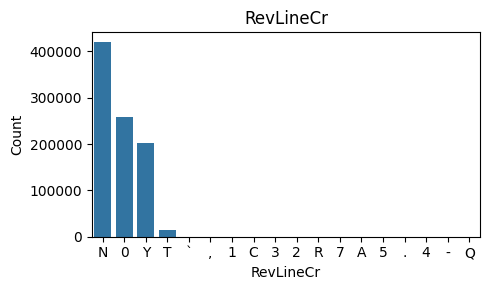

In [ ]:
plt.figure(figsize=(5, 3))
plt.subplot(1, 1, 1)
sns.countplot(data=df, x='RevLineCr')
plt.title('RevLineCr')
plt.ylabel('Count')
plt.tight_layout()

plt.show()

Observations:

Berdasarkan keacakan data dari `RevLineCr`, yang menyimpang dari dokumentasi. Jika saya lakukan imputasi berdasarkan "feeling" saya, kemungkinan data malah menjadi kotor dan tidak bersifat asli lagi karena diotak atik, dan belum tentu persepsi imputasi saya itu benar.

Oleh karena itu, di sini saya memutuskan untuk drop kolom `RevLineCr` seluruhnya karena penyimpangan ini, baik untuk `df_train` maupun `df_test`

In [ ]:
df_train = df_train.drop(axis=1, columns=['RevLineCr'])
df_test = df_test.drop(axis=1, columns=['RevLineCr'])

**HANDLING `LowDoc` IMPUTATION**

Berdasarkan https://www.mortgagechoice.com.au/home-loans/loan-types/low-doc-loan/

LowDoc adalah jenis program pinjaman dimana peminjam tidak melampirkan "proof of income" dan detail bukti jaminan pinjaman lainnya. Biasanya low doc loan ditargetkan untuk orang-orang self employed yang tidak memiliki gaji karena statusnya yang self employed.

Mengutip dari https://www.lendingtree.com/business/no-doc-loans/:

*Low or no-doc short-term loans, the loan amounts start at a few thousand dollars and can reach as high as $100,000.*

In [ ]:
df_train['LowDoc'].value_counts()

LowDoc
N    547998
Y     77205
0      1061
C       523
S       409
A       356
R        56
1         1
Name: count, dtype: int64

Observations:

Pada dokumentasi dituliskan bahwa `LowDoc` berisi nilai Y = Yes, N = No. Tapi realitanya terdapat value lain selain Y dan N. Maka, imputasi akan saya periksa berdasarkan apakah `GrAppv` atau jumlah pinjaman yang disetujui <= 100.000 untuk `LowDoc` yang bernilai di luar Y atau N, jika bernilai `True` maka imputasi dengan Y. Jika bernilai `False` maka imputasi dengan N, karena pinjaman low doc tidak boleh lebih dari 100.000

Namun sebelumnya `GrAppv` harus kita betulkan terlebih dahulu ke tipe data Int dari Object.

In [ ]:
# Before
df_train['GrAppv'].head(3)

695016     $10,000.00 
488153     $83,900.00 
532245    $173,300.00 
Name: GrAppv, dtype: object

In [ ]:
# Hapus $, koma, dan spasi di awal dan akhir string (df_train)
df_train['GrAppv'] = df_train['GrAppv'].str.replace('$', '').str.replace(',', '').str.strip()
df_train['GrAppv'] = pd.to_numeric(df_train['GrAppv'], errors='coerce')
df_train['GrAppv'] = df_train['GrAppv'].astype(int)

# Hapus $, koma, dan spasi di awal dan akhir string (df_test)
df_test['GrAppv'] = df_test['GrAppv'].str.replace('$', '').str.replace(',', '').str.strip()
df_test['GrAppv'] = pd.to_numeric(df_test['GrAppv'], errors='coerce')
df_test['GrAppv'] = df_test['GrAppv'].astype(int)

In [ ]:
# After
df_train['GrAppv'].head(3)

695016     10000
488153     83900
532245    173300
Name: GrAppv, dtype: int64

Jika `LowDoc` != `Y` dan `LowDoc` != `N`, artinya valuenya ngaco. Jika value ngaco nya memiliki `GrAppv` <= 100.000, pinjaman ini memenuhi kriteria low doc loan. Walaupun belum tentu peminjam mengajukan pinjamannya sebagai low doc loan, namun untuk value ngaco `LowDoc` <= 100.000 akan kita anggap sebagai low doc loan.

Maka:

Jika `LowDoc` != `Y` dan `LowDoc` != `N` dan `GrAppv` <= 100.000, kita imputasi sebagai `Y`

In [ ]:
# Jumlah row data yang harus kita imputasi dengan 'Y'
df_train[((df_train['LowDoc'] != 'Y') & (df_train['LowDoc'] != 'N')) & (df_train['GrAppv'] <= 100000)].shape[0]

2231

In [ ]:
rule = df_train[((df_train['LowDoc'] != 'Y') & (df_train['LowDoc'] != 'N')) & (df_train['GrAppv'] <= 100000)]

for i in rule.index:
  df_train.loc[i, 'LowDoc'] = 'Y'

Jika `LowDoc` != `Y` dan `LowDoc` != `N` dan `GrAppv` > 100.000, kita imputasi sebagai `N`

In [ ]:
# Jumlah row data yang harus kita imputasi dengan 'N'
df_train[((df_train['LowDoc'] != 'Y') & (df_train['LowDoc'] != 'N')) & (df_train['GrAppv'] > 100000)].shape[0]

1977

In [ ]:
rule = df_train[((df_train['LowDoc'] != 'Y') & (df_train['LowDoc'] != 'N')) & (df_train['GrAppv'] > 100000)]

for i in rule.index:
  df_train.loc[i, 'LowDoc'] = 'N'

Seharusnya seluruh value ngaco (selain `Y` dan `N` pada LowDoc) sudah kita lakukan imputasi. Sanity check:

In [ ]:
# Sanity check
df_train[((df_train['LowDoc'] != 'Y') & (df_train['LowDoc'] != 'N')) & (df_train['GrAppv'] <= 100000)].shape[0]

0

In [ ]:
# Sanity check
df_train[((df_train['LowDoc'] != 'Y') & (df_train['LowDoc'] != 'N')) & (df_train['GrAppv'] > 100000)].shape[0]

0

In [ ]:
df_train['LowDoc'].isna().sum()

0

**`ChgOffDate` HANDLING**

`ChgoffDate` adalah kolom tanggal suatu pinjaman dinyatakan gagal bayar.

In [ ]:
# Jumlah yang null, artinya MIF_Status nya 'ChgOff'
df_train[df_train['ChgOffDate'].isna()].shape[0]

515523

In [ ]:
# Jumlah yang not null, artinya MIF_Status nya 'P I F'
df_train[df_train['ChgOffDate'].isna() == False].shape[0]

113888

Sebetulnya NA pada kolom `ChgOffDate` ini artinya adalah pinjaman tersebut `MIF_Status`nya berisi 'P I F'. Dimana artinya NA pada kolom ini menandakan bahwa pinjaman ini tidak memiliki charge off date karena pinjaman dilunasi dengan baik.

Dan juga, `ChgOffDate` sebetulnya mengartikan hal yang sama persis dengan `MIF_Status`, yaitu menandakan apakah customer tersebut melunasi pinjamannya atau gagal bayar. Oleh karena itu, decision pada kolom `ChgOffDate` ini adalah akan didrop seluruhnya.

In [ ]:
df_train = df_train.drop(axis=1, columns=['ChgOffDate'])
df_test = df_test.drop(axis=1, columns=['ChgOffDate'])

**`DisbursementDate` HANDLING**

Observations:

`DisbursementDate` tidak bisa dilakukan imputasi berdasarkan mode. Karena secara logika akan menjadi tidak masuk akal. `DisbursementDate` merupakan tanggal dimana pencairan dana oleh SBA dilakukan. `DisbursementDate` pasti waktunya lebih di atas dari `ApprovalDate`. Karena suatu pinjaman pasti harus diapprove dulu, dan berdasarkan analisa dari dataset, sejak suatu pinjaman diapprove sampai dicairkan membutuhkan rentang waktu.

Untuk sekarang ini, `DisbursementDate` akan kita tinggalkan beserta NA valuesnya, karena tidak bisa dilakukan imputasi yang ideal, dan kemungkinan kolom ini masih akan kita butuhkan.

In [ ]:
missing_val = df_train.isna().sum()
missing_val = missing_val[missing_val > 0]
print (missing_val)

Name                   7
DisbursementDate    1673
dtype: int64


### Test dataframe

In [ ]:
missing_val = df_test.isna().sum()
missing_val = missing_val[missing_val > 0]
print (missing_val)

Name                  7
City                 10
State                 6
Bank                439
BankState           441
NewExist             45
LowDoc              780
DisbursementDate    695
dtype: int64


In [ ]:
missing_pct = df_test.isnull().sum() * 100 / len(df)
missing_df = pd.DataFrame({'Missing value percentage': missing_pct})
missing_df = missing_df[missing_df['Missing value percentage'] > 0]
print(missing_df)

                  Missing value percentage
Name                              0.000779
City                              0.001112
State                             0.000667
Bank                              0.048823
BankState                         0.049046
NewExist                          0.005005
LowDoc                            0.086747
DisbursementDate                  0.077294


**HANDLING `City` & `State` IMPUTATION**

Pertama, kita fokus untuk menghandle missing value `City` & `State` dulu. Untuk menentukan `City` & `State`, sebetulnya kita bisa mengkorelasikan dengan `Zip` code. Kita cek apakah row data yang missing value itu memiliki nilai `Zip`.

In [ ]:
df_test[(df_test['City'].isnull()) & (df_test['Zip'].isnull() == False)]

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
270265,2884192007,"RODIECK PLUMBING SUPPLY,INC ""A",NaN,CA,92102,CDC SMALL BUS. FINAN CORP,CA,0,15-Jun-81,1981,300,20,2.0,0,0,0,0,N,10-Sep-81,"$203,000.00",$0.00,P I F,$0.00,211000,"$211,000.00"
243450,2716822007,"YACHTING &NAVIGATION, LTD",NaN,IL,60624,BANK - AMERICA NATL ASSOC,IL,0,10-Apr-81,1981,300,10,2.0,0,0,0,0,N,4-Nov-81,"$150,000.00",$0.00,P I F,$0.00,150000,"$150,000.00"
342951,3391492010,BRAZNELL COMPANY,NaN,MO,63013,ST. LOUIS LOCAL DEVEL CO,MO,0,24-Feb-81,1981,240,50,1.0,0,0,0,0,N,10-Jun-81,"$107,000.00",$0.00,P I F,$0.00,107000,"$107,000.00"
342177,3386722002,LEE'S PAWN SHOP,NaN,MO,63103,ST. LOUIS LOCAL DEVEL CO,MO,0,16-Oct-81,1982,300,2,1.0,0,0,0,0,N,6-Jan-82,"$25,000.00",$0.00,P I F,$0.00,25000,"$25,000.00"
326169,3258222000,LAKEWOOD HEALTH CARE CENTER LT,NaN,OH,44115,GROWTH CAPITAL CORP.,OH,0,18-Nov-81,1982,300,40,1.0,0,0,0,0,N,10-Feb-82,"$205,000.00",$0.00,P I F,$0.00,205000,"$205,000.00"
42535,1330603010,BUSATH PHOTOGRAPHY,NaN,UT,84109,MOUNTAIN W. SMALL BUS. FINAN,UT,0,15-Dec-81,1982,300,2,2.0,0,0,0,0,N,6-Jan-82,"$190,000.00",$0.00,P I F,$0.00,190000,"$190,000.00"
437782,4247422000,B. G. WICKBERG COMPANY INC,NaN,MA,2169,SOUTH SHORE ECONOMIC DEVEL COR,MA,0,30-Jan-81,1981,240,18,1.0,0,0,0,0,N,9-Dec-81,"$156,000.00",$0.00,P I F,$0.00,156000,"$156,000.00"
342185,3386762003,OLIVE LIGHT LOAN & MERCANTILE,NaN,MO,63103,ST. LOUIS LOCAL DEVEL CO,MO,0,30-Nov-81,1982,180,4,2.0,0,0,0,0,N,10-Feb-82,"$71,000.00",$0.00,P I F,$0.00,71000,"$71,000.00"
270268,2884202008,"SAN DIEGO REFRIGERATD SVCS,INC",NaN,CA,92102,CDC SMALL BUS. FINAN CORP,CA,0,26-Jun-81,1981,180,28,1.0,0,0,0,0,N,10-Sep-81,"$407,000.00",$0.00,P I F,$0.00,407000,"$407,000.00"
378899,3662512006,AMERICAN MANAGEMENT ENG ASS IN,NaN,TX,78204,"ACCION TEXAS, INC.",TX,0,2-Jun-81,1981,300,0,1.0,0,0,0,0,N,9-Sep-81,"$74,000.00",$0.00,P I F,$0.00,74000,"$74,000.00"


In [ ]:
df_test[(df_test['State'].isnull()) & (df_test['Zip'].isnull() == False)]

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
366158,3557093005,CASCO SERVICE,CASCO,NaN,54205,UNION STATE BANK,WI,0,19-Oct-89,1990,204,8,1.0,0,0,1,0,N,30-Apr-90,"$300,000.00",$0.00,P I F,$0.00,300000,"$252,600.00"
328526,3280213000,KING'S TRUCK WASH,WICHITA,NaN,67219,SOUTH CENT. KANSAS ECONOMIC DE,KS,811192,5-Aug-88,1988,120,17,2.0,10,7,0,0,N,12-Jul-89,"$119,000.00",$0.00,P I F,$0.00,119000,"$119,000.00"
871847,9416233003,METRO SHEETMETAL & ERECTION,A452638533,NaN,76052,PROSPERITY BANK,TX,235610,23-Jul-96,1996,84,3,1.0,0,0,1,0,Y,31-Jul-96,"$80,000.00",$0.00,P I F,$0.00,80000,"$64,000.00"
379174,3664443009,WILLIAMS JEWELERS,SALT LAKE CITY,NaN,84124,ZIONS FIRST NATIONAL BANK,UT,448310,14-Dec-89,1990,60,4,1.0,0,0,1,0,N,31-Jul-90,"$250,000.00",$0.00,P I F,$0.00,250000,"$212,500.00"
264664,2850643009,CENTURY 21 PHILLIPS REALTY,CAMERON PARK,NaN,95682,SBA - EDF ENFORCEMENT ACTION,CO,0,12-Feb-87,1987,240,19,1.0,0,19,0,0,N,17-Jun-87,"$81,000.00",$0.00,P I F,$0.00,83000,"$83,000.00"
385418,3714383003,"LAKE MOVIE TYMES, INC.",LAKE OZARK,NaN,65049,CENTRAL BK OF LAKE OF OZARKS,MO,532230,4-Jan-90,1990,60,1,1.0,0,0,1,0,N,31-Jan-90,"$75,000.00",$0.00,P I F,$0.00,75000,"$67,500.00"


**Observations:**

Ternyata, row data dari `City` & `State` yang missing memiliki `Zip` code. Sehingga kita bisa melakukan imputasi `City` & `State` berdasarkan `Zip` menggunakan package `uszipcode`. Package `uszipcode` akan mencari kode dari `Zip` code dan memberikan output kotanya. Output tersebut akan kita imputasi ke kolom `City` & `State`

In [ ]:
search = SearchEngine()

imputed_rows = []

filter = df_test[(df_test['City'].isnull()) | (df_test['State'].isnull())]

for i in filter.index:
  zipcode = search.by_zipcode(df_test.loc[i, 'Zip'])
  if zipcode:
    df_test.loc[i, 'City'] = zipcode.major_city
    df_test.loc[i, 'State'] = zipcode.state
    imputed_rows.append(i)

df_test.loc[imputed_rows]

Exception ignored in: <function SearchEngine.__del__ at 0x7fa297c9f760>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/uszipcode/search.py", line 196, in __del__
  File "/usr/local/lib/python3.10/dist-packages/uszipcode/search.py", line 202, in close
  File "/usr/local/lib/python3.10/dist-packages/sqlalchemy/orm/session.py", line 1816, in close
  File "/usr/local/lib/python3.10/dist-packages/sqlalchemy/orm/session.py", line 1858, in _close_impl
  File "/usr/local/lib/python3.10/dist-packages/sqlalchemy/orm/session.py", line 926, in close
  File "/usr/local/lib/python3.10/dist-packages/sqlalchemy/engine/base.py", line 2426, in close
  File "/usr/local/lib/python3.10/dist-packages/sqlalchemy/engine/base.py", line 2649, in _do_close
  File "/usr/local/lib/python3.10/dist-packages/sqlalchemy/engine/base.py", line 2635, in _close_impl
  File "/usr/local/lib/python3.10/dist-packages/sqlalchemy/engine/base.py", line 2627, in _connection_rollback_impl
  File

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
366158,3557093005,CASCO SERVICE,Casco,WI,54205,UNION STATE BANK,WI,0,19-Oct-89,1990,204,8,1.0,0,0,1,0,N,30-Apr-90,"$300,000.00",$0.00,P I F,$0.00,300000,"$252,600.00"
270265,2884192007,"RODIECK PLUMBING SUPPLY,INC ""A",San Diego,CA,92102,CDC SMALL BUS. FINAN CORP,CA,0,15-Jun-81,1981,300,20,2.0,0,0,0,0,N,10-Sep-81,"$203,000.00",$0.00,P I F,$0.00,211000,"$211,000.00"
243450,2716822007,"YACHTING &NAVIGATION, LTD",Chicago,IL,60624,BANK - AMERICA NATL ASSOC,IL,0,10-Apr-81,1981,300,10,2.0,0,0,0,0,N,4-Nov-81,"$150,000.00",$0.00,P I F,$0.00,150000,"$150,000.00"
342951,3391492010,BRAZNELL COMPANY,Beaufort,MO,63013,ST. LOUIS LOCAL DEVEL CO,MO,0,24-Feb-81,1981,240,50,1.0,0,0,0,0,N,10-Jun-81,"$107,000.00",$0.00,P I F,$0.00,107000,"$107,000.00"
342177,3386722002,LEE'S PAWN SHOP,Saint Louis,MO,63103,ST. LOUIS LOCAL DEVEL CO,MO,0,16-Oct-81,1982,300,2,1.0,0,0,0,0,N,6-Jan-82,"$25,000.00",$0.00,P I F,$0.00,25000,"$25,000.00"
326169,3258222000,LAKEWOOD HEALTH CARE CENTER LT,Cleveland,OH,44115,GROWTH CAPITAL CORP.,OH,0,18-Nov-81,1982,300,40,1.0,0,0,0,0,N,10-Feb-82,"$205,000.00",$0.00,P I F,$0.00,205000,"$205,000.00"
42535,1330603010,BUSATH PHOTOGRAPHY,Salt Lake City,UT,84109,MOUNTAIN W. SMALL BUS. FINAN,UT,0,15-Dec-81,1982,300,2,2.0,0,0,0,0,N,6-Jan-82,"$190,000.00",$0.00,P I F,$0.00,190000,"$190,000.00"
437782,4247422000,B. G. WICKBERG COMPANY INC,Quincy,MA,2169,SOUTH SHORE ECONOMIC DEVEL COR,MA,0,30-Jan-81,1981,240,18,1.0,0,0,0,0,N,9-Dec-81,"$156,000.00",$0.00,P I F,$0.00,156000,"$156,000.00"
342185,3386762003,OLIVE LIGHT LOAN & MERCANTILE,Saint Louis,MO,63103,ST. LOUIS LOCAL DEVEL CO,MO,0,30-Nov-81,1982,180,4,2.0,0,0,0,0,N,10-Feb-82,"$71,000.00",$0.00,P I F,$0.00,71000,"$71,000.00"
328526,3280213000,KING'S TRUCK WASH,Wichita,KS,67219,SOUTH CENT. KANSAS ECONOMIC DE,KS,811192,5-Aug-88,1988,120,17,2.0,10,7,0,0,N,12-Jul-89,"$119,000.00",$0.00,P I F,$0.00,119000,"$119,000.00"


Kita lakukan sanity check untuk `City` setelah dilakukan imputasi.

In [ ]:
df_test['City'].isna().sum()

0

Kita lakukan sanity check untuk `State` setelah dilakukan imputasi.

In [ ]:
df_test['State'].isna().sum()

0

**HANDLING `Bank` IMPUTATION**

Sama seperti missing value handling pada `df_train`, kolom nama `Bank` tidak bisa untuk dilakukan imputasi berdasarkan aspek kolom lain, karena tidak berkorelasi. Sehingga imputasi yang akan dilakukan pada kolom `Bank` akan menggunakan modus dari kolom `Bank` tersebut.

In [ ]:
df_test['Bank'] = df_test['Bank'].fillna(df_test['Bank'].mode()[0])

Kita lakukan sanity check untuk `Bank` setelah dilakukan imputasi.

In [ ]:
df_test['Bank'].isna().sum()

0

**HANDLING `BankState` IMPUTATION**

Berdasarkan hasil observasi missing value handling `BankState` pada `df_train`, hanya sekitar 50% data peminjam yang `BankState`nya sama dengan `State`. Sehingga kesimpulan tersebut juga sama untuk `df_test` ini. Kita tidak bisa mengkorelasikan kalau `BankState` nilainya sama dengan `State`.

Oleh karena itu, untuk `BankState` di sini juga kita akan melakukan imputasi dengan menggunakan modus dari kolom tersebut.

In [ ]:
df_test['BankState'] = df_test['BankState'].fillna(df_test['BankState'].mode()[0])

Kita lakukan sanity check untuk `BankState` setelah dilakukan imputasi.

In [ ]:
df_test['BankState'].isna().sum()

0

**HANDLING `NewExist` IMPUTATION**

Berdasarkan observasi dari `df_train` sebelumnya, kolom ini tidak memiliki hubungan dengan kolom lain, sehingga kita akan melakukan imputasi menggunakan modus dari kolom tersebut.

In [ ]:
df_test['NewExist'] = df_test['NewExist'].fillna(df_test['NewExist'].mode()[0])

Kita lakukan sanity check untuk `NewExist` setelah dilakukan imputasi.

In [ ]:
df_test['NewExist'].isna().sum()

0

**HANDLING `LowDoc` IMPUTATION**

Sama seperti `df_train`, imputasi akan saya periksa berdasarkan apakah `GrAppv` atau jumlah pinjaman yang disetujui <= 100.000 untuk `LowDoc` yang bernilai di luar Y atau N, jika bernilai `True` maka imputasi dengan Y. Jika bernilai `False` maka imputasi dengan N, karena pinjaman low doc tidak boleh lebih dari 100.000

Maka:

Jika `LowDoc` != `Y` dan `LowDoc` != `N` dan `GrAppv` <= 100.000, kita imputasi sebagai `Y`

In [ ]:
df_test['LowDoc'].value_counts()

LowDoc
N    234821
Y     33130
0       430
C       235
S       194
A       141
R        19
Name: count, dtype: int64

In [ ]:
# Jumlah row data yang harus kita imputasi dengan 'Y'
df_test[((df_test['LowDoc'] != 'Y') & (df_test['LowDoc'] != 'N')) & (df_test['GrAppv'] <= 100000)].shape[0]

991

In [ ]:
rule = df_test[((df_test['LowDoc'] != 'Y') & (df_test['LowDoc'] != 'N')) & (df_test['GrAppv'] <= 100000)]

for i in rule.index:
  df_test.loc[i, 'LowDoc'] = 'Y'

Jika `LowDoc` != `Y` dan `LowDoc` != `N` dan `GrAppv` > 100.000, kita imputasi sebagai `N`

In [ ]:
# Jumlah row data yang harus kita imputasi dengan 'N'
df_test[((df_test['LowDoc'] != 'Y') & (df_test['LowDoc'] != 'N')) & (df_test['GrAppv'] > 100000)].shape[0]

808

In [ ]:
rule = df_test[((df_test['LowDoc'] != 'Y') & (df_test['LowDoc'] != 'N')) & (df_test['GrAppv'] > 100000)]

for i in rule.index:
  df_test.loc[i, 'LowDoc'] = 'N'

Seharusnya seluruh value ngaco (selain `Y` dan `N` pada LowDoc) sudah kita lakukan imputasi. Sanity check:

In [ ]:
# Sanity check
df_test[((df_test['LowDoc'] != 'Y') & (df_test['LowDoc'] != 'N')) & (df_test['GrAppv'] <= 100000)].shape[0]

0

In [ ]:
# Sanity check
df_test[((df_test['LowDoc'] != 'Y') & (df_test['LowDoc'] != 'N')) & (df_test['GrAppv'] > 100000)].shape[0]

0

In [ ]:
df_test['LowDoc'].isna().sum()

0

**`DisbursementDate` HANDLING**

Sama seperti `DisbursementDate` pada `df_train`, kolom ini tidak bisa dilakukan imputasi karena informasinya akan tidak makes sense.

Untuk sekarang ini, `DisbursementDate` akan kita tinggalkan beserta NA valuesnya, karena tidak bisa dilakukan imputasi yang ideal, dan kemungkinan kolom ini masih akan kita butuhkan.

In [ ]:
missing_val = df_test.isna().sum()
missing_val = missing_val[missing_val > 0]
print (missing_val)

Name                  7
DisbursementDate    695
dtype: int64


# Duplicate Values Handling

## Train dataframe

In [ ]:
print('Total duplicate data: ', df_train.duplicated().sum())

Total duplicate data:  0


## Test dataframe

In [ ]:
print('Total duplicate data: ', df_test.duplicated().sum())

Total duplicate data:  0


No duplicate data found. Kita lanjut

# Feature Engineering

## Wrong data type handlings

Di sini, kita akan cek lebih lanjut dan detail per masing-masing kolom, apakah masih ada format yang tidak sesuai

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 629411 entries, 695016 to 225325
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      629411 non-null  int64  
 1   Name               629404 non-null  object 
 2   City               629411 non-null  object 
 3   State              629411 non-null  object 
 4   Zip                629411 non-null  int64  
 5   Bank               629411 non-null  object 
 6   BankState          629411 non-null  object 
 7   NAICS              629411 non-null  int64  
 8   ApprovalDate       629411 non-null  object 
 9   ApprovalFY         629411 non-null  object 
 10  Term               629411 non-null  int64  
 11  NoEmp              629411 non-null  int64  
 12  NewExist           629411 non-null  float64
 13  CreateJob          629411 non-null  int64  
 14  RetainedJob        629411 non-null  int64  
 15  FranchiseCode      629411 non-null  int64  
 16  Ur

In [ ]:
df_train.head(3)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
695016,7212624008,DOWNTOWNE LAUNDRIE INC,MOUNT DORA,FL,32757,INNOVATIVE BANK,CA,812320,25-Feb-04,2004,84,1,1.0,1,1,1,0,N,29-Feb-04,"$10,000.00",$0.00,P I F,$0.00,10000,"$8,500.00"
488153,4698604008,"MIDWEST POWDER COATERS, INC.",RICHFIELD,WI,53076,NATL EXCH BK & TR,WI,332812,20-Jul-01,2001,28,8,1.0,0,0,1,2,Y,30-Sep-01,"$83,900.00",$0.00,CHGOFF,"$74,364.00",83900,"$71,315.00"
532245,5189664000,SIDNEY CLEANERS & LAUNDRY,SIDNEY,MT,59270,STOCKMAN BANK OF MONTANA,MT,812320,31-Jan-02,2002,144,6,1.0,0,6,1,2,N,28-Feb-02,"$173,300.00",$0.00,P I F,$0.00,173300,"$129,975.00"


### `ApprovalDate` & `DisbursementDate` diubah dari Object ke Datetime

**`ApprovalDate` & `DisbursementDate` diubah dari Object ke Datetime**

In [ ]:
cols = ['ApprovalDate', 'DisbursementDate']

for col in cols:
  df_train[col] = pd.to_datetime(df_train[col])
  df_test[col] = pd.to_datetime(df_test[col])

<ipython-input-83-5c468a5d1d03>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_train[col] = pd.to_datetime(df_train[col])
<ipython-input-83-5c468a5d1d03>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_test[col] = pd.to_datetime(df_test[col])
<ipython-input-83-5c468a5d1d03>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_train[col] = pd.to_datetime(df_train[col])
<ipython-input-83-5c468a5d1d03>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please 

### `DisbursementGross`, `BalanceGross`, `ChgOffPrinGr`, `SBA_Appv`, `ApprovalFY` diubah ke Int

**`DisbursementGross`, `BalanceGross`, `ChgOffPrinGr`, `SBA_Appv`, `ApprovalFY`, `NewExist` diubah ke Int**

In [ ]:
cols_to_convert = ['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'SBA_Appv']

for col in cols_to_convert:
    df_train[col] = df_train[col].replace('[\$,]', '', regex=True).str.replace(',', '').str.strip()
    df_train[col] = pd.to_numeric(df_train[col], errors='coerce')
    df_train[col] = df_train[col].astype(int)

    df_test[col] = df_test[col].replace('[\$,]', '', regex=True).str.replace(',', '').str.strip()
    df_test[col] = pd.to_numeric(df_test[col], errors='coerce')
    df_test[col] = df_test[col].astype(int)

Notes:

Ada wrong value pada `ApprovalFY`, dimana ketika dilakukan konversi ke integer, muncul error *ValueError: invalid literal for int() with base 10: '1976A'* yang kemungkinan terjadi karena kesalahan.

Oleh karena itu, kita harus ubah 1976A itu ke 1976 dulu

In [ ]:
df_train[df_train['ApprovalFY'] == '1976A']

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
776367,8209901003,FIVE LETTER DELI & GROCERY INC,ST ALBANS,NY,11412,"CITIBANK, N.A.",SD,0,1976-07-15,1976A,60,4,2.0,0,0,0,0,N,1976-10-28,40000,0,CHGOFF,0,40000,36000
713245,7420741004,THE TOGGERY,SPRINGFIELD,MA,1103,BANK OF AMERICA NATL ASSOC,RI,0,1976-08-30,1976A,84,5,1.0,0,0,0,0,N,NaT,73000,0,CHGOFF,827,73000,40150
710381,7389331000,BAUMAN'S APPLIANCE,ODESSA,NY,14869,CHEMUNG CANAL TRUST COMPANY,NY,0,1976-07-19,1976A,60,2,2.0,0,0,0,0,N,1976-08-09,15000,0,CHGOFF,475,15000,13500
788539,8375031008,"HOWARD S. CULVER, INC.",HEBRON,MD,21830,WELLS FARGO BANK NATL ASSOC,MD,0,1976-09-30,1976A,120,39,1.0,0,0,0,0,N,1976-10-21,275000,0,CHGOFF,218205,275000,247500
781090,8273621007,GILA VALLEY BLOCK CO (SUB),SAFFORD,AZ,85711,FDIC/SOUTHWESTERN BANK,CA,0,1976-07-21,1976A,120,22,1.0,0,0,0,0,N,1976-08-02,500000,0,CHGOFF,361052,500000,450000
751519,7848911008,MICHAELS TRUCK STOP,CHICAGO,IL,60633,BANK OF AMERICA NATL ASSOC,NC,0,1976-09-29,1976A,120,3,2.0,0,0,0,0,N,NaT,550000,0,CHGOFF,572877,550000,495000
775430,8197661005,FANGMAN CABINET SHOP,DYERSVILLE,IA,52040,FDIC/DYERSVILLE,IL,0,1976-08-26,1976A,120,9,1.0,0,0,0,0,N,1977-01-03,72000,0,CHGOFF,8509,72000,64800
780120,8260831001,"WALKER-NEER MANUFACTURING CO.,",WICHITA FALLS,TX,76307,BANK OF AMERICA NATL ASSOC,TX,0,1976-07-29,1976A,174,110,1.0,0,0,0,0,N,1977-01-28,650000,0,CHGOFF,253484,750000,499500
705375,7334771006,CROWN POINT LUMBER,CROWN POINT,IN,46307,JPMORGAN CHASE BANK NATL ASSOC,IN,0,1976-09-10,1976A,120,5,2.0,0,0,0,0,N,1977-02-07,145000,0,CHGOFF,0,145000,130500
775002,8191291000,JUG & JIGGER,YUCAIPA,CA,92399,BANK OF AMERICA NATL ASSOC,CA,0,1976-08-20,1976A,84,3,1.0,0,0,0,0,N,1976-09-20,94500,0,CHGOFF,63182,94500,85050


In [ ]:
# Ubah 1976A ke 1976
df_train.loc[df_train['ApprovalFY'] == '1976A', 'ApprovalFY'] = '1976'

In [ ]:
df_test[df_test['ApprovalFY'] == '1976A']

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
775978,8204371000,AUTOMOTIVE ELECTRIC REBUILDERS,FAIRBANKS,AK,99701,KEYBANK NATIONAL ASSOCIATION,OR,0,1976-09-01,1976A,240,8,1.0,0,0,0,0,N,1977-04-15,164679,0,CHGOFF,439,165000,148500
784351,8318051007,BAGLEY & COMPANY,SALT LAKE CITY,UT,84111,JPMORGAN CHASE BANK NATL ASSOC,AZ,0,1976-08-19,1976A,180,4,1.0,0,0,0,0,N,1976-12-29,350000,0,CHGOFF,130210,350000,315000
788661,8376951004,WELMET CO LTD,OLD BETHPAGE,NY,11804,DEUTSCHE BK TR CO AMERICAS,NY,0,1976-09-14,1976A,60,130,1.0,0,0,0,0,N,NaT,200000,0,CHGOFF,56948,200000,180000
699732,7268591001,FASHION NOVELTY CORP OF NJ,CARLSTADT,NJ,7072,VALLEY NATIONAL BANK,NJ,0,1976-09-29,1976A,120,36,1.0,0,0,0,0,N,1976-11-23,350000,0,CHGOFF,48361,350000,315000
748029,7799101004,"JUSTIN TYME,INC.",COLUMBUS,OH,43265,"PNC BANK, NATIONAL ASSOCIATION",OH,0,1976-08-20,1976A,102,10,1.0,0,0,0,0,N,1976-09-15,150000,0,CHGOFF,87037,150000,135000
704030,7319361003,J W HUGHES HUGHES 66 GLDN PLNS,FOLLETT,TX,79034,FIRSTBANK SOUTHWEST,TX,0,1976-09-17,1976A,120,29,1.0,0,0,0,0,N,1976-12-01,325000,0,CHGOFF,45910,325000,292500


In [ ]:
# Ubah 1976A ke 1976
df_test.loc[df_test['ApprovalFY'] == '1976A', 'ApprovalFY'] = '1976'

In [ ]:
df_train['ApprovalFY'] = df_train['ApprovalFY'].astype(int)
df_test['ApprovalFY'] = df_test['ApprovalFY'].astype(int)

### `NewExist` diubah ke Integer

Ubah `NewExist` ke Integer.

In [ ]:
df_train['NewExist'] = df_train['NewExist'].astype(int)
df_test['NewExist'] = df_test['NewExist'].astype(int)

In [ ]:
df_train['NewExist'].value_counts()

NewExist
1    451249
2    177427
0       735
Name: count, dtype: int64

In [ ]:
df_test['NewExist'].value_counts()

NewExist
1    193754
2     75698
0       298
Name: count, dtype: int64

Ternyata, `NewExist` memiliki 3 unique values, yaitu: 0, 1, 2. Padahal sesuai dokumentasi dari source dataset, values pada `NewExist` hanya berisi 2 values, yaitu:
- 1 = Existing business
- 2 = New business

Dan value `0` di sini tidak jelas apakah ini `Existing business` atau `New business`.

Di sini, saya akan cek komparasi dengan kolom `NoEmp`, yaitu jumlah karyawan di bisnis peminjam. Di sini saya mengartikan kalau bisnis itu memiliki 0 karyawan, artinya bisnis itu adalah `New business` yang belum memiliki karyawan.

Maka:

- Jika `NewExist` != 1 dan `NewExist` != 2 dan `NoEmp` == 0, maka kita assign sebagai 2 (New business)

- Jika `NewExist` != 1 dan `NewExist` != 2 dan `NoEmp` != 0, maka kita assign sebagai 1 (Existing business)

In [ ]:
rule1 = df_train[((df_train['NewExist'] != 1) & (df_train['NewExist'] != 2)) & (df_train['NoEmp'] == 0)]
rule2 = df_train[((df_train['NewExist'] != 1) & (df_train['NewExist'] != 2)) & (df_train['NoEmp'] != 0)]

rule3 = df_test[((df_test['NewExist'] != 1) & (df_test['NewExist'] != 2)) & (df_test['NoEmp'] == 0)]
rule4 = df_test[((df_test['NewExist'] != 1) & (df_test['NewExist'] != 2)) & (df_test['NoEmp'] != 0)]

for i in rule1.index:
  df_train.loc[i, 'NewExist'] = 2

for i in rule2.index:
  df_train.loc[i, 'NewExist'] = 1

for i in rule3.index:
  df_test.loc[i, 'NewExist'] = 2

for i in rule4.index:
  df_test.loc[i, 'NewExist'] = 1

Kita lakukan sanity check

In [ ]:
df_train['NewExist'].value_counts()

NewExist
1    451981
2    177430
Name: count, dtype: int64

In [ ]:
df_test['NewExist'].value_counts()

NewExist
1    194052
2     75698
Name: count, dtype: int64

Semua value sudah benar

## Pembuatan feature

### `NAICS` to `IndSec`

In [ ]:
df_train['NAICS'].value_counts()

NAICS
0         141293
722110     19757
722211     13592
811111     10185
621210      9753
           ...  
212210         1
339910         1
311311         1
111160         1
311351         1
Name: count, Length: 1302, dtype: int64

NAICS adalah sistem klasifikasi industri di US. Kode NAICS adalah kode enam digit yang spesifik untuk industri, dengan 2 digit pertama adalah kode Sektor Industrinya.

Di sini saya akan membuat feature baru yaitu sektor industri berdasarkan kode NAICS untuk memudahkan analisa dan EDA. Feature baru itu akan dinamakan `IndSec`

Untuk kode NAICS, referensinya didapatkan dari: https://www.census.gov/naics/?58967?yearbck=2022

Notes: Terdapat beberapa `NAICS` yang 2

In [ ]:
naics_mapping = {
    '11': 'Agriculture, Forestry, Fishing and Hunting',
    '21': 'Mining, Quarrying, and Oil and Gas Extraction',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing', '32': 'Manufacturing', '33': 'Manufacturing',
    '42': 'Wholesale Trade',
    '44': 'Retail Trade', '45': 'Retail Trade',
    '48': 'Transportation and Warehousing', '49': 'Transportation and Warehousing',
    '51': 'Information',
    '52': 'Finance and Insurance',
    '53': 'Real Estate and Rental and Leasing',
    '54': 'Professional, Scientific, and Technical Services',
    '55': 'Management of Companies and Enterprises',
    '56': 'Administrative and Support and Waste Management and Remediation Services',
    '61': 'Educational Services',
    '62': 'Health Care and Social Assistance',
    '71': 'Arts, Entertainment, and Recreation',
    '72': 'Accommodation and Food Services',
    '81': 'Other Services (except Public Administration)',
    '92': 'Public Administration'
}

In [ ]:
df_train['IndSector'] = df_train['NAICS'].astype(str).str[:2].map(naics_mapping).fillna('Unknown')
df_test['IndSector'] = df_test['NAICS'].astype(str).str[:2].map(naics_mapping).fillna('Unknown')

### `NAICS` to `IndDefRate`

In [ ]:
default_rate = {
    '21': 8, '11': 9, '55': 10, '62': 10, '22': 14, '92': 15,
    '54': 19, '42': 19, '31': 19, '32': 16, '33': 14, '81': 20,
    '71': 21, '72': 22, '44': 22, '45': 23, '23': 23, '56': 24,
    '61': 24, '51': 25, '48': 27, '49': 23, '52': 28, '53': 29
}

In [ ]:
df_train['IndDefRate'] = df_train['NAICS'].astype(str).str[:2].map(default_rate).fillna(0).astype(int)
df_test['IndDefRate'] = df_test['NAICS'].astype(str).str[:2].map(default_rate).fillna(0).astype(int)

In [ ]:
df_train.head(2)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,IndSector,IndDefRate
695016,7212624008,DOWNTOWNE LAUNDRIE INC,MOUNT DORA,FL,32757,INNOVATIVE BANK,CA,812320,2004-02-25,2004,84,1,1,1,1,1,0,N,2004-02-29,10000,0,P I F,0,10000,8500,Other Services (except Public Administration),20
488153,4698604008,"MIDWEST POWDER COATERS, INC.",RICHFIELD,WI,53076,NATL EXCH BK & TR,WI,332812,2001-07-20,2001,28,8,1,0,0,1,2,Y,2001-09-30,83900,0,CHGOFF,74364,83900,71315,Manufacturing,14


In [ ]:
df_test.head(2)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,IndSector,IndDefRate
395280,3808784002,L & S CARRY OUT,HILLIARD,OH,43026,THE HUNTINGTON NATIONAL BANK,OH,0,2000-06-26,2000,243,2,1,0,0,1,1,N,2000-06-30,150000,0,P I F,0,185000,138750,Unknown,0
451751,4380795004,PATRICK LEVINGSTON,Concord,NC,28027,BRANCH BK. & TR CO,NC,722330,2010-11-22,2011,36,2,2,0,2,0,2,N,2010-12-01,16000,0,P I F,0,16000,8000,Accommodation and Food Services,22


### `ApprovalDate` to `year`, `month`, and `date`

`ApprovalDate` kita pecah menjadi format `tahun`, `bulan`, dan `tanggal`

In [ ]:
df_train['approval_date_year'] = pd.to_datetime(df_train['ApprovalDate']).dt.year
df_train['approval_date_month'] = pd.to_datetime(df_train['ApprovalDate']).dt.month
df_train['approval_date_day_of_month'] = pd.to_datetime(df_train['ApprovalDate']).dt.day

In [ ]:
df_test['approval_date_year'] = pd.to_datetime(df_test['ApprovalDate']).dt.year
df_test['approval_date_month'] = pd.to_datetime(df_test['ApprovalDate']).dt.month
df_test['approval_date_day_of_month'] = pd.to_datetime(df_test['ApprovalDate']).dt.day

### `FranchiseCode` to `Franchise`

In [ ]:
df_train['FranchiseCode'].value_counts()

FranchiseCode
1        447122
0        146184
78760      2338
68020      1359
50564       739
          ...  
29579         1
10794         1
61603         1
63635         1
29702         1
Name: count, Length: 2472, dtype: int64

Berdasarkan guideline, nilai `FranchiseCode` yang bernilai 0 atau 1 adalah No Franchise. Artinya:
- If (`FranchiseCode` != 0) & (`FranchiseCode` != 1) Then `Franchise`
- Else `No Franchise`

Kita akan buat kolom baru berdasarkan apakah bisnis ini merupakan Franchise atau bukan, dan menghilangkan kolom `FranchiseCode` untuk membuat lebih simpel

In [ ]:
df_train['Franchise'] = df_train['FranchiseCode'].apply(lambda x: 0 if x in [0, 1] else 1)

In [ ]:
df_test['Franchise'] = df_test['FranchiseCode'].apply(lambda x: 0 if x in [0, 1] else 1)

### `NewExist` to `NewBusiness`

NewExist: Indikator apakah bisnis peminjam adalah baru atau sudah ada. Nilainya adalah:
- 1 = Existing business
- 2 = New business

Namun indikator 1 dan 2 seperti ini akan menjadi tidak efisien untuk dilakukan analisa. Karena lumrahnya nilai adalah 0 dan 1 yang merepresentasikan Tidak dan Ya.

Maka di sini saya akan membuat kolom baru bernama `NewBusiness` yang merupakan indikator apakah bisnis peminjam adalah baru atau tidak (sudah ada). Nilainya adalah:
- 0 = Tidak (Bisnis sudah ada sebelumnya)
- 1 = Ya (New Business)

In [ ]:
df_train['NewExist'].value_counts()

NewExist
1    451981
2    177430
Name: count, dtype: int64

In [ ]:
df_train['NewBusiness'] = df_train['NewExist'].apply(lambda x: 0 if x == 1 else 1)
df_test['NewBusiness'] = df_test['NewExist'].apply(lambda x: 0 if x == 1 else 1)

### `CreateJob` to `IsCreatedJob`

`CreateJob` adalah jumlah pekerjaan yang diciptakan selama durasi (`Term`) peminjam melakukan pinjaman sebelum status dari `MIS_Status` berubah (lunas atau gagal bayar). Di sini bisa dibuat feature baru sebagai indikator apakah bisnis peminjam menghasilkan lapangan kerja baru atau tidak.
- Jika `CreateJob` = 0, artinya bisnis tersebut tidak menghasilkan lapangan kerja baru.
- Jika `CreateJob` != 0, artinya bisnis tersebut menghasilkan lapangan kerja baru.

Maka di sini akan dibuat kolom baru bernama `IsCreatedJob` sebagai indikator apakah bisnis menghasilkan lapangan kerja atau tidak. Nilainya adalah:
- 0 = Tidak
- 1 = Ya

In [ ]:
df_train['IsCreatedJob'] = df_train['CreateJob'].apply(lambda x: 0 if x == 0 else 1)
df_test['IsCreatedJob'] = df_test['CreateJob'].apply(lambda x: 0 if x == 0 else 1)

# Outliers Handling

In [ ]:
numerical = ['Zip','NAICS', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist', 'CreateJob',
             'RetainedJob', 'FranchiseCode', 'UrbanRural', 'DisbursementGross',
             'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv', 'IndDefRate']

For `df_train`

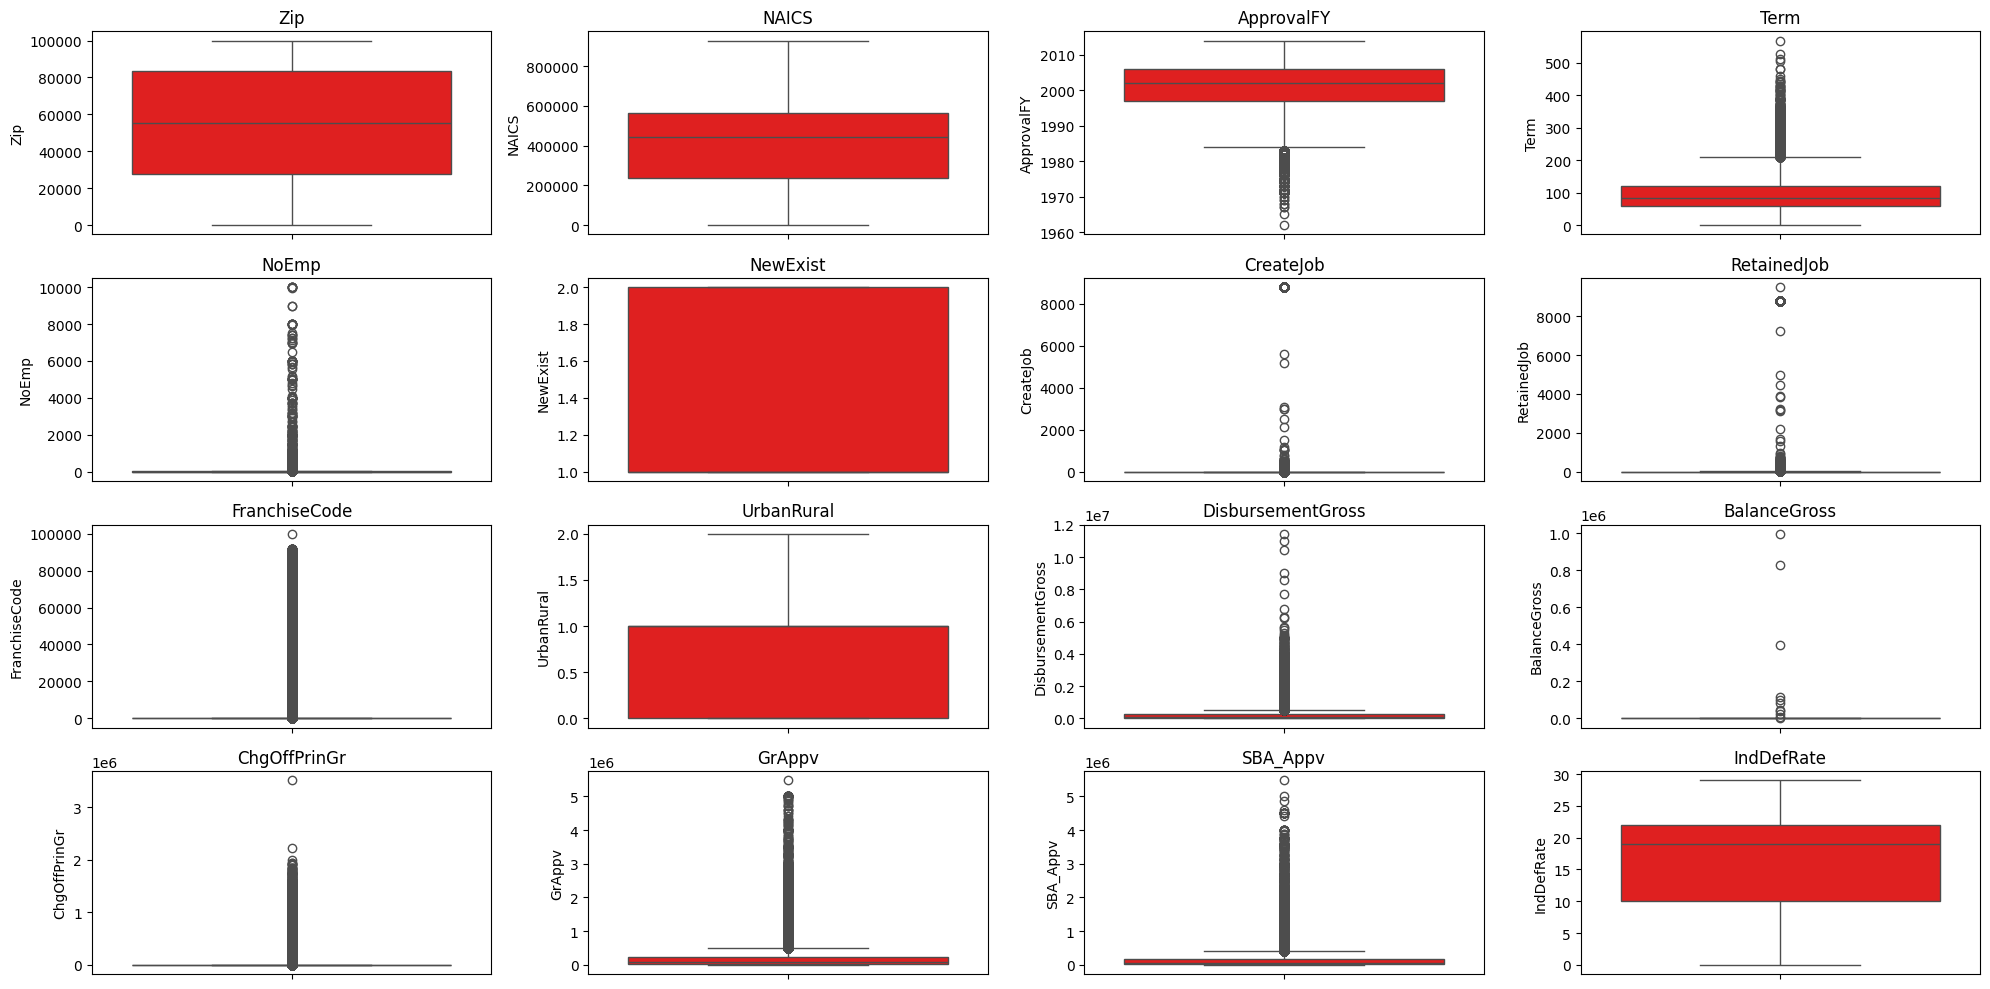

In [ ]:
plt.figure(figsize=(20, 10))
for i in range(0, len(numerical)):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=df_train[numerical[i]], color='red')
    plt.title(numerical[i])
    plt.tight_layout()

plt.show()

For `df_test`

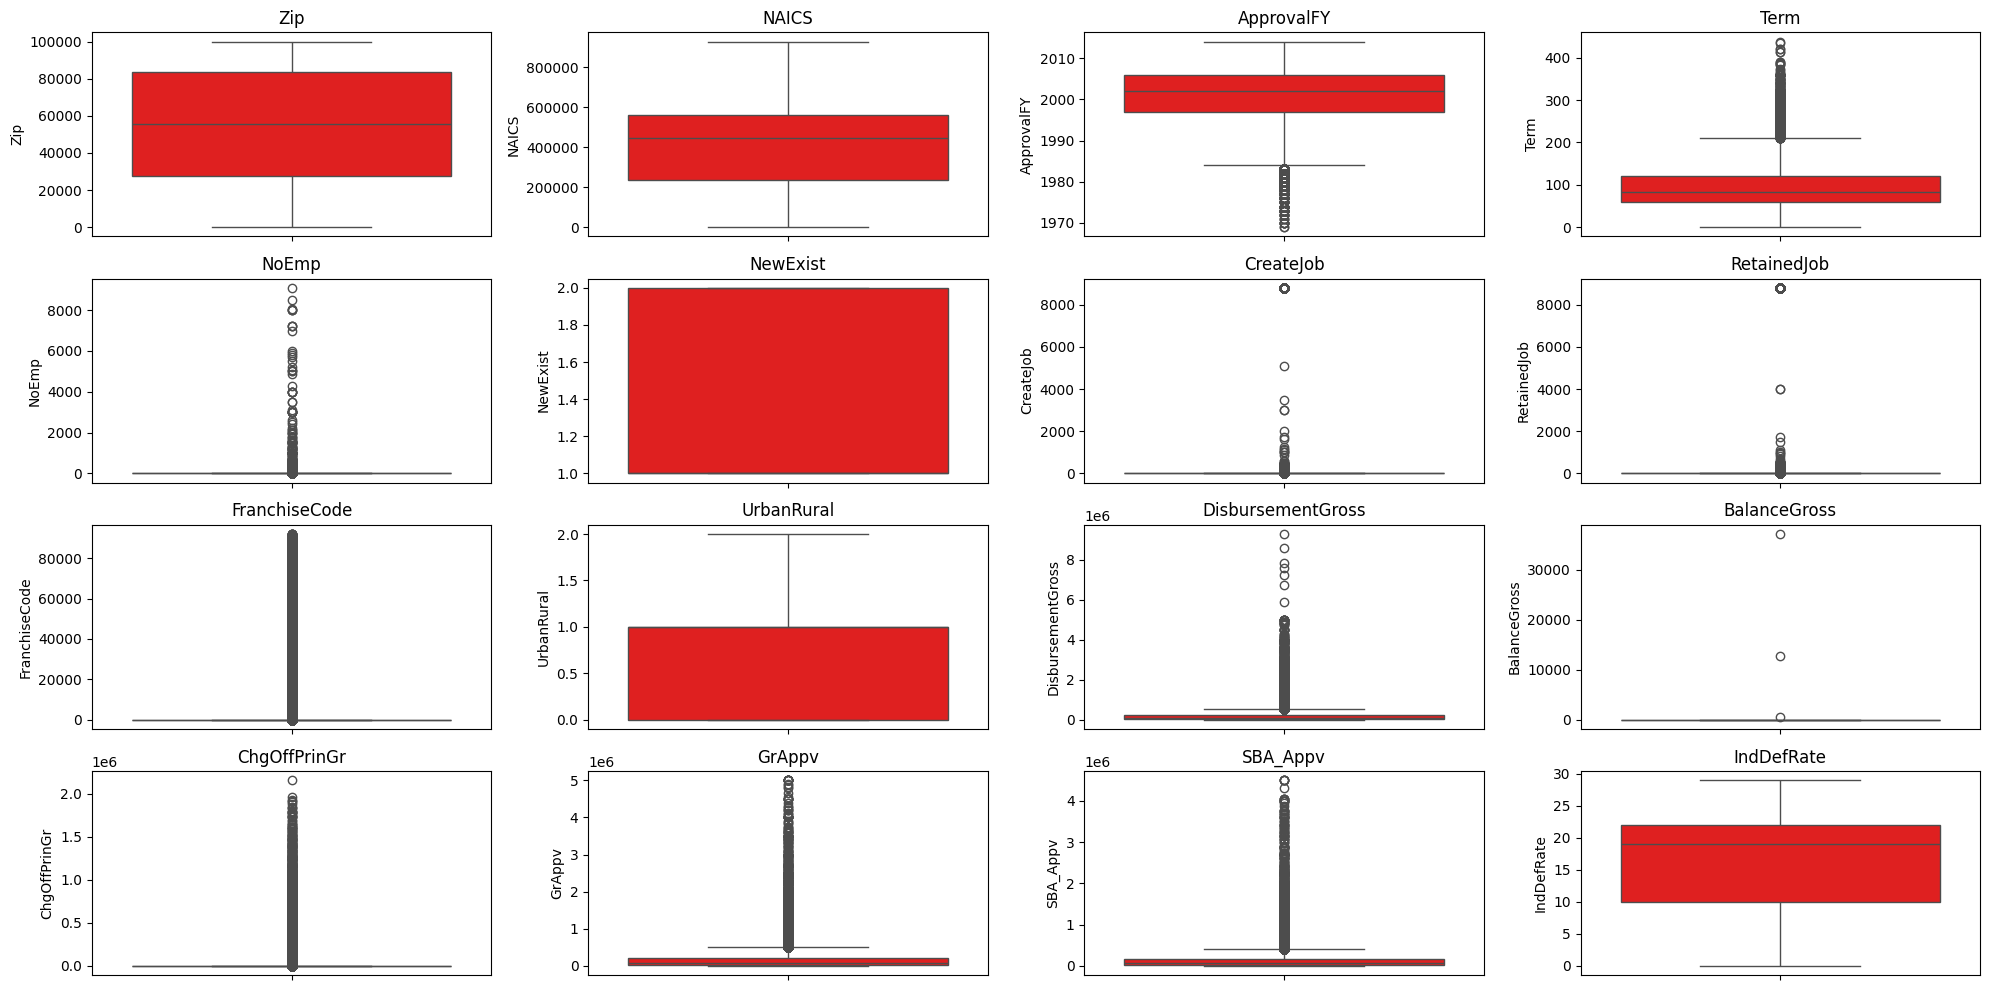

In [ ]:
plt.figure(figsize=(20, 10))
for i in range(0, len(numerical)):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=df_test[numerical[i]], color='red')
    plt.title(numerical[i])
    plt.tight_layout()

plt.show()

# EDA

Kita gabungkan `df_train` dan `df_test` menjadi `df_eda` agar proses analisa dan mencari insight lebih mudah.

In [ ]:
df_pre_eda = pd.concat([df_train, df_test], ignore_index=True)

In [ ]:
df_pre_eda.describe()

,LoanNr_ChkDgt,Zip,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,DisbursementDate,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv,IndDefRate,approval_date_year,approval_date_month,approval_date_day_of_month,Franchise,NewBusiness,IsCreatedJob
count,8.991610e+05,899161.000000,899161.000000,899161,899161.000000,899161.000000,899161.000000,899161.000000,899161.000000,899161.000000,899161.000000,899161.000000,896793,8.991610e+05,899161.000000,8.991610e+05,8.991610e+05,8.991610e+05,899161.000000,899161.000000,899161.000000,899161.000000,899161.000000,899161.000000,899161.000000
mean,4.772617e+09,53804.565678,398662.280256,2001-06-04 11:42:57.847126656,2001.143644,110.772734,11.411312,1.281516,8.430405,10.797293,2753.735121,0.757751,2001-09-24 03:24:04.077730944,2.011545e+05,2.989359,1.350333e+04,1.926874e+05,1.494891e+05,15.613609,2000.927507,6.483309,16.188804,0.057581,0.281516,0.300187
min,1.000014e+09,0.000000,0.000000,1974-01-09 00:00:00,1962.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1974-01-07 00:00:00,0.000000e+00,0.000000,0.000000e+00,2.000000e+02,1.000000e+02,0.000000,1974.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.589765e+09,27587.000000,235210.000000,1996-11-22 00:00:00,1997.000000,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1997-05-31 00:00:00,4.200000e+04,0.000000,0.000000e+00,3.500000e+04,2.125000e+04,10.000000,1996.000000,4.000000,9.000000,0.000000,0.000000,0.000000
50%,4.361454e+09,55410.000000,445310.000000,2002-09-27 00:00:00,2002.000000,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2002-12-31 00:00:00,1.000000e+05,0.000000,0.000000e+00,9.000000e+04,6.125000e+04,19.000000,2002.000000,6.000000,16.000000,0.000000,0.000000,0.000000
75%,6.904634e+09,83704.000000,561730.000000,2006-01-20 00:00:00,2006.000000,120.000000,10.000000,2.000000,1.000000,4.000000,1.000000,1.000000,2006-03-31 00:00:00,2.380000e+05,0.000000,0.000000e+00,2.250000e+05,1.750000e+05,22.000000,2006.000000,9.000000,24.000000,0.000000,1.000000,1.000000
max,9.996003e+09,99999.000000,928120.000000,2073-12-20 00:00:00,2014.000000,569.000000,9999.000000,2.000000,8800.000000,9500.000000,99999.000000,2.000000,2073-12-24 00:00:00,1.144632e+07,996262.000000,3.512596e+06,5.472000e+06,5.472000e+06,29.000000,2073.000000,12.000000,31.000000,1.000000,1.000000,1.000000
std,2.538177e+09,31184.064882,263317.745143,NaN,5.913663,78.857162,74.108307,0.449739,236.688560,237.120994,12758.039427,0.646436,NaN,2.876412e+05,1442.164318,6.515240e+04,2.832638e+05,2.284149e+05,9.281754,5.962653,3.361799,8.763470,0.232950,0.449739,0.458339


## Anomalies on the data

Ada beberapa kejanggalan pada dataset, seperti:

### Tanggal `ApprovalDate` yang tidak wajar

`ApprovalDate` memiliki minimum value tahun 1974, dan maximum value tahun 2073. Sedangkan dokumentasi dari data ini hanya pada rentang waktu 1987 - 2014.

**`ApprovalDate` yang memiliki tahun di atas 2014**

In [ ]:
df_train[df_train['ApprovalDate'] > pd.Timestamp('2014-12-31')].shape[0]

99

In [ ]:
df_test[df_test['ApprovalDate'] > pd.Timestamp('2014-12-31')].shape[0]

39

**`ApprovalDate` yang memiliki tahun di bawah 1987**

In [ ]:
df_train[df_train['ApprovalDate'] < pd.Timestamp('1987-1-1')].shape[0]

7685

In [ ]:
df_test[df_test['ApprovalDate'] < pd.Timestamp('1987-1-1')].shape[0]

3300

**Drop tanggal yang tidak wajar**

In [ ]:
row_drop_train = df_train[(df_train['ApprovalDate'] > pd.Timestamp('2014-12-31')) |
 (df_train['ApprovalDate'] < pd.Timestamp('1987-1-1'))].index

row_drop_test = df_test[(df_test['ApprovalDate'] > pd.Timestamp('2014-12-31')) |
 (df_test['ApprovalDate'] < pd.Timestamp('1987-1-1'))].index

In [ ]:
df_train = df_train.drop(row_drop_train)
df_test = df_test.drop(row_drop_test)

Let's do sanity check

In [ ]:
df_train[(df_train['ApprovalDate'] > pd.Timestamp('2014-12-31')) |
 (df_train['ApprovalDate'] < pd.Timestamp('1987-1-1'))].shape[0]

0

In [ ]:
df_test[(df_test['ApprovalDate'] > pd.Timestamp('2014-12-31')) |
 (df_test['ApprovalDate'] < pd.Timestamp('1987-1-1'))].shape[0]

0

### `Zip` code yang tidak wajar

Terdapat `Zip` code yang nilainya 0 dan 99999, dimana code tersebut tidak exist in real life. Dari sini kita ketahui kalau ada inputan `Zip` yang salah.

In [ ]:
df_train[(df_train['Zip'] == 0) | (df_train['Zip'] == 99999)].shape[0]

329

In [ ]:
df_test[(df_test['Zip'] == 0) | (df_test['Zip'] == 99999)].shape[0]

160

Kita make sure lagi apakah ada `Zip` yang tidak termasuk ke dalam list kode pos yang ada di US.

Di sini saya akan menggunakan package `uszipcode` yang berisi database seluruh kode pos yang ada di US.
1. Membuka ZIP code dari 00000 sampai 99999 pada package `uszipcode`
2. Nilai dari `Zip` akan dibandingkan dengan data `uszipcode` tersebut
3. Di df_train akan sementara dibentuk kolom `is_valid_zip` sebagai acuan valid atau tidaknya isian `Zip` (True = Valid, False = Tidak Valid)

In [ ]:
search = SearchEngine()

# Mendapatkan semua ZIP code dari 0 sampai 99999
all_zip_codes = set()
for i in range(1, 100000):
    zipcode = str(i).zfill(5)
    if search.by_zipcode(zipcode):
        all_zip_codes.add(zipcode)

Exception ignored in: <function SearchEngine.__del__ at 0x7fa297c9f760>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/uszipcode/search.py", line 196, in __del__
  File "/usr/local/lib/python3.10/dist-packages/uszipcode/search.py", line 202, in close
  File "/usr/local/lib/python3.10/dist-packages/sqlalchemy/orm/session.py", line 1816, in close
  File "/usr/local/lib/python3.10/dist-packages/sqlalchemy/orm/session.py", line 1858, in _close_impl
  File "/usr/local/lib/python3.10/dist-packages/sqlalchemy/orm/session.py", line 926, in close
  File "/usr/local/lib/python3.10/dist-packages/sqlalchemy/engine/base.py", line 2426, in close
  File "/usr/local/lib/python3.10/dist-packages/sqlalchemy/engine/base.py", line 2649, in _do_close
  File "/usr/local/lib/python3.10/dist-packages/sqlalchemy/engine/base.py", line 2635, in _close_impl
  File "/usr/local/lib/python3.10/dist-packages/sqlalchemy/engine/base.py", line 2627, in _connection_rollback_impl
  File

**Cek pada `df_train`**

In [ ]:
# df_train['Zip_str'] = df_train['Zip'].astype(str).str.zfill(5)
# df_train['is_valid_zip'] = df_train['Zip_str'].isin(all_zip_codes)

In [ ]:
# df_train[~df_train['is_valid_zip']].shape[0]

In [ ]:
# df_train[~df_train['is_valid_zip']].head(5)

In [ ]:
# invalid_zip_codes = df_train[~df_train['is_valid_zip']]

In [ ]:
# # Save sebelum dilakukan imputasi untuk dibandingkan nanti
# invalid_zip_codes_saved = invalid_zip_codes.copy()

In [ ]:
# Mencari ZIP code berdasarkan kota dan negara bagian

# LIVE Disimpen di cache biar lebih cepet, kalo gk lama banget
# city_state_cache = {}
# def find_zipcode(city, state):
#     key = (city, state)
#     if key in city_state_cache:
#         return city_state_cache[key]
#     try:
#         result = search.by_city_and_state(city, state)
#         if result:
#             city_state_cache[key] = result[0].zipcode
#             return result[0].zipcode
#     except ValueError:
#         city_state_cache[key] = None
#     return None

# UNUSED! cara lama nggak pakai cache, lama banget
# def find_zipcode(city, state):
#     try:
#         result = search.by_city_and_state(city, state)
#         if result:
#             return result[0].zipcode
#     except ValueError:
#         return None
#     return None

In [ ]:
# # DataFrame untuk menyimpan baris yang tidak dapat diimputasi
# unmatched_rows = pd.DataFrame(columns=df_train.columns)

# # Imputasi ZIP code yang salah
# for index, row in invalid_zip_codes.iterrows():
#     correct_zip = find_zipcode(row['City'], row['State'])
#     if correct_zip:
#         df_train.at[index, 'Zip'] = correct_zip
#     else:
#         unmatched_rows = pd.concat([unmatched_rows, pd.DataFrame([row])], ignore_index=True)

Lalu kita bandingkan 5 row teratas yang invalid (sesudah diimputasi), dengan 5 row teratas yang invalid (sebelum diimputasi)

In [ ]:
# df_train[~df_train['is_valid_zip']].head(5)

In [ ]:
# invalid_zip_codes_saved.head(5)

Lalu setelah dilakukan imputasi, ternyata masih ada `Zip` yang salah dengan `City` atau `State` yang tidak terdaftar di `uszipcode`. Ini sepertinya harus dibuang karena tidak bisa diimputas apapun.

In [ ]:
# unmatched_rows.shape[0]

In [ ]:
# unmatched_rows.head(5)

In [ ]:
# THIS CELL TO REMOVE THE UNMATCHED ROWS LATER! <--- REMEMBER

Lalu kita buang kolom `Zip_str` dan `is_valid_zip` pada dataframe karena sudah tidak digunakan. Mereka hanya digunakan untuk membandingkan apakah `Zip` valid atau tidak saja

In [ ]:
# # Buang 'Zip_str', 'is_valid_zip' soalnya sudah tidak berguna (mereka untuk ngecek aja)
# df_train = df_train.drop(columns=['Zip_str', 'is_valid_zip'])

**Cek pada `df_test`**

In [ ]:
# df_test['Zip_str'] = df_test['Zip'].astype(str).str.zfill(5)
# df_test['is_valid_zip'] = df_test['Zip_str'].isin(all_zip_codes)

In [ ]:
# df_test[~df_test['is_valid_zip']].shape[0]

In [ ]:
# df_test[~df_test['is_valid_zip']].head(5)

In [ ]:
# invalid_zip_codes = df_test[~df_test['is_valid_zip']]

In [ ]:
# # DataFrame untuk menyimpan baris yang tidak dapat diimputasi
# unmatched_rows = pd.DataFrame(columns=df_test.columns)

# # Imputasi ZIP code yang salah
# for index, row in invalid_zip_codes.iterrows():
#     correct_zip = find_zipcode(row['City'], row['State'])
#     if correct_zip:
#         df_test.at[index, 'Zip'] = correct_zip
#     else:
#         unmatched_rows = pd.concat([unmatched_rows, pd.DataFrame([row])], ignore_index=True)

Lalu kita bandingkan 5 row teratas yang invalid (sesudah diimputasi), dengan 5 row teratas yang invalid (sebelum diimputasi)

In [ ]:
# df_train[~df_train['is_valid_zip']].head(5)

In [ ]:
# invalid_zip_codes_saved.head(5)

Lalu setelah dilakukan imputasi, ternyata masih ada `Zip` yang salah dengan `City` atau `State` yang tidak terdaftar di `uszipcode`. Ini sepertinya harus dibuang karena tidak bisa diimputas apapun.

In [ ]:
# unmatched_rows.shape[0]

In [ ]:
# unmatched_rows.head(5)

In [ ]:
# THIS CELL TO REMOVE THE UNMATCHED ROWS LATER! <--- REMEMBER

Lalu kita buang kolom `Zip_str` dan `is_valid_zip` pada dataframe karena sudah tidak digunakan. Mereka hanya digunakan untuk membandingkan apakah `Zip` valid atau tidak saja

In [ ]:
# # Buang 'Zip_str', 'is_valid_zip' soalnya sudah tidak berguna (mereka untuk ngecek aja)
# df_test = df_test.drop(columns=['Zip_str', 'is_valid_zip'])

## Descriptive Statistics

Mari kita gabungkan `df_train` dan `df_test` kembali setelah dilakukan perbaikan-perbaikan di pre-eda sebelumnya (dimana banyak anomalies pada data)

In [ ]:
df_eda = pd.concat([df_train, df_test], ignore_index=True)

In [ ]:
df_eda.describe()

,LoanNr_ChkDgt,Zip,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,DisbursementDate,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv,IndDefRate,approval_date_year,approval_date_month,approval_date_day_of_month,Franchise,NewBusiness,IsCreatedJob
count,8.880380e+05,888038.000000,888038.000000,888038,888038.000000,888038.000000,888038.000000,888038.000000,888038.000000,888038.000000,888038.000000,888038.000000,885887,8.880380e+05,888038.000000,8.880380e+05,8.880380e+05,8.880380e+05,888038.000000,888038.000000,888038.000000,888038.000000,888038.000000,888038.000000,888038.000000
mean,4.799831e+09,53771.221644,403655.404906,2001-08-18 20:07:12.013945728,2001.365267,109.981155,11.217099,1.281729,2.103803,4.496719,2763.392142,0.767242,2001-12-07 03:59:17.395920768,2.012028e+05,3.026802,1.306688e+04,1.925906e+05,1.490269e+05,15.809149,2001.133973,6.481348,16.187340,0.057773,0.281729,0.302894
min,1.000014e+09,0.000000,0.000000,1987-01-02 00:00:00,1987.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1986-12-10 00:00:00,0.000000e+00,0.000000,0.000000e+00,2.000000e+02,1.000000e+02,0.000000,1987.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.627768e+09,27516.000000,235610.000000,1997-02-20 00:00:00,1997.000000,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1997-07-31 00:00:00,4.100000e+04,0.000000,0.000000e+00,3.500000e+04,2.100000e+04,10.000000,1997.000000,4.000000,9.000000,0.000000,0.000000,0.000000
50%,4.401169e+09,55406.000000,446120.000000,2002-11-07 00:00:00,2003.000000,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2003-02-28 00:00:00,1.000000e+05,0.000000,0.000000e+00,9.000000e+04,6.000000e+04,20.000000,2002.000000,6.000000,16.000000,0.000000,0.000000,0.000000
75%,6.942421e+09,83706.000000,561790.000000,2006-02-02 00:00:00,2006.000000,120.000000,10.000000,2.000000,1.000000,4.000000,1.000000,1.000000,2006-04-30 00:00:00,2.362500e+05,0.000000,0.000000e+00,2.250000e+05,1.725000e+05,22.000000,2006.000000,9.000000,24.000000,0.000000,1.000000,1.000000
max,9.996003e+09,99999.000000,928120.000000,2014-06-25 00:00:00,2014.000000,569.000000,9999.000000,2.000000,5621.000000,9500.000000,99999.000000,2.000000,2028-06-18 00:00:00,1.144632e+07,996262.000000,3.512596e+06,5.472000e+06,5.472000e+06,29.000000,2014.000000,12.000000,31.000000,1.000000,1.000000,1.000000
std,2.534673e+09,31215.853249,261130.688976,NaN,5.598619,78.380504,73.401908,0.449842,15.880840,21.921407,12780.122692,0.644850,NaN,2.889633e+05,1451.168001,6.458679e+04,2.845429e+05,2.293036e+05,9.172705,5.593406,3.361840,8.762987,0.233315,0.449842,0.459510


In [ ]:
non_numeric_columns = df_eda.select_dtypes(exclude=['int', 'float']).columns

In [ ]:
df_eda[non_numeric_columns].describe(include=[object])

,Name,City,State,Bank,BankState,LowDoc,MIS_Status,IndSector
count,888024,888038,888038,888038,888038,888038,888038,888038
unique,769172,32285,52,5587,56,2,2,21
top,SUBWAY,LOS ANGELES,CA,BANK OF AMERICA NATL ASSOC,CA,N,P I F,Unknown
freq,1269,11503,129436,87608,118370,774481,730837,190823


## Distribusi Pinjaman

In [ ]:
df_eda['MIS_Status'].value_counts()

MIS_Status
P I F     730837
CHGOFF    157201
Name: count, dtype: int64

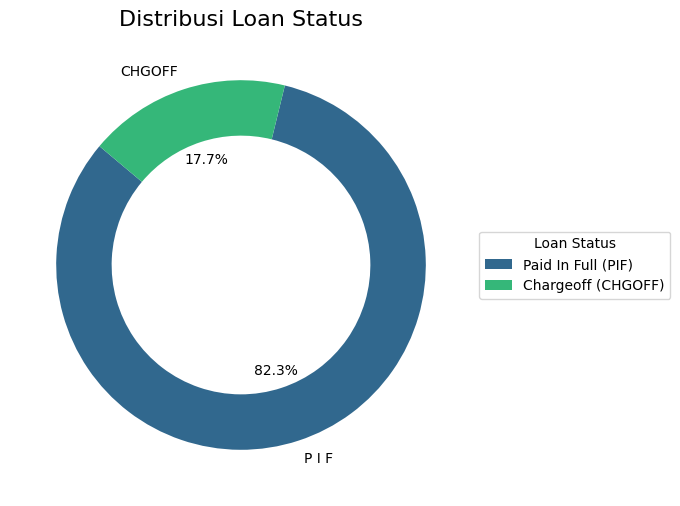

In [ ]:
status_counts = df_eda['MIS_Status'].value_counts()

plt.figure(figsize=(12, 6))
colors = sns.color_palette("viridis", len(status_counts))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops=dict(width=0.3))
plt.title('Distribusi Loan Status', size=16)

# Adding legend
plt.legend(title='Loan Status', labels=['Paid In Full (PIF)', 'Chargeoff (CHGOFF)'], loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

## Lama Pinjaman (`Term`)

### Term terhadap MIS_Status

<ipython-input-155-2d5ff756d1e0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='MIS_Status', y='Term', data=df_eda, palette=['darkturquoise', 'salmon'])


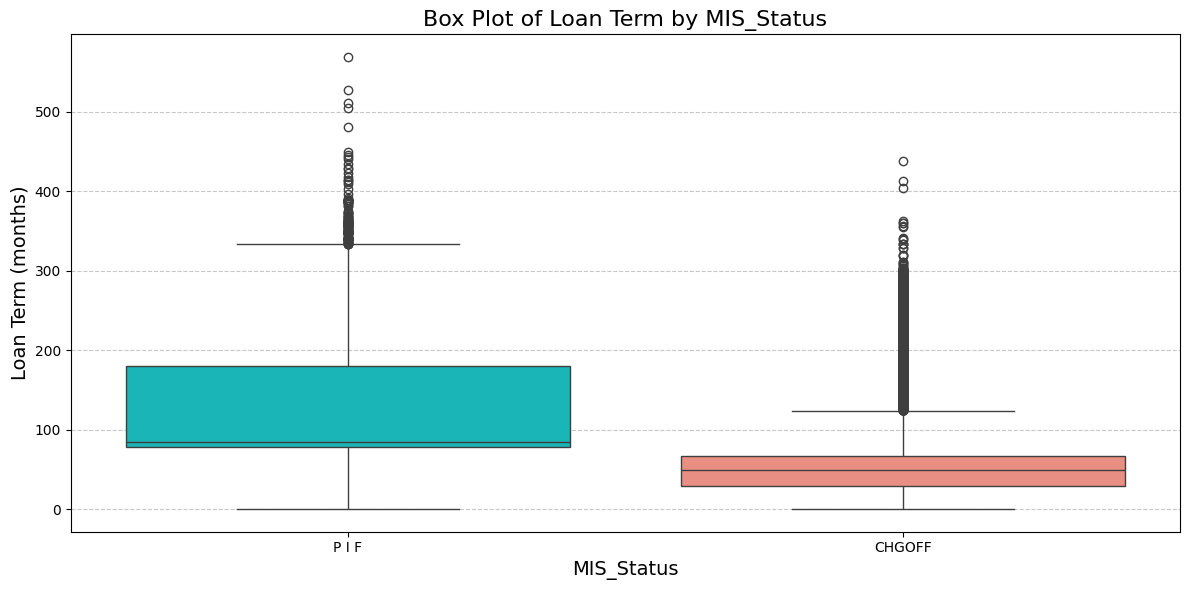

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='MIS_Status', y='Term', data=df_eda, palette=['darkturquoise', 'salmon'])
plt.title('Box Plot of Loan Term by MIS_Status', fontsize=16)
plt.xlabel('MIS_Status', fontsize=14)
plt.ylabel('Loan Term (months)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# # Buat binning (range 12)
# bins = range(0, int(df_eda['Term'].max()) + 12, 12)
# labels = [f'{i}-{i+11}' for i in bins[:-1]]
# df_eda['Term_binning'] = pd.cut(df_eda['Term'], bins=bins, labels=labels, include_lowest=True)

In [ ]:
# Binning up to 300
bins = range(0, 301, 12)
labels = [f'{i}-{i+11}' for i in bins[:-1]]
df_eda['Term_binning_1to300'] = pd.cut(df_eda['Term'], bins=bins, labels=labels, include_lowest=True)

In [ ]:
# Binning 300 ke atas
bins = range(300, int(df_eda['Term'].max()) + 12, 12)
labels = [f'{i}-{i+11}' for i in bins[:-1]]
df_eda['Term_binning_300up'] = pd.cut(df_eda['Term'], bins=bins, labels=labels, include_lowest=True)

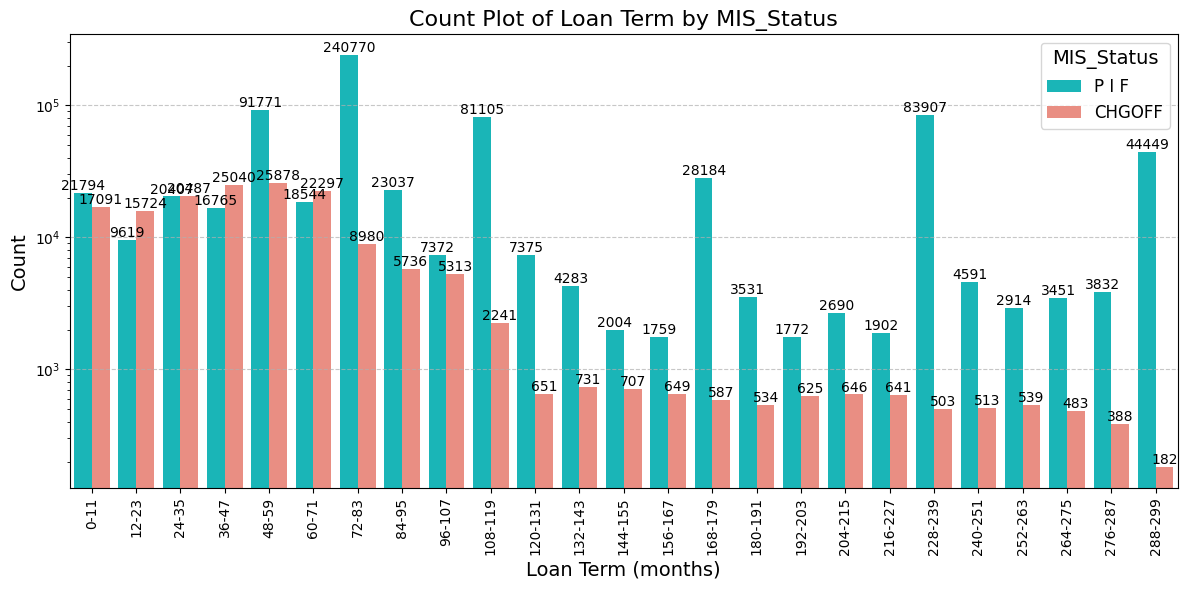

In [ ]:
df_filtered = df_eda[df_eda['Term'] <= 300]

plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Term_binning_1to300', hue='MIS_Status', data=df_filtered, palette=['darkturquoise', 'salmon'])
plt.title('Count Plot of Loan Term by MIS_Status', fontsize=16)
plt.xlabel('Loan Term (months)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.yscale('log')  # Set y-axis to log scale
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.legend(title='MIS_Status', fontsize=12, title_fontsize=14)
plt.tight_layout()
plt.show()

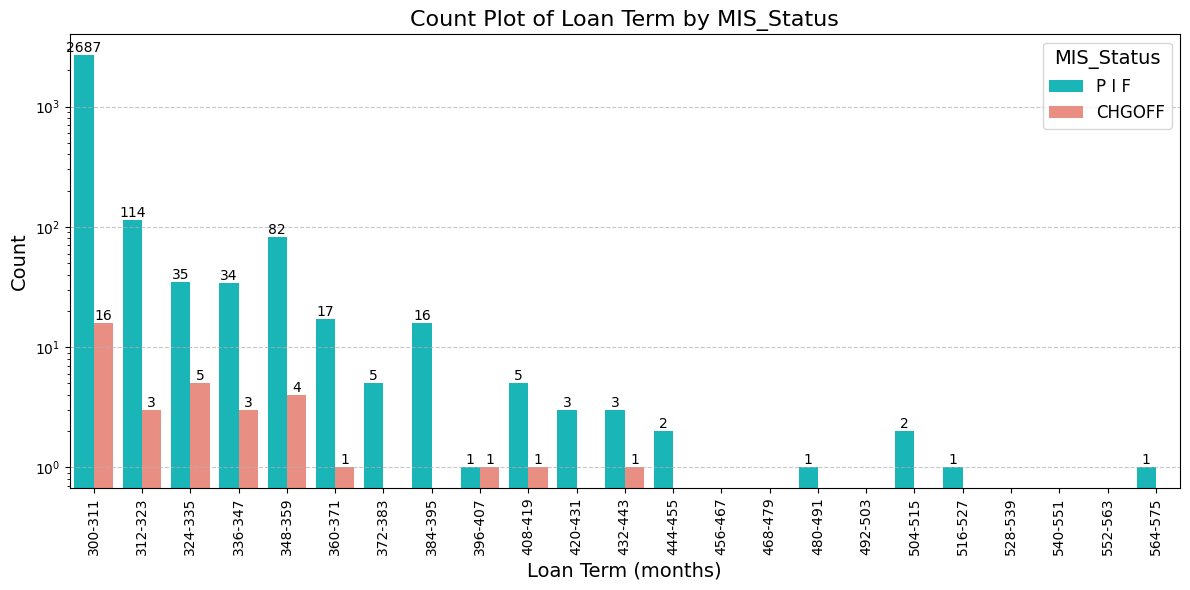

In [ ]:
df_filtered = df_eda[df_eda['Term'] > 300]

plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Term_binning_300up', hue='MIS_Status', data=df_filtered, palette=['darkturquoise', 'salmon'])
plt.title('Count Plot of Loan Term by MIS_Status', fontsize=16)
plt.xlabel('Loan Term (months)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.yscale('log')  # Set y-axis to log scale
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding annotations
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.legend(title='MIS_Status', fontsize=12, title_fontsize=14)
plt.tight_layout()
plt.show()

Observations:
- Term pinjaman 48 - 59 dan 72 - 83 bulan memiliki jumlah pinjaman yang sangat tinggi.
- Pada seluruh interval `Term`, jumlah pinjaman yang "Paid in Full" hampir selalu lebih tinggi dibandingkan dengan "Charged Off".
- Jumlah pinjaman dengan `Term` lebih dari 300 bulan sangat sedikit. Mayoritas ada di 300 - 311.
- Pinjaman dengan `Term` yang sangat panjang (lebih dari 300 bulan) juga cenderung lebih sering "Paid in Full" dibandingkan "Charged Off".

### Term per Industry Sector

## Pinjaman berdasarkan Tahun (ApprovalDate Year)

### Frekuensi Pinjaman (Total)

<ipython-input-161-a371d7b5f8a9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=loan_freq_counts, x='approval_date_year', y='Frequency', palette='viridis')


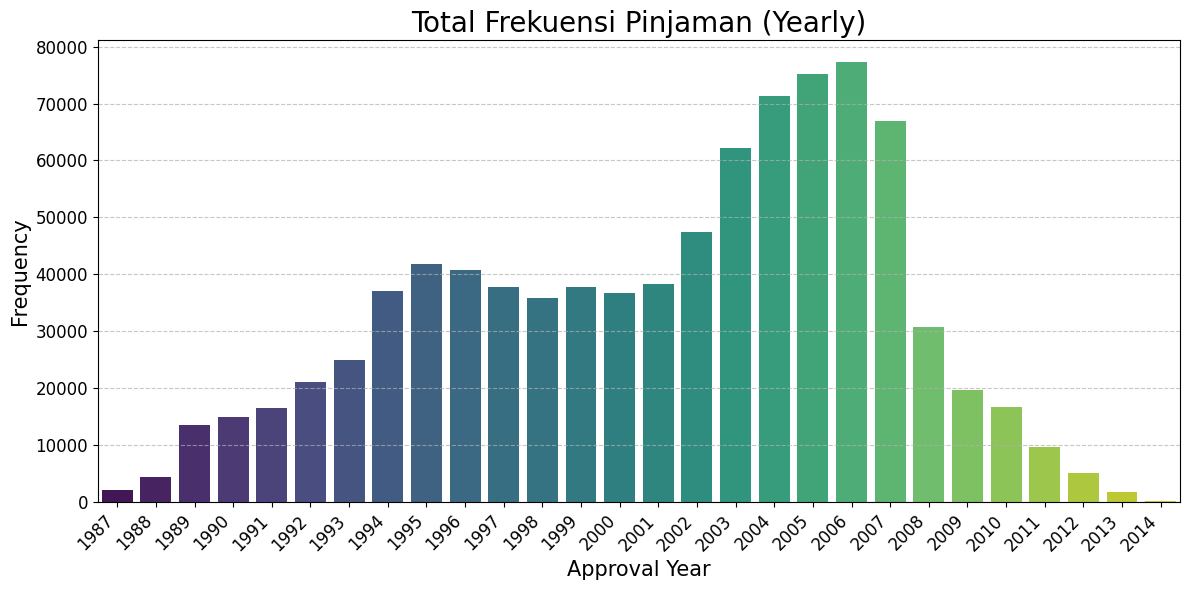

In [ ]:
loan_freq_counts = df_eda.groupby('approval_date_year').size().reset_index(name='Frequency')

plt.figure(figsize=(12, 6))
sns.barplot(data=loan_freq_counts, x='approval_date_year', y='Frequency', palette='viridis')

plt.title('Total Frekuensi Pinjaman (Yearly)', fontsize=20)
plt.xlabel('Approval Year', fontsize=15)
plt.ylabel('Frequency', fontsize=15)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

### Frekuensi Pinjaman (Berdasarkan MIS Status)

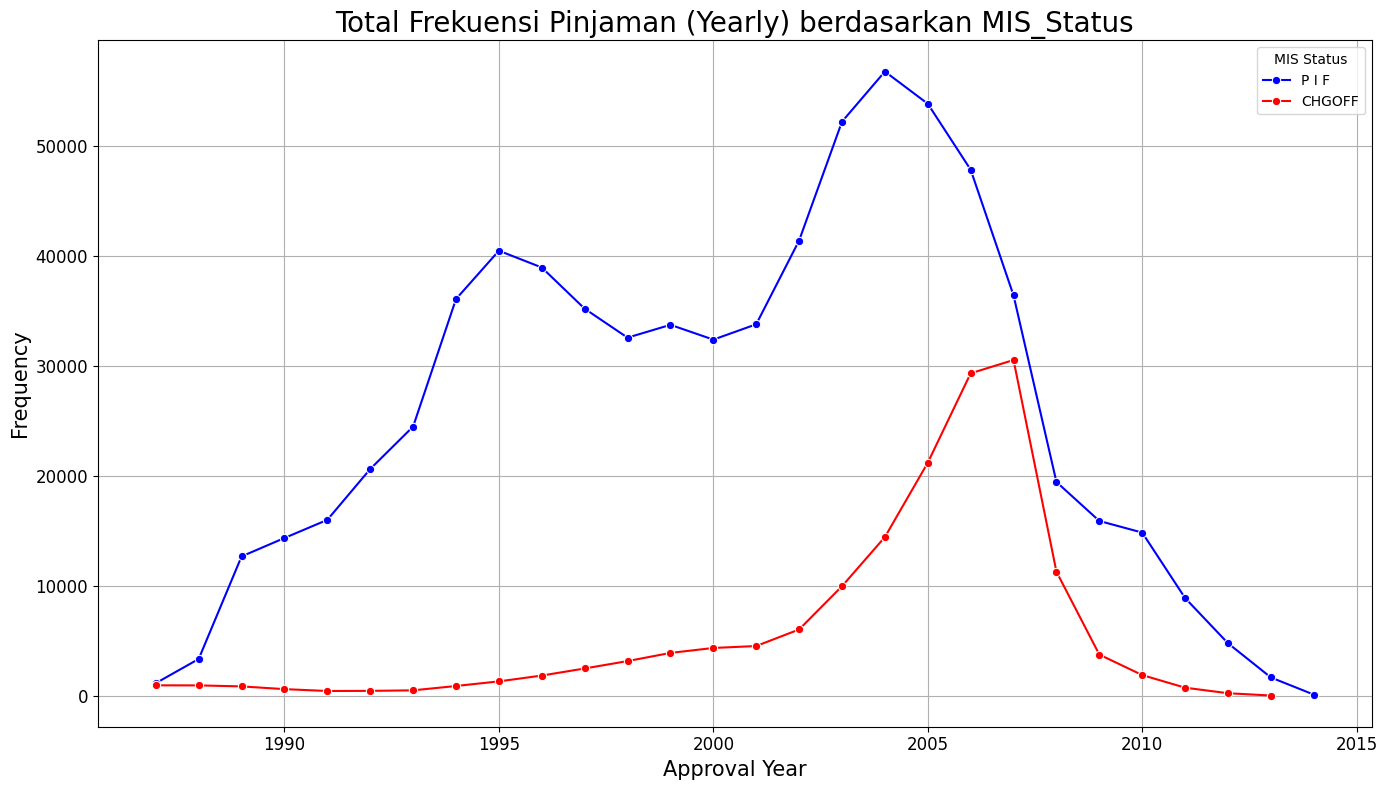

In [ ]:
df_pif = df_eda[df_eda['MIS_Status'] == 'P I F']
df_chgoff = df_eda[df_eda['MIS_Status'] == 'CHGOFF']

loan_counts_pif = df_eda[df_eda['MIS_Status'] == 'P I F'].groupby('approval_date_year').size().reset_index(name='Frequency')
loan_counts_chgoff = df_chgoff.groupby('approval_date_year').size().reset_index(name='Frequency')

# Membuat grafik
plt.figure(figsize=(14, 8))

# Garis untuk P I F
sns.lineplot(data=loan_counts_pif, x='approval_date_year', y='Frequency', marker='o', label='P I F', color='blue')

# Garis untuk CHGOFF
sns.lineplot(data=loan_counts_chgoff, x='approval_date_year', y='Frequency', marker='o', label='CHGOFF', color='red')

plt.title('Total Frekuensi Pinjaman (Yearly) berdasarkan MIS_Status', fontsize=20)
plt.xlabel('Approval Year', fontsize=15)
plt.ylabel('Frequency', fontsize=15)

plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='MIS Status')
plt.tight_layout()

plt.show()

In [ ]:
# loan_counts_per_year = df_eda.groupby('approval_date_year').size().reset_index(name='Frequency')

# plt.figure(figsize=(14, 8))
# sns.lineplot(data=loan_counts_per_year, x='approval_date_year', y='Frequency', marker='o')

# plt.title('Loan Approval Frequency by Year', fontsize=20)
# plt.xlabel('Approval Year', fontsize=15)
# plt.ylabel('Frequency', fontsize=15)

# plt.grid(True)
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
# plt.tight_layout()

# plt.show()

### Total Pinjaman or Total `DisbursementGross` ($)

<ipython-input-164-a879bf413268>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=loan_total_counts, x='approval_date_year', y='DisbursementGross', palette='viridis')


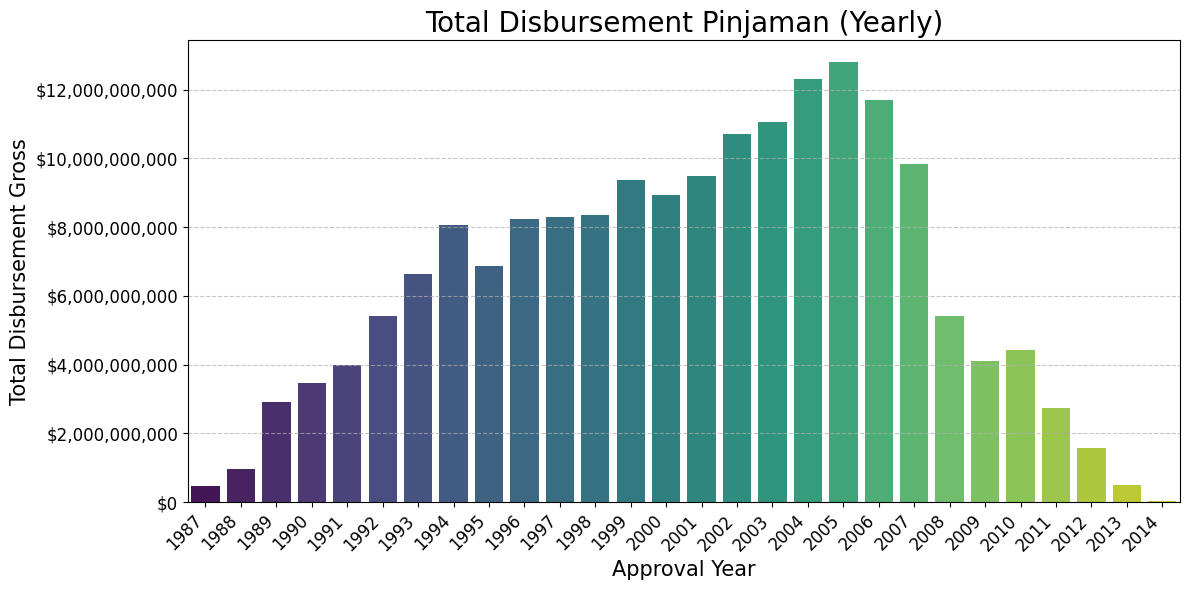

In [ ]:
loan_total_counts = df_eda.groupby('approval_date_year')['DisbursementGross'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=loan_total_counts, x='approval_date_year', y='DisbursementGross', palette='viridis')

plt.title('Total Disbursement Pinjaman (Yearly)', fontsize=20)
plt.xlabel('Approval Year', fontsize=15)
plt.ylabel('Total Disbursement Gross', fontsize=15)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

def y_fmt(x, y):
    return f'${x:,.0f}'

plt.gca().yaxis.set_major_formatter(FuncFormatter(y_fmt))

plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

### Observations

- Terlihat bahwa: baik dari total frekuensi pinjaman (keseluruhan, P I F, dan CHGOFF) dan total disbursement yang disetujui meningkat dari tahun 1987 hingga mencapai tahun 2006, dan setelah itu mengalami penurunan sampai tahun 2014 (tahun terakhir data direkap).
- Periode tahun 1987 hingga tahun 2006 menunjukkan peningkatan yang stabil dalam jumlah pinjaman dan total disbursement. Hal tersebut menunjukkan bahwa ekonomi pada periode tersebut relatif stabil dan mengalami peningkatan.
- Penurunan tajam baik dari total frekuensi pinjaman dan total disbursement mungkin adalah pengaruh dari krisis keuangan global tahun 2008. Saat itu karena banyaknya pinjaman yang gagal bayar, maka **bank & lembaga keuangan (termasuk SBA) memperketat standar pemberian kredit** mereka secara signifikan setelah krisis. Mereka menjadi lebih berhati-hati dalam memberikan pinjaman, baik kepada individu maupun bisnis, untuk mengurangi risiko gagal bayar. Sehingga **approval terhadap pinjaman pun menurun**.

Informasi:

Puncak krisis keuangan global terjadi pada tahun 2008. Krisis keuangan global (The Grate Recession) terjadi karena banyak bank & lembaga keuangan (termasuk SBA) memberikan banyak pinjaman ke peminjam yang berisiko tinggi dan kredit buruk. Pinjaman ini sering kali disertai dengan suku bunga yang lebih tinggi, sehingga peminjam lebih tidak bisa membayar. (Sumber: https://www.wallstreetmojo.com/2008-financial-crisis/)

### Business Recommendations:

1. SBA harus tetap waspada terhadap perubahan kondisi ekonomi makro yang dapat mempengaruhi kemampuan peminjam untuk membayar kembali pinjaman.
2. SBA harus dapat mengembangkan kebijakan kredit yang fleksibel dan harus adaptif terhadap perubahan ekonomi makro yang terjadi.
3. Berdasarkan Poin 2 di atas, model prediksi default yang nantinya akan dibuat adalah mengacu pada pola data masa lampau, sehingga tidak bijak untuk digunakan pada masa ekonomi makro yang bergejolak, dimana pola data bisa saja berubah karena gejolak ekonomi. Sehingga SBA dapat menggunakan model prediksi yang dibuat, namun harus tetap melihat situasi ekonomi makro saat ini.

## Pinjaman berdasarkan Industry Sector

In [ ]:
df_eda.columns

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'LowDoc',
       'DisbursementDate', 'DisbursementGross', 'BalanceGross', 'MIS_Status',
       'ChgOffPrinGr', 'GrAppv', 'SBA_Appv', 'IndSector', 'IndDefRate',
       'approval_date_year', 'approval_date_month',
       'approval_date_day_of_month', 'Franchise', 'NewBusiness',
       'IsCreatedJob', 'Term_binning_1to300', 'Term_binning_300up'],
      dtype='object')

In [ ]:
# default_rates = {
#     "Mining, quarrying, and oil and gas extraction": 8,
#     "Agriculture, forestry, fishing and hunting": 9,
#     "Management of companies and enterprises": 10,
#     "Health care and social assistance": 10,
#     "Utilities": 14,
#     "Public administration": 15,
#     "Professional, scientific, and technical services": 19,
#     "Wholesale trade": 19,
#     "Manufacturing": 19,
#     "Other services (except public administration)": 20,
#     "Arts, entertainment, and recreation": 21,
#     "Accommodation and food services": 22,
#     "Retail trade": 22,  # Diambil nilai pertama dari 22, 23
#     "Construction": 23,
#     "Administrative/support & waste management/remediation Service": 24,
#     "Educational services": 24,
#     "Information": 25,
#     "Transportation and warehousing": 27,  # Diambil nilai pertama dari 27, 23
#     "Finance and insurance": 28,
#     "Real estate and rental and leasing": 29,
#     "Unknown": 0  # Untuk sektor yang tidak diketahui
# }

In [ ]:
df_eda['IndSector'].value_counts()

IndSector
Unknown                                                                     190823
Retail Trade                                                                127251
Other Services (except Public Administration)                                72618
Professional, Scientific, and Technical Services                             68170
Manufacturing                                                                68029
Accommodation and Food Services                                              67600
Construction                                                                 66645
Health Care and Social Assistance                                            55366
Wholesale Trade                                                              48743
Administrative and Support and Waste Management and Remediation Services     32685
Transportation and Warehousing                                               22531
Arts, Entertainment, and Recreation                                          

In [ ]:
df_eda

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,IndSector,IndDefRate,approval_date_year,approval_date_month,approval_date_day_of_month,Franchise,NewBusiness,IsCreatedJob,Term_binning_1to300,Term_binning_300up
0,7212624008,DOWNTOWNE LAUNDRIE INC,MOUNT DORA,FL,32757,INNOVATIVE BANK,CA,812320,2004-02-25,2004,84,1,1,1,1,1,0,N,2004-02-29,10000,0,P I F,0,10000,8500,Other Services (except Public Administration),20,2004,2,25,0,0,1,72-83,NaN
1,4698604008,"MIDWEST POWDER COATERS, INC.",RICHFIELD,WI,53076,NATL EXCH BK & TR,WI,332812,2001-07-20,2001,28,8,1,0,0,1,2,Y,2001-09-30,83900,0,CHGOFF,74364,83900,71315,Manufacturing,14,2001,7,20,0,0,0,24-35,NaN
2,5189664000,SIDNEY CLEANERS & LAUNDRY,SIDNEY,MT,59270,STOCKMAN BANK OF MONTANA,MT,812320,2002-01-31,2002,144,6,1,0,6,1,2,N,2002-02-28,173300,0,P I F,0,173300,129975,Other Services (except Public Administration),20,2002,1,31,0,0,0,132-143,NaN
3,8341233003,"G.P. ENTERPRISES OF JAX, INC",ORANGE PARK,FL,32065,BANK OF AMERICA NATL ASSOC,NC,0,1995-05-16,1995,84,2,1,0,0,1,0,Y,1995-07-31,78000,0,P I F,0,78000,70200,Unknown,0,1995,5,16,0,0,0,72-83,NaN
4,1213056000,SUPERHIT SONO MUSIC,NEW YORK,NY,10467,JPMORGAN CHASE BANK NATL ASSOC,IL,423990,2006-03-01,2006,69,3,1,0,3,1,2,N,2006-04-30,73751,0,CHGOFF,47275,50000,25000,Wholesale Trade,19,2006,3,1,0,0,0,60-71,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888033,5473103008,OLYMPIC AUTO REPAIR,LAS VEGAS,NV,89102,BANK OF AMERICA NATL ASSOC,NC,811111,1993-01-22,1993,84,2,1,0,0,1,0,N,1993-04-30,50000,0,P I F,0,50000,45000,Other Services (except Public Administration),20,1993,1,22,0,0,0,72-83,NaN
888034,9196683006,"SANI-CAN, INC.",ROBSTOWN,TX,78380,FIRST COMM. BANK NATL ASSOC,TX,0,1996-04-16,1996,166,5,1,0,0,1,0,N,1996-09-30,270000,0,CHGOFF,213057,270000,202500,Unknown,0,1996,4,16,0,0,0,156-167,NaN
888035,9141304007,"GREMENCO HOLDINGS, LLC",LEAVENWORTH,KS,66048,U.S. BANK NATIONAL ASSOCIATION,OH,811121,2005-09-30,2005,120,29,2,27,2,1,1,N,2005-12-31,106200,0,P I F,0,106200,79650,Other Services (except Public Administration),20,2005,9,30,0,1,1,108-119,NaN
888036,7621664010,BANANA DOG WINES & SPIRITS LLC,EAST HADDAM,CT,6423,CAPITAL ONE NATL ASSOC,VA,424810,2004-07-19,2004,84,13,1,3,13,1,2,N,2005-02-28,50000,0,P I F,0,50000,25000,Wholesale Trade,19,2004,7,19,0,0,1,72-83,NaN


### Distribusi Frekuensi Pinjaman + Default Rate

<ipython-input-169-a0ff2f7a9354>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='IndSector', y='Count', data=sector_counts, palette='viridis')


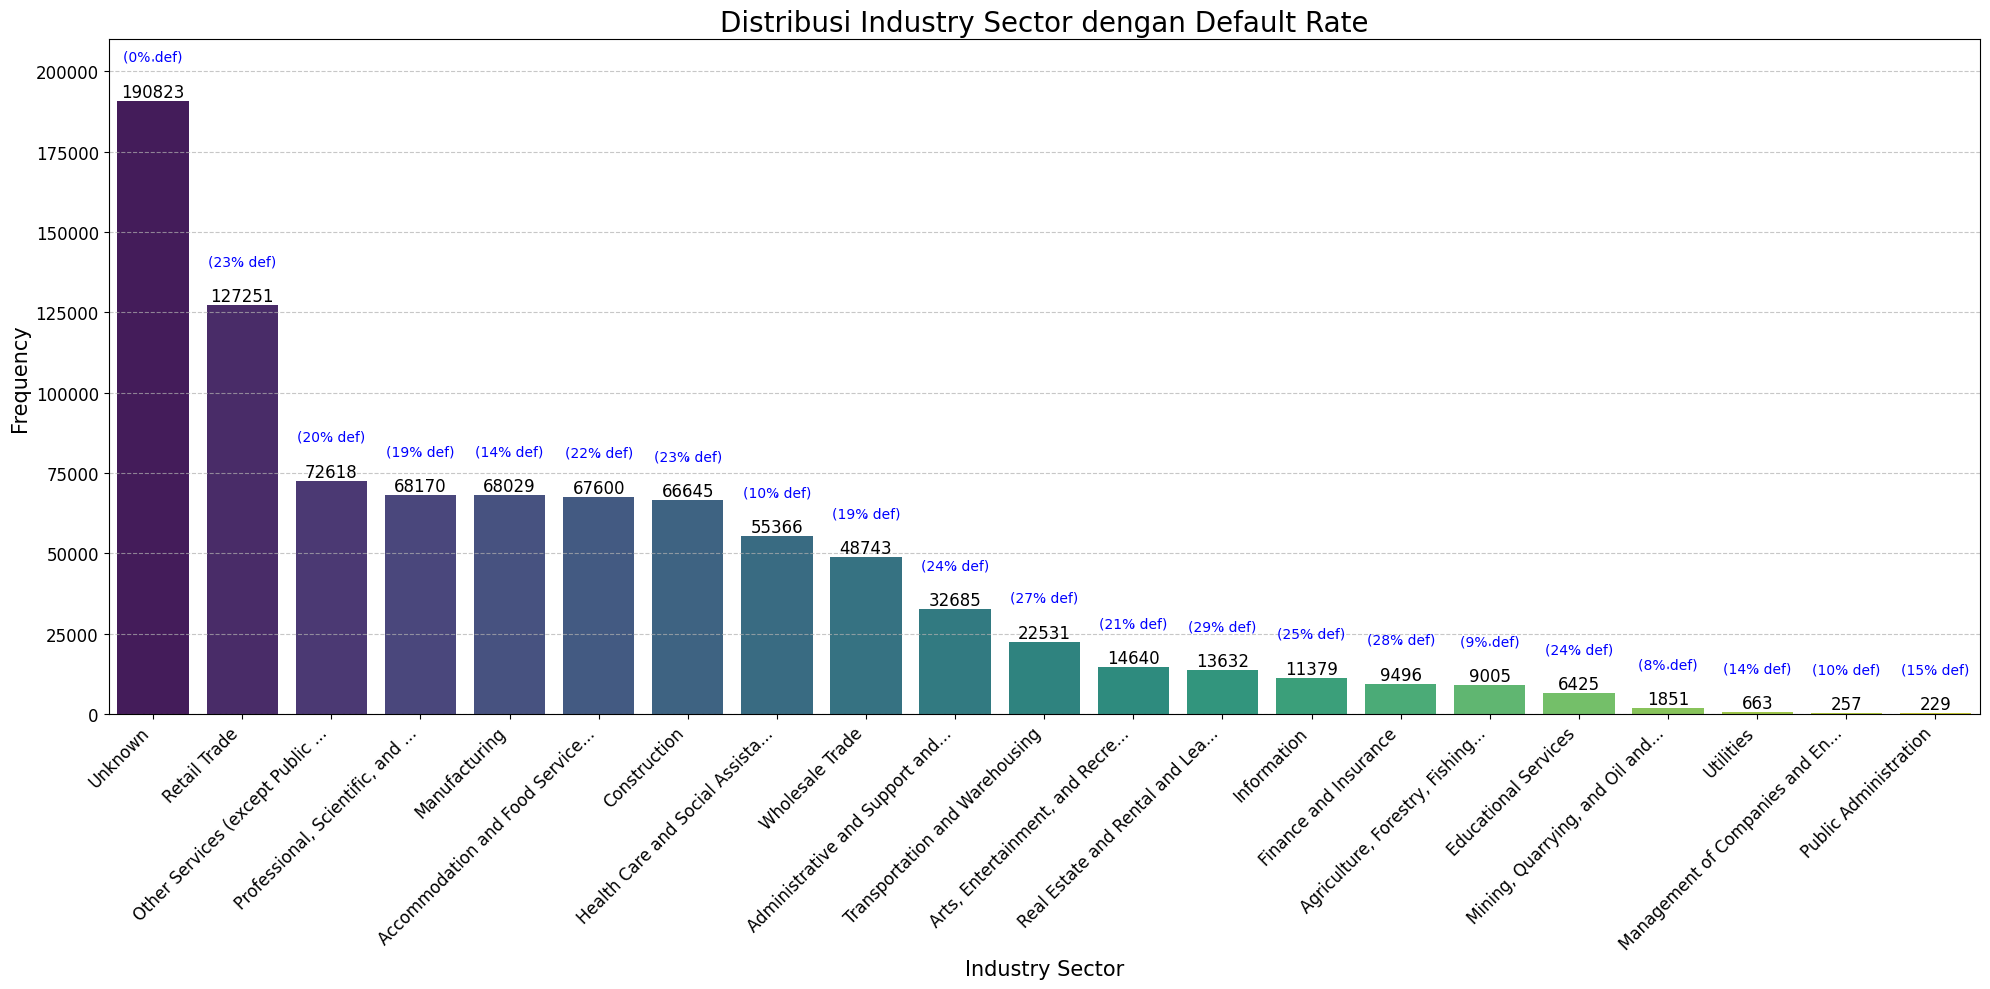

In [ ]:
sector_counts = df_eda.groupby('IndSector').agg({'LoanNr_ChkDgt': 'count', 'IndDefRate': 'first'}).reset_index() #IndDefRate ambil yang pertama (kalo ada lebih dari 1)
sector_counts.columns = ['IndSector', 'Count', 'IndDefRate']
sector_counts = sector_counts.sort_values(by='Count', ascending=False)

# Membatasi panjang label pada sumbu X (kalau tidak, terlalu panjang)
max_label_length = 30  # Panjang maksimum label
sector_counts['IndSector'] = sector_counts['IndSector'].apply(
    lambda x: x if len(x) <= max_label_length else x[:max_label_length] + '...'
)

plt.figure(figsize=(20, 10))
barplot = sns.barplot(x='IndSector', y='Count', data=sector_counts, palette='viridis')

plt.title('Distribusi Industry Sector dengan Default Rate', fontsize=20)
plt.xlabel('Industry Sector', fontsize=15)
plt.ylabel('Frequency', fontsize=15)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Menambahkan sumbu Y agar lebih tinggi (agar annotation "unknown" terlihat / tidak terpotong)
max_count = max(sector_counts['Count'])
plt.ylim(0, max_count * 1.1)  # Menambah 10% ruang di atas bar tertinggi

# Menambahkan anotasi nilai Count dan IndDefRate di atas setiap bar
for i, bar in enumerate(barplot.patches):
    # Mendapatkan posisi bar
    bar_height = bar.get_height()

    # Mendapatkan nilai Count dan IndDefRate
    count = sector_counts.iloc[i]['Count']
    ind_def_rate = sector_counts.iloc[i]['IndDefRate']

    # Menambahkan anotasi Count di atas bar
    barplot.annotate(f'{count}',
                     (bar.get_x() + bar.get_width() / 2, bar_height),
                     ha='center', va='bottom',
                     fontsize=12, color='black')

    # Menambahkan anotasi IndDefRate di atas bar (dengan garis bantu untuk menghindari tumpang tindih)
    barplot.annotate(f'({ind_def_rate}% def)',
                     (bar.get_x() + bar.get_width() / 2, bar_height + 0.06 * max(sector_counts['Count'])),
                     ha='center', va='bottom',
                     fontsize=10, color='blue',
                     arrowprops=dict(arrowstyle='-', color='blue'))

plt.show()

In [ ]:
# Jumlah NAICS yang 0 / Unknown
df_eda[df_eda['NAICS'] == 0].shape[0]

190823

Industry Sector dan Default Ratenya (In descending order):

In [ ]:
sector_counts_sorted = sector_counts[['IndSector', 'IndDefRate']].sort_values(by='IndDefRate', ascending=False).reset_index(drop=True)

In [ ]:
sector_counts_sorted

,IndSector,IndDefRate
0,Real Estate and Rental and Lea...,29
1,Finance and Insurance,28
2,Transportation and Warehousing,27
3,Information,25
4,Educational Services,24
5,Administrative and Support and...,24
6,Construction,23
7,Retail Trade,23
8,Accommodation and Food Service...,22
9,"Arts, Entertainment, and Recre...",21


Observations:
1. `Unknown` kategori dengan jumlah peminjaman tertinggi. Hal ini menunjukkan jika data dalam kategori ini tidak lengkap. Ini disebabkan karena kolom NAICS yang digunakan untuk mengklasifikasi Industry Sector banyak yang bernilai 0.
2. `Retail Trade` merupakan kategori dengan jumlah peminjaman kedua tertinggi setelah `Unknown`. Dan bisa jadi ini merupakan yang tertinggi (belum bisa dipastikan), karena `Unknown` bisa jadi merupakan gabungan dari beberapa industri yang tidak teridentifikasi. Namun ini masih tidak pasti karena tidak bisa dibuktikan secara data.
3. Sektor dengan tingkat default tertinggi adalah:
- `Real Estate and Rental and Leasing` = 29% default rate
- `Finance and Insurance` = 28% default rate
- `Transportation and Warehousing` = 27% default rate

4. Sektor dengan tingkat default terendah adalah:
- `Mining, Quarrying, and Oil and Gas Extraction` = 8% default rate
- `Agriculture, Forestry, Fishing and Hunting` = 9% default rate
- `Management of Companies and Enterprises` = 10% default rate

5.

## Lapangan kerja yang dibuka (`CreateJob`)

### Jumlah lapangan berdasarkan Tahun

**Growth total lapangan kerja dari tahun ke tahun**

<ipython-input-279-56678f4307a1>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




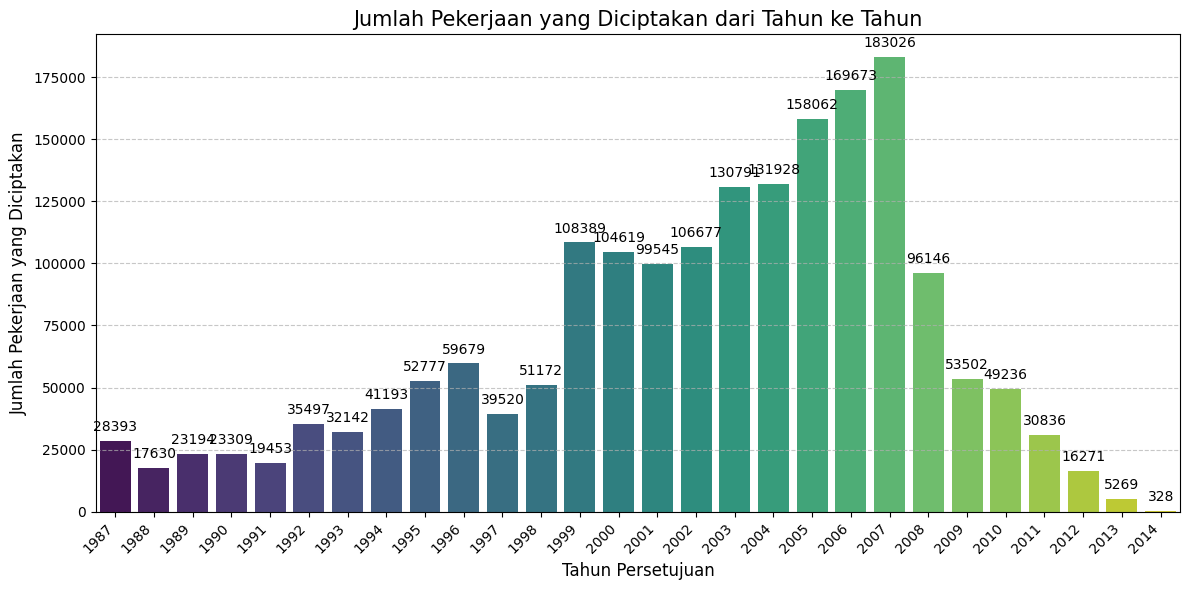

In [ ]:
jobs_per_year = df_eda.groupby('approval_date_year')['CreateJob'].sum().reset_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='approval_date_year', y='CreateJob', data=jobs_per_year, palette='viridis')

plt.title('Jumlah Pekerjaan yang Diciptakan dari Tahun ke Tahun', fontsize=15)
plt.xlabel('Tahun Persetujuan', fontsize=12)
plt.ylabel('Jumlah Pekerjaan yang Diciptakan', fontsize=12)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

**Perbandingan antara jumlah perusahaan yang membuka lapangan kerja vs tidak dari tahun ke tahun**

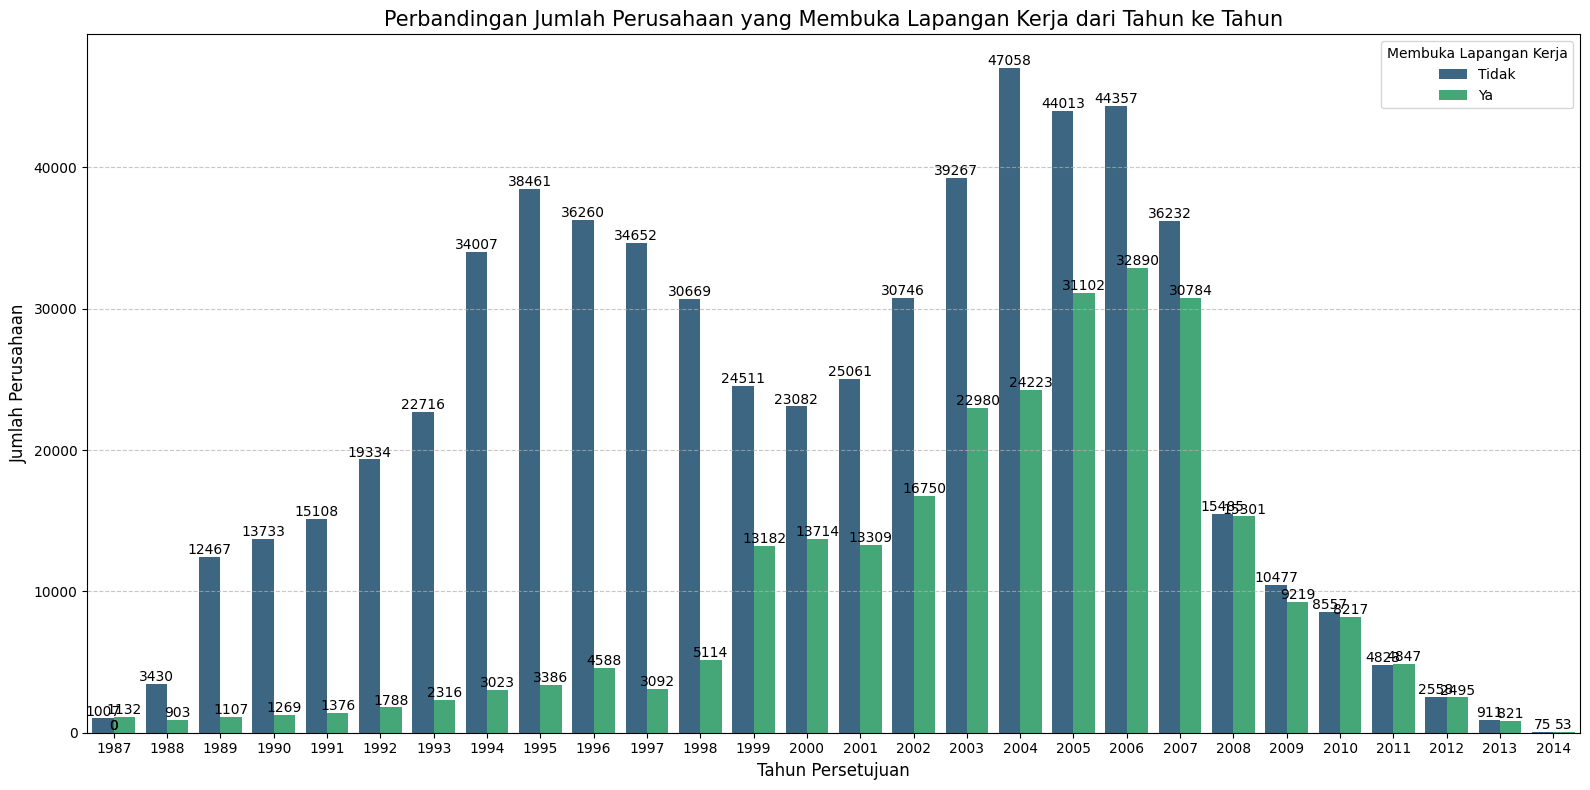

In [ ]:
jobs_by_year = df_eda.groupby(['approval_date_year', 'IsCreatedJob']).size().reset_index(name='Count')

plt.figure(figsize=(16, 8))
ax = sns.barplot(x='approval_date_year', y='Count', hue='IsCreatedJob', data=jobs_by_year, palette='viridis')

plt.title('Perbandingan Jumlah Perusahaan yang Membuka Lapangan Kerja dari Tahun ke Tahun', fontsize=15)
plt.xlabel('Tahun Persetujuan', fontsize=12)
plt.ylabel('Jumlah Perusahaan', fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Tidak', 'Ya'], title='Membuka Lapangan Kerja', loc='upper right')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

In [ ]:
jobs_by_year_table = df_eda.groupby(['approval_date_year', 'IsCreatedJob']).size().unstack(level=1, fill_value=0)

jobs_by_year_table = jobs_by_year_table.T

max_label_length = 30  # Panjang maksimum label
jobs_by_year_table.columns = jobs_by_year_table.columns.map(
    lambda x: str(x) if len(str(x)) <= max_label_length else str(x)[:max_label_length] + '...'
)

# Highlight nilai max dan min
styled_table = jobs_by_year_table.style.highlight_max(color='darkturquoise', axis=1).highlight_min(color='salmon', axis=1)

styled_table

approval_date_year,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
IsCreatedJob,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1007,3430,12467,13733,15108,19334,22716,34007,38461,36260,34652,30669,24511,23082,25061,30746,39267,47058,44013,44357,36232,15485,10477,8557,4823,2558,911,75
1,1132,903,1107,1269,1376,1788,2316,3023,3386,4588,3092,5114,13182,13714,13309,16750,22980,24223,31102,32890,30784,15301,9219,8217,4847,2495,821,53


### Jumlah lapangan kerja berdasarkan Tahun per Industry Sector

**Total lapangan kerja yang dibuka per Industry Sector**

<ipython-input-284-f262a827ba63>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




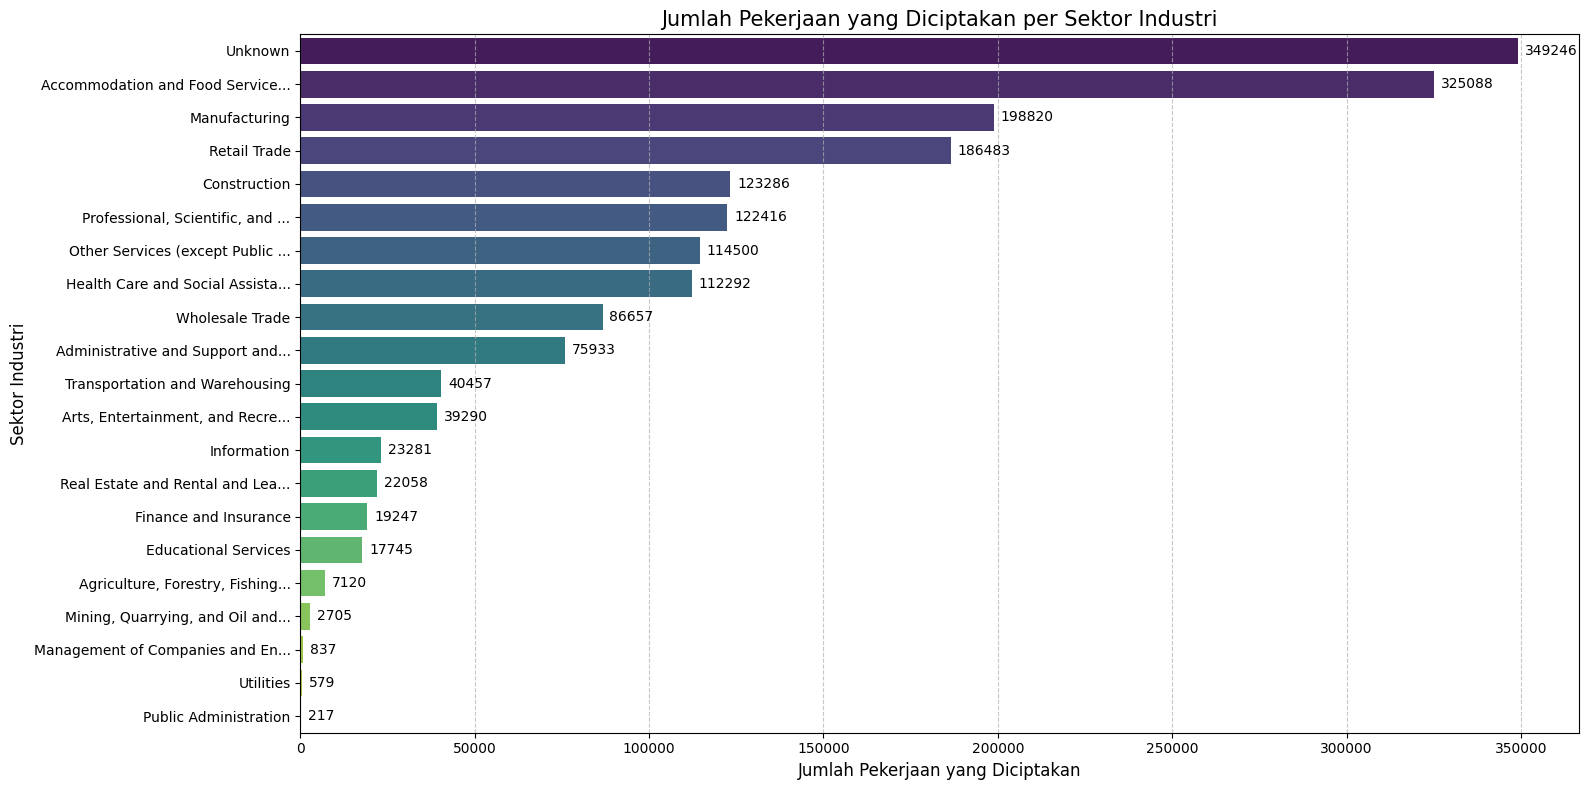

In [ ]:
jobs_per_sector = df_eda.groupby('IndSector')['CreateJob'].sum().reset_index()

# Mengurutkan berdasarkan jumlah pekerjaan yang diciptakan
jobs_per_sector = jobs_per_sector.sort_values(by='CreateJob', ascending=False)

max_label_length = 30  # Panjang maksimum label
jobs_per_sector['IndSector'] = jobs_per_sector['IndSector'].apply(
    lambda x: x if len(x) <= max_label_length else x[:max_label_length] + '...'
)

plt.figure(figsize=(16, 8))
ax = sns.barplot(x='CreateJob', y='IndSector', data=jobs_per_sector, palette='viridis')

plt.title('Jumlah Pekerjaan yang Diciptakan per Sektor Industri', fontsize=15)
plt.xlabel('Jumlah Pekerjaan yang Diciptakan', fontsize=12)
plt.ylabel('Sektor Industri', fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{int(width)}', (width, p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=10, color='black', xytext=(5, 0),
                textcoords='offset points')

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

**Jumlah perusahaan yang membuka lapangan kerja vs tidak per Industry Sector**

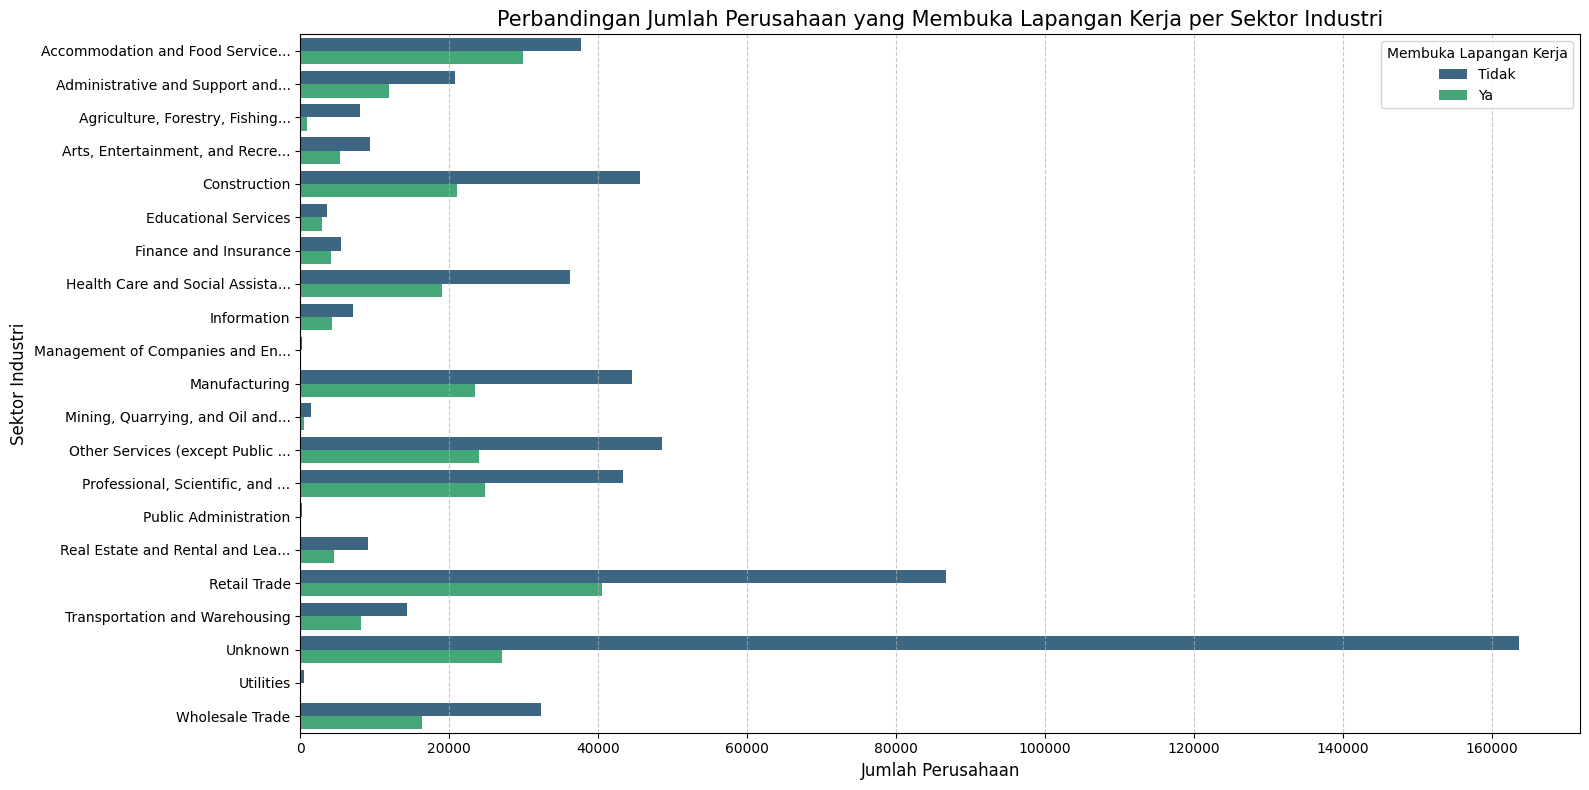

In [ ]:
jobs_by_sector = df_eda.groupby(['IndSector', 'IsCreatedJob']).size().reset_index(name='Count')

max_label_length = 30  # Panjang maksimum label
jobs_by_sector['IndSector'] = jobs_by_sector['IndSector'].apply(
    lambda x: x if len(x) <= max_label_length else x[:max_label_length] + '...'
)

plt.figure(figsize=(16, 8))
ax = sns.barplot(x='Count', y='IndSector', hue='IsCreatedJob', data=jobs_by_sector, palette='viridis')

plt.title('Perbandingan Jumlah Perusahaan yang Membuka Lapangan Kerja per Sektor Industri', fontsize=15)
plt.xlabel('Jumlah Perusahaan', fontsize=12)
plt.ylabel('Sektor Industri', fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Tidak', 'Ya'], title='Membuka Lapangan Kerja', loc='upper right')

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

In [ ]:
jobs_by_sector_table = df_eda.groupby(['IndSector', 'IsCreatedJob']).size().unstack(level=1, fill_value=0)

# Menyederhanakan label yang terlalu panjang
max_label_length = 30  # Panjang maksimum label
jobs_by_sector_table.index = jobs_by_sector_table.index.map(
    lambda x: x if len(x) <= max_label_length else x[:max_label_length] + '...'
)

# Menampilkan tabel dengan highlight untuk nilai maksimum dan minimum
styled_table = jobs_by_sector_table.style.highlight_max(color='darkturquoise').highlight_min(color='salmon')

# Menampilkan tabel
styled_table

IsCreatedJob,0,1
IndSector,,
Accommodation and Food Service...,37727,29873
Administrative and Support and...,20767,11918
"Agriculture, Forestry, Fishing...",8058,947
"Arts, Entertainment, and Recre...",9366,5274
Construction,45643,21002
Educational Services,3574,2851
Finance and Insurance,5436,4060
Health Care and Social Assista...,36285,19081
Information,7076,4303


## Resiko Default berdasarkan Jumlah Karyawan (`NoEmp`)

## Resiko Default berdasarkan `NewBusiness`

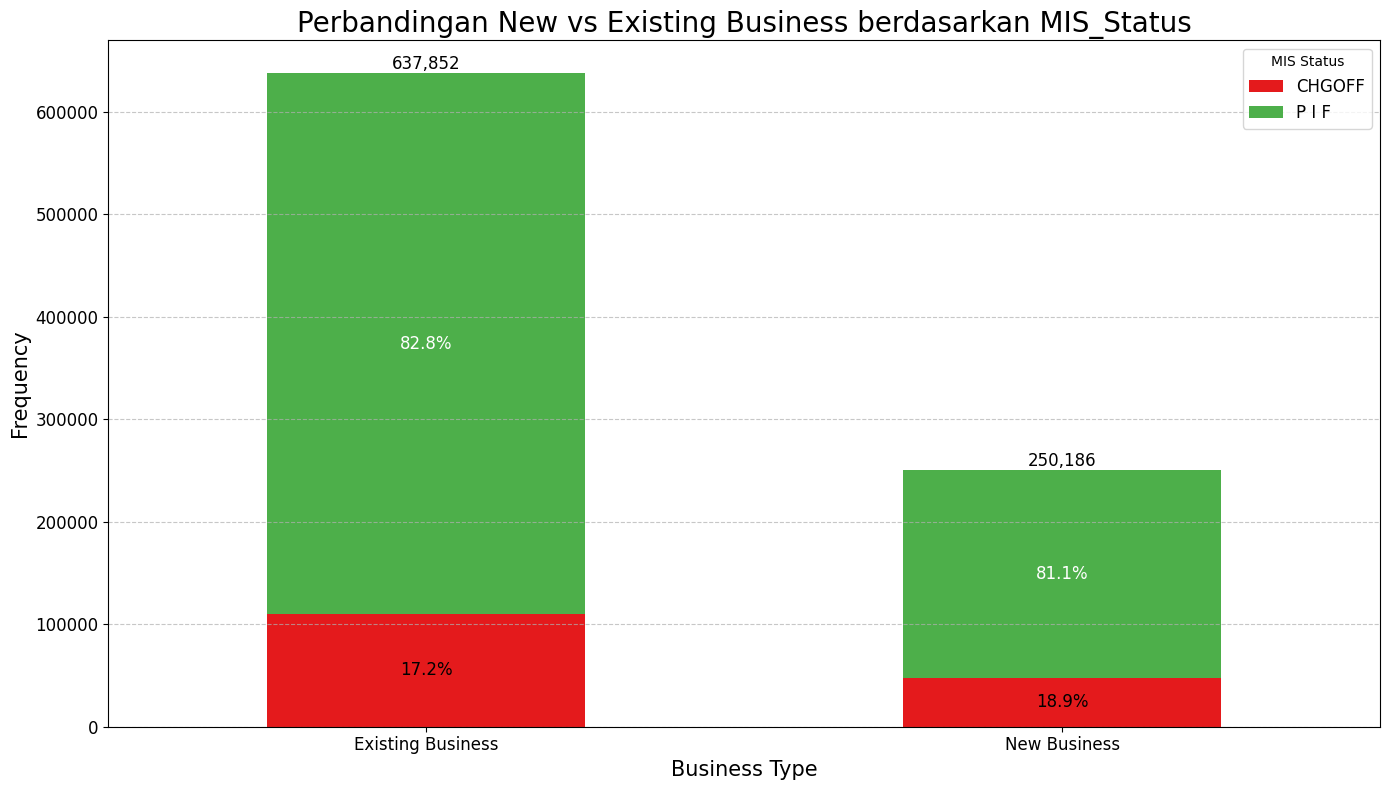

In [ ]:
# Menghitung frekuensi setiap kombinasi NewExist dan MIS_Status
new_exist_mis_counts = df_eda.groupby(['NewBusiness', 'MIS_Status']).size().reset_index(name='Count')

# Menghitung total per 'NewBusiness'
total_counts = df_eda.groupby('NewBusiness')['MIS_Status'].count().reset_index(name='Total')

# Menggabungkan dataframe untuk menghitung persentase
new_exist_mis_counts = new_exist_mis_counts.merge(total_counts, on='NewBusiness')
new_exist_mis_counts['Percentage'] = (new_exist_mis_counts['Count'] / new_exist_mis_counts['Total']) * 100

# 0 = Existing Business, 1 = New Business. Kita replace agar visualisasi lebih mudah
new_exist_mis_counts['NewBusiness'] = new_exist_mis_counts['NewBusiness'].replace({0: 'Existing Business', 1: 'New Business'})

# Pivot data untuk stacked bar chart
pivot_df = new_exist_mis_counts.pivot(index='NewBusiness', columns='MIS_Status', values='Count')
pivot_df_percentage = new_exist_mis_counts.pivot(index='NewBusiness', columns='MIS_Status', values='Percentage')

# Membuat stacked bar chart dengan warna yang lebih kontras
colors = ['#e41a1c', '#4daf4a']
pivot_df.plot(kind='bar', stacked=True, figsize=(14, 8), color=colors)

# Menambahkan anotasi persentase di atas setiap bar
for i, (index, row) in enumerate(pivot_df.iterrows()):
    total = row.sum()
    cum_sum = 0
    for col in pivot_df.columns:
        count = row[col]
        percentage = pivot_df_percentage.loc[index, col]
        # Mengatur warna anotasi berdasarkan kecerahan background
        text_color = 'white' if count > total * 0.2 else 'black'
        plt.text(i, cum_sum + count / 2, f'{percentage:.1f}%', ha='center', va='center', color=text_color, fontsize=12)
        cum_sum += count
    # Menambahkan annotation total frequency di atas bar chartnya
    plt.text(i, cum_sum, f'{total:,}', ha='center', va='bottom', color='black', fontsize=12)

plt.title('Perbandingan New vs Existing Business berdasarkan MIS_Status', fontsize=20)
plt.xlabel('Business Type', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='MIS Status', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

## Resiko Default berdasarkan `UrbanRural`

In [ ]:
df_eda['UrbanRural'].value_counts()

UrbanRural
1    470654
0    312041
2    105343
Name: count, dtype: int64

In [ ]:
# # UNUSEDDDD
# zip_counts = df_eda['State'].value_counts().reset_index()
# zip_counts.columns = ['State', 'Count']

# plt.figure(figsize=(12, 6))
# sns.barplot(x='State', y='Count', data=zip_counts, palette='viridis')

# plt.title('Distribution of State', fontsize=15)
# plt.xlabel('State Code', fontsize=12)
# plt.ylabel('Frequency', fontsize=12)

# plt.xticks(rotation=45, ha='right', fontsize=10)
# plt.yticks(fontsize=10)

# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.tight_layout()

# plt.show()

In [ ]:
# df_eda['IndDefRate'].value_counts()

# Drop unused columns

In [ ]:
df_train.head(3)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,IndSector,IndDefRate,approval_date_year,approval_date_month,approval_date_day_of_month,Franchise,NewBusiness,IsCreatedJob
695016,7212624008,DOWNTOWNE LAUNDRIE INC,MOUNT DORA,FL,32757,INNOVATIVE BANK,CA,812320,2004-02-25,2004,84,1,1,1,1,1,0,N,2004-02-29,10000,0,P I F,0,10000,8500,Other Services (except Public Administration),20,2004,2,25,0,0,1
488153,4698604008,"MIDWEST POWDER COATERS, INC.",RICHFIELD,WI,53076,NATL EXCH BK & TR,WI,332812,2001-07-20,2001,28,8,1,0,0,1,2,Y,2001-09-30,83900,0,CHGOFF,74364,83900,71315,Manufacturing,14,2001,7,20,0,0,0
532245,5189664000,SIDNEY CLEANERS & LAUNDRY,SIDNEY,MT,59270,STOCKMAN BANK OF MONTANA,MT,812320,2002-01-31,2002,144,6,1,0,6,1,2,N,2002-02-28,173300,0,P I F,0,173300,129975,Other Services (except Public Administration),20,2002,1,31,0,0,0


**Drop `LoanNr_ChkDgt`**

`LoanNr_ChkDgt` di sini tidak memberikan pola untuk prediksi apapun, karena hanya berisi informasi kode peminjaman.

In [ ]:
df_train = df_train.drop(columns=['LoanNr_ChkDgt'])
df_test = df_test.drop(columns=['LoanNr_ChkDgt'])

**Drop `Name`**

`Name` di sini tidak memberikan pola untuk prediksi apapun, karena hanya berisi informasi nama / institusi peminjam

In [ ]:
df_train = df_train.drop(columns=['Name'])
df_test = df_test.drop(columns=['Name'])

**Drop `City`**

Di sini, `City` memiliki unique values yang sangat banyak, dan akan sulit untuk dilakukan encoding. Dan juga sebetulnya informasi dari `City` berkorelasi dengan `Zip`. Karena logikanya kode postal itu sudah merepresentasikan kota. Di sini saya memutuskan untuk drop `City` sebagai predictor

In [ ]:
# Jumlah unique vals yang tidak terlihat (karena terlalu banyak) di atas kita buka lagi
print(f'Unique Values City:', len(df_train['City'].unique()))

Unique Values City: 28091


In [ ]:
df_train = df_train.drop(columns=['City'])
df_test = df_test.drop(columns=['City'])

**Drop `Bank`**

`Bank` di sini adalah nama bank yang memberikan dana. Isinya terdiri dari > 5000 unique values, dan `Bank` bukan merupakan predictor yang baik untuk menentukan default atau tidaknya. Kita akan drop

In [ ]:
# Jumlah unique vals yang tidak terlihat (karena terlalu banyak) di atas kita buka lagi
print(f'Unique Values Bank:', len(df_train['Bank'].unique()))

Unique Values Bank: 5277


In [ ]:
df_train = df_train.drop(columns=['Bank'])
df_test = df_test.drop(columns=['Bank'])

**Drop `BankState`**

Sama seperti `Bank` name, `BankState` bukan merupakan predictor yang baik untuk menentukan default atau tidaknya. Kita akan drop

In [ ]:
df_train = df_train.drop(columns=['BankState'])
df_test = df_test.drop(columns=['BankState'])

**Drop `NAICS`**

Kolom `NAICS` sudah kita gunakan untuk membentuk kolom `IndSec` dan `IndDefRate`, dan sekarang statusnya sebetulnya sudah tergantikan dan tidak berguna. Kita akan drop

In [ ]:
df_train = df_train.drop(columns=['NAICS'])
df_test = df_test.drop(columns=['NAICS'])

**Drop `ApprovalDate`**

Tanggal persetujuan pinjaman diberikan tidak akan menjadi predictor yang baik sebagai penentu default atau tidaknya pinjaman.

In [ ]:
df_train = df_train.drop(columns=['ApprovalDate', 'approval_date_year', 'approval_date_month', 'approval_date_day_of_month'])
df_test = df_test.drop(columns=['ApprovalDate', 'approval_date_year', 'approval_date_month', 'approval_date_day_of_month'])

**Drop `ApprovalFY`**

Tahun fiskal persetujuan pinjaman diberikan sebetulnya pun sama dengan `ApprovalDate`, namun versi tahun. Di sini kita tidak akan menggunakan `ApprovalFY` sebagai predictor.

In [ ]:
df_train = df_train.drop(columns=['ApprovalFY'])
df_test = df_test.drop(columns=['ApprovalFY'])

**Drop `FranchiseCode`**

Karena pada Feature Engineering kita sudah membentuk kolom `Franchise` sebagai indikator Franchise atau bukan, kita buang kolom `FranchiseCode`

In [ ]:
df_train = df_train.drop(columns=['FranchiseCode'])
df_test = df_test.drop(columns=['FranchiseCode'])

**Drop `NewExist`**

Karena pada Feature Engineering kita sudah membentuk kolom `NewBusiness` sebagai indikator bisnis baru atau bukan, kita buang kolom `NewExist`

In [ ]:
df_train = df_train.drop(columns=['NewExist'])
df_test = df_test.drop(columns=['NewExist'])

**Drop `DisbursementDate`**

`DisbursementDate` kita drop karena hanya berisi informasi mengenai tanggal pencarian dana, dan pengaruhnya hampir tidak ada terhadap prediksi default.

In [ ]:
df_train = df_train.drop(columns=['DisbursementDate'])
df_test = df_test.drop(columns=['DisbursementDate'])

**Drop `BalanceGross`**

`BalanceGross` merupakan informasi mengenai jumlah total uang yang masih harus dibayar kembali pada pinjaman tersebut. Informasi ini ada setelah default terjadi, sehingga kolom ini tidak bisa memprediksi default atau tidaknya

In [ ]:
df_train = df_train.drop(columns=['BalanceGross'])
df_test = df_test.drop(columns=['BalanceGross'])

**Drop `ChgOffPrinGr`**

`ChgOffPrinGr` merupakan jumlah pokok yang gagal bayar. Sama seperti `BalanceGross`, informasi ini ada setelah default terjadi, sehingga kolom ini tidak bisa memprediksi default atau tidaknya

In [ ]:
df_train = df_train.drop(columns=['ChgOffPrinGr'])
df_test = df_test.drop(columns=['ChgOffPrinGr'])

## Should we drop `State` and `Zip` ?

Di sini, `State` dan `Zip` merepresentasikan wilayah tertentu dari peminjam. Menurut saya jika aspek wilayah tempat tinggal dimasukkan sebagai predictor, ini tidak baik dan tidak relevan. Karena artinya model melakukan diskriminasi hasil prediksi terhadap wilayah tertentu. Sedangkan SBA di sini merupakan lembaga pemerintah US yang bertujuan untuk membantu, menasihati, dan melindungi kepentingan usaha kecil di US dan tidak boleh melakukan diskriminasi penentuan pinjaman berdasarkan aspek wilayah terhadap peminjamnya.

Maka di sini, agar model tidak membuat prediksi berdasarkan diskriminasi, `State` dan `Zip` tidak akan dimasukkan sebagai predictor, dan akan didrop.

In [ ]:
df_train = df_train.drop(columns=['State', 'Zip'])
df_test = df_test.drop(columns=['State', 'Zip'])

## Should we drop `DisbursementGross` or `GrAppv`?

Di sini, `DisbursementGross` merupakan jumlah pinjaman yang dicairkan, sedangkan `GrAppv` merupakan jumlah pinjaman yang disetujui oleh bank. Sebetulnya kedua kolom ini kemungkinan mempunyai informasi yang sama. Tapi kita akan memastikan di Multicollinearity Check apakah memang kedua kolom ini berkorelasi tinggi atau tidak.

In [ ]:
df_train

,Term,NoEmp,CreateJob,RetainedJob,UrbanRural,LowDoc,DisbursementGross,MIS_Status,GrAppv,SBA_Appv,IndSector,IndDefRate,Franchise,NewBusiness,IsCreatedJob
695016,84,1,1,1,0,N,10000,P I F,10000,8500,Other Services (except Public Administration),20,0,0,1
488153,28,8,0,0,2,Y,83900,CHGOFF,83900,71315,Manufacturing,14,0,0,0
532245,144,6,0,6,2,N,173300,P I F,173300,129975,Other Services (except Public Administration),20,0,0,0
785925,84,2,0,0,0,Y,78000,P I F,78000,70200,Unknown,0,0,0,0
28350,69,3,0,3,2,N,73751,CHGOFF,50000,25000,Wholesale Trade,19,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248236,120,11,0,0,0,N,180000,P I F,180000,135000,Retail Trade,22,0,0,0
237986,71,4,0,4,2,N,50995,CHGOFF,50000,25000,Transportation and Warehousing,27,0,0,0
144755,60,3,0,3,1,N,80000,P I F,80000,40000,Wholesale Trade,19,0,0,0
527642,84,1,0,1,1,N,7552,P I F,5000,2500,"Professional, Scientific, and Technical Services",19,0,0,0


# Encoding

## Frequency Encoding

In [ ]:
df_train.head(2)

,Term,NoEmp,CreateJob,RetainedJob,UrbanRural,LowDoc,DisbursementGross,MIS_Status,GrAppv,SBA_Appv,IndSector,IndDefRate,Franchise,NewBusiness,IsCreatedJob
695016,84,1,1,1,0,N,10000,P I F,10000,8500,Other Services (except Public Administration),20,0,0,1
488153,28,8,0,0,2,Y,83900,CHGOFF,83900,71315,Manufacturing,14,0,0,0


In [ ]:
non_numeric_columns = df_train.select_dtypes(exclude=['int', 'float']).columns

unique_values = df_train[non_numeric_columns].apply(lambda x: x.unique())
print(unique_values)

LowDoc                                                   [N, Y]
MIS_Status                                      [P I F, CHGOFF]
IndSector     [Other Services (except Public Administration)...
dtype: object


In [ ]:
# Jumlah unique vals yang tidak terlihat (karena terlalu banyak) di atas kita buka lagi
lister = ['IndSector']

for i in lister:
  print(f'{i}:', len(df_train[i].unique()), '\n')

IndSector: 21 



Kita akan melakukan frequency encoding berdasarkan persentase kemunculan value pada tiap kolom.

List of categorical features that has >= 3 values, will use Frequency Encoding:
- `IndSector`

In [ ]:
df_train_copy = df_train.copy()
df_test_copy = df_test.copy()

In [ ]:
to_encode = ['IndSector']

def frequency_encoding(column):
    freq_encoding = df_train[column].value_counts() / len(df_train)
    return df_train[column].map(freq_encoding)

for col in to_encode:
    df_train['pct_' + col] = frequency_encoding(col)

df_train = df_train.drop(columns=to_encode)

In [ ]:
def frequency_encoding(column):
    freq_encoding = df_test[column].value_counts() / len(df_test)
    return df_test[column].map(freq_encoding)

for col in to_encode:
    df_test['pct_' + col] = frequency_encoding(col)

df_test = df_test.drop(columns=to_encode)

In [ ]:
df_train.head(2)

,Term,NoEmp,CreateJob,RetainedJob,UrbanRural,LowDoc,DisbursementGross,MIS_Status,GrAppv,SBA_Appv,IndDefRate,Franchise,NewBusiness,IsCreatedJob,pct_IndSector
695016,84,1,1,1,0,N,10000,P I F,10000,8500,20,0,0,1,0.081929
488153,28,8,0,0,2,Y,83900,CHGOFF,83900,71315,14,0,0,0,0.076765


In [ ]:
df_test.head(2)

,Term,NoEmp,CreateJob,RetainedJob,UrbanRural,LowDoc,DisbursementGross,MIS_Status,GrAppv,SBA_Appv,IndDefRate,Franchise,NewBusiness,IsCreatedJob,pct_IndSector
395280,243,2,0,0,1,N,150000,P I F,185000,138750,0,0,0,0,0.21513
451751,36,2,0,2,2,N,16000,P I F,16000,8000,22,0,1,0,0.07529


## Label Encoding

In [ ]:
df_train.head(1)

,Term,NoEmp,CreateJob,RetainedJob,UrbanRural,LowDoc,DisbursementGross,MIS_Status,GrAppv,SBA_Appv,IndDefRate,Franchise,NewBusiness,IsCreatedJob,pct_IndSector
695016,84,1,1,1,0,N,10000,P I F,10000,8500,20,0,0,1,0.081929


In [ ]:
non_numeric_columns = df_train.select_dtypes(exclude=['int', 'float']).columns

unique_values = df_train[non_numeric_columns].apply(lambda x: x.unique())
print(unique_values)

  LowDoc MIS_Status
0      N      P I F
1      Y     CHGOFF


List of categorical features that has <= 2 values, will use Label Encoding:

In [ ]:
df_train['LowDoc_encoded'] = df_train['LowDoc'].apply(lambda x: 0 if x == 'N' else 1)
df_test['LowDoc_encoded'] = df_test['LowDoc'].apply(lambda x: 0 if x == 'N' else 1)

In [ ]:
df_train['MIS_Status_encoded'] = df_train['MIS_Status'].apply(lambda x: 0 if x == 'P I F' else 1)
df_test['MIS_Status_encoded'] = df_test['MIS_Status'].apply(lambda x: 0 if x == 'P I F' else 1)

Hasil Label Encoding:
1. `LowDoc_encoded` -> (N = 0, Y = 1)
2. `MIS_Status_encoded` -> (P I F = 0, CHGOFF = 1)

In [ ]:
df_train = df_train.drop(columns=['LowDoc', 'MIS_Status'])
df_test = df_test.drop(columns=['LowDoc', 'MIS_Status'])

# Multicollinearity

In [ ]:
# Kita buat `df_correlation_check` agar lebih mudah menganalisa `df_train` dan `df_test`
df_correlation_check = pd.concat([df_train, df_test], ignore_index=True)

In [ ]:
df_correlation_check.head(1)

,Term,NoEmp,CreateJob,RetainedJob,UrbanRural,DisbursementGross,GrAppv,SBA_Appv,IndDefRate,Franchise,NewBusiness,IsCreatedJob,pct_IndSector,LowDoc_encoded,MIS_Status_encoded
0,84,1,1,1,0,10000,10000,8500,20,0,0,1,0.081929,0,0


In [ ]:
numeric_columns = list(df_train.select_dtypes(include=[float, int]).columns)

In [ ]:
# calculate VIF scores for each feature
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

constant = add_constant(df_correlation_check[numeric_columns])

vif_df = pd.DataFrame([vif(constant.values, i)
               for i in range(constant.shape[1])],
              index=constant.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,Term,1.607319
2,NoEmp,1.026329
3,CreateJob,1.081540
4,RetainedJob,1.064375
5,UrbanRural,1.433362
6,DisbursementGross,18.228898
7,GrAppv,42.120739
8,SBA_Appv,21.405094
9,IndDefRate,2.654408
10,Franchise,1.039162


<Axes: >

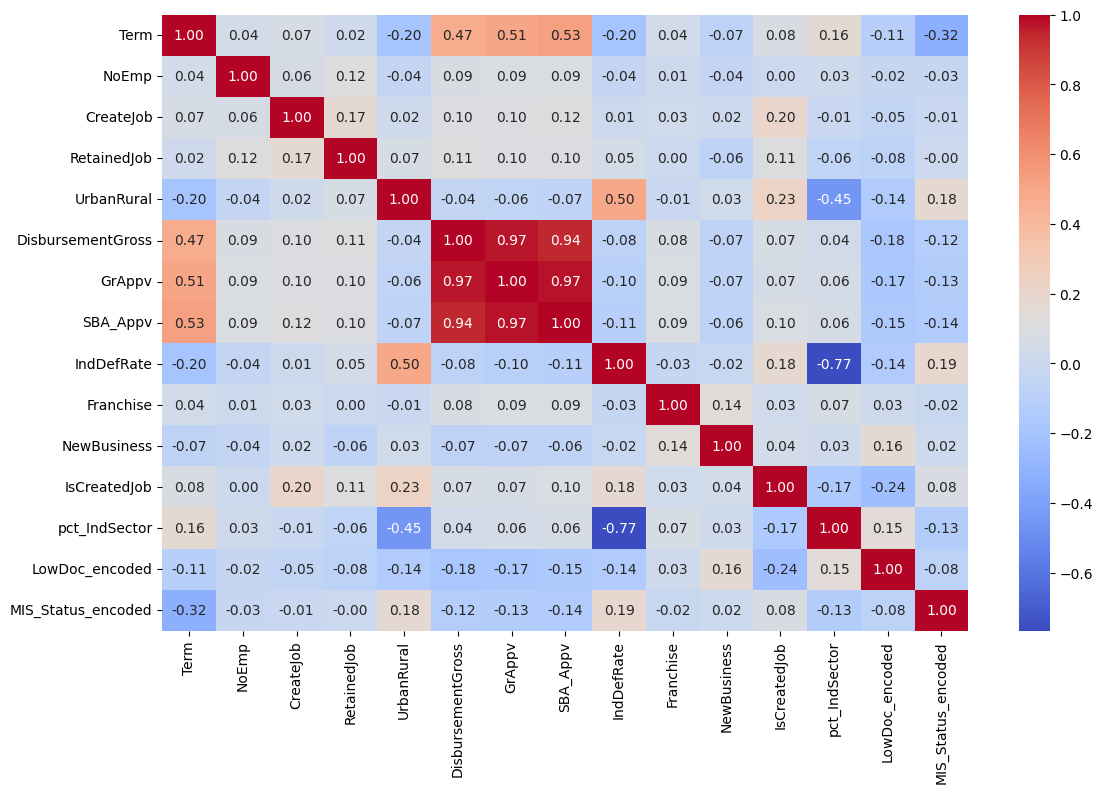

In [ ]:
plt.figure(figsize=(13,8))
correlation = df_correlation_check[numeric_columns].corr()
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm')

## Observation 1

`DisbursementGross`, `GrAppv`, dan `SBA_Appv` memiliki korelasi cyclic yang sangat tinggi. Di sini, harus dipilih salah satu untuk dikeep.

Jika dibandingkan dengan nilai korelasinya dengan target (`MIS_Status_encoded`), ternyata SBA_Appv memiliki korelasi negatif terbesar dengan MIS_Status_encoded, yang berarti hubungan terkuat dengan target variabel.

Namun karena nilai korelasi dengan target (`MIS_Status_encoded`) antara `DisbursementGross`, `GrAppv`, dan `SBA_Appv` cukup tipis, di sini saya akan mengecek berdasarkan feature importancenya karena feature importance langsung berkontribusi pada kinerja model dan lebih meyakinkan.


In [ ]:
X_corr_check = df_train[['DisbursementGross', 'GrAppv', 'SBA_Appv']]
y_corr_check = df_train['MIS_Status_encoded']

model = RandomForestClassifier()
model.fit(X_corr_check, y_corr_check)

feature_importances = model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': ['DisbursementGross', 'GrAppv', 'SBA_Appv'],
    'Importance': feature_importances
})

print(importance_df.sort_values(by='Importance', ascending=False))

             Feature  Importance
0  DisbursementGross    0.647938
2           SBA_Appv    0.232380
1             GrAppv    0.119682


Result:

Ternyata `DisbursementGross` memiliki kontribusi terbesar terhadap model prediksi berdasarkan nilai feature importancenya. Hal ini menunjukkan bahwa `DisbursementGross` ini memberikan informasi yang paling berguna untuk model.

Di sini keputusan finalnya adalah:
- Keep `DisbursementGross`
- Drop `GrAppv` dan `SBA_Appv`

In [ ]:
df_train = df_train.drop(columns=['GrAppv', 'SBA_Appv'])
df_test = df_test.drop(columns=['GrAppv', 'SBA_Appv'])

In [ ]:
numeric_columns = [col for col in numeric_columns if col not in ['GrAppv', 'SBA_Appv']]

## Observation 2

`IndDefRate` dan `pct_IndSector` memiliki nilai korelasi yang cukup tinggi, namun masih di bawah threshold (0.8). Di sini akan saya cek apakah jika prediksi dilakukan dengan salah satu variabel atau dengan kedua variabel akan memberikan dampak perbedaan yang signifikan atau tidak
- Jika tidak signifikan, maka akan saya keep salah satu
- Jika signifikan, maka akan saya keep keduanya

In [ ]:
X_2_check = df_train[['IndDefRate', 'pct_IndSector']]
y_check = df_train['MIS_Status_encoded']

X_1_check = df_train[['IndDefRate']]

model = RandomForestClassifier()

# Evaluasi model dengan kedua variabel
scores_both = cross_val_score(model, X_2_check, y_check, cv=5, scoring='accuracy')
print(f'Mean Accuracy dengan IndDefrate + pct_IndSector: {np.mean(scores_both)}')

# Evaluasi model dengan satu variabel (IndDefRate)
scores_single = cross_val_score(model, X_1_check, y_check, cv=5, scoring='accuracy')
print(f'Mean Accuracy dengan IndDefRate only: {np.mean(scores_single)}')

Mean Accuracy dengan IndDefrate + pct_IndSector: 0.822954923134158
Mean Accuracy dengan IndDefRate only: 0.822954923134158


Result:

Ternyata hasil prediksi antara 1 variabel dengan 2 variabel tidak terlalu jauh. Artinya, sebetulnya antara `IndDefRate` dan `pct_IndSector` memberikan informasi yang mirip dan tidak jauh berbeda. Maka di sini saya putuskan untuk pilih salah satu.

Namun mana yang harus dipilih?

- Berdasarkan nilai korelasi dengan target (`MIS_Status_encoded`), `IndDefRate` memiliki nilai korelasi terkuat dengan target dibandingkan dengan `pct_IndSector`.
- Namun untuk memastikannya lagi, saya akan lakukan feature importance dulu antara `IndDefRate` dan `pct_IndSector` untuk menentukan feature mana yang paling berpengaruh terhadap model.

In [ ]:
X_corr_check = df_train[['IndDefRate', 'pct_IndSector']]
y_corr_check = df_train['MIS_Status_encoded']

model = RandomForestClassifier()
model.fit(X_corr_check, y_corr_check)

feature_importances = model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': ['IndDefRate', 'pct_IndSector'],
    'Importance': feature_importances
})

print(importance_df.sort_values(by='Importance', ascending=False))

         Feature  Importance
0     IndDefRate    0.529185
1  pct_IndSector    0.470815


Ternyata benar bahwa `IndDefRate` merupakan feature yang paling berpengaruh terhadap model. Maka di sini saya akan keep `IndDefRate` dan drop `pct_IndSector`

In [ ]:
df_train = df_train.drop(columns=['pct_IndSector'])
df_test = df_test.drop(columns=['pct_IndSector'])

In [ ]:
numeric_columns = [col for col in numeric_columns if col not in ['pct_IndSector']]

Setelah Observation 1 & Observation 2 dilakukan, kita akan sanity check lagi.

In [ ]:
df_correlation_check = pd.concat([df_train, df_test], ignore_index=True)

In [ ]:
# calculate VIF scores for each feature
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

constant = add_constant(df_correlation_check[numeric_columns])

vif_df = pd.DataFrame([vif(constant.values, i)
               for i in range(constant.shape[1])],
              index=constant.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,Term,1.500131
2,NoEmp,1.025855
3,CreateJob,1.075272
4,RetainedJob,1.064126
5,UrbanRural,1.409927
6,DisbursementGross,1.348682
7,IndDefRate,1.376928
8,Franchise,1.030892
9,NewBusiness,1.068817
10,IsCreatedJob,1.184217


# Data Scaling

Scaling tidak dilakukan untuk seluruh kolom.

Notes:
Kolom yang perlu dilakukan scaling adalah kolom numerik yang akan digunakan sebagai fitur dalam model machine learning. Kolom yang bersifat kategori atau biner biasanya tidak memerlukan scaling.

Berikut adalah list decision scaling atau tidak:
- Zip: Tidak perlu scaling (kode pos, yang tidak relevan untuk scaling).
- Term: Perlu scaling (Kolom continuous yang relevan untuk model).
- NoEmp: Perlu scaling (jumlah karyawan, relevan untuk model).
- NewExist: Tidak perlu scaling (kategori, biner).
- CreateJob: Perlu scaling (kolom numerik).
- RetainedJob: Perlu scaling (kolom numerik).
- UrbanRural: Tidak perlu scaling (kategori, biner).
- DisbursementGross: Perlu scaling (kolom numerik).
- IndDefRate: Perlu scaling (kolom numerik).
- Franchise: Tidak perlu scaling (kategori, biner).
- pct_State: Perlu scaling (kolom numerik).
- LowDoc_encoded: Tidak perlu scaling (kategori, biner).
- MIS_Status_encoded: Tidak perlu scaling (kategori, biner).

## Train Dataframe

In [ ]:
df_train.head(3)

,Term,NoEmp,CreateJob,RetainedJob,UrbanRural,DisbursementGross,IndDefRate,Franchise,NewBusiness,IsCreatedJob,LowDoc_encoded,MIS_Status_encoded
695016,84,1,1,1,0,10000,20,0,0,1,0,0
488153,28,8,0,0,2,83900,14,0,0,0,1,1
532245,144,6,0,6,2,173300,20,0,0,0,0,0


Target (`MIS_Status_encoded`) tidak akan dilakukan scaling. Di sini, target akan dipisah dari features terlebih dahulu.

In [ ]:
features = df_train.drop(columns=['MIS_Status_encoded'])
target_data = df_train['MIS_Status_encoded']

In [ ]:
df_train_scaled_backup = df_train.copy()

In [ ]:
scaler = StandardScaler()

In [ ]:
scaled_features = scaler.fit_transform(features)

In [ ]:
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)

In [ ]:
# Gabungkan lagi antara target dan features
df_train = pd.concat([scaled_features_df, target_data.reset_index(drop=True)], axis=1)

In [ ]:
df_train.head(3)

,Term,NoEmp,CreateJob,RetainedJob,UrbanRural,DisbursementGross,IndDefRate,Franchise,NewBusiness,IsCreatedJob,LowDoc_encoded,MIS_Status_encoded
0,-0.332144,-0.137051,-0.075306,-0.149926,-1.190113,-0.663073,0.456943,-0.247124,-0.626829,1.516759,-0.382765,0
1,-1.046314,-0.043194,-0.144496,-0.192892,1.911931,-0.406638,-0.197287,-0.247124,-0.626829,-0.659301,2.612567,1
2,0.433039,-0.070010,-0.144496,0.064903,1.911931,-0.096418,0.456943,-0.247124,-0.626829,-0.659301,-0.382765,0


## Test Dataframe

In [ ]:
df_test.head(3)

,Term,NoEmp,CreateJob,RetainedJob,UrbanRural,DisbursementGross,IndDefRate,Franchise,NewBusiness,IsCreatedJob,LowDoc_encoded,MIS_Status_encoded
395280,243,2,0,0,1,150000,0,0,0,0,0,0
451751,36,2,0,2,2,16000,22,0,1,0,0,0
239682,26,19,0,19,1,272480,16,0,0,0,0,1


Target (`MIS_Status_encoded`) tidak akan dilakukan scaling. Di sini, target akan dipisah dari features terlebih dahulu.

In [ ]:
features = df_test.drop(columns=['MIS_Status_encoded'])
target_data = df_test['MIS_Status_encoded']

In [ ]:
df_test_scaled_backup = df_test.copy()

In [ ]:
scaler = StandardScaler()

In [ ]:
scaled_features = scaler.fit_transform(features)

In [ ]:
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)

In [ ]:
# Gabungkan lagi antara target dan features
df_test = pd.concat([scaled_features_df, target_data.reset_index(drop=True)], axis=1)

In [ ]:
df_test.head(3)

,Term,NoEmp,CreateJob,RetainedJob,UrbanRural,DisbursementGross,IndDefRate,Franchise,NewBusiness,IsCreatedJob,LowDoc_encoded,MIS_Status_encoded
0,1.700608,-0.130459,-0.113845,-0.245560,0.361045,-0.177027,-1.722749,-0.248775,-0.625014,-0.658855,-0.383262,0
1,-0.942901,-0.130459,-0.113845,-0.136754,1.911161,-0.637862,0.674693,-0.248775,1.599964,-0.658855,-0.383262,0
2,-1.070607,0.110425,-0.113845,0.788093,0.361045,0.244190,0.020845,-0.248775,-0.625014,-0.658855,-0.383262,1


# Data Split (Train + Val, Test)

Di sini, saya akan membagi `df_train` menjadi proporsi sebagai berikut:
- 20% dari `df_train` digunakan sebagai Validation Data
- 80% dari `df_train` tetap sebagai Train Data

Validation data ini nantinya akan digunakan untuk membantu memilih dan setting kombinasi hyperparameter yang memberikan kinerja terbaik.

In [ ]:
df_train_new, df_val = train_test_split(df_train, test_size=0.2, random_state=42)

# Modeling

## X & y Split

In [ ]:
X_train = df_train_new.drop('MIS_Status_encoded', axis=1)
y_train = df_train_new['MIS_Status_encoded']
X_val = df_val.drop('MIS_Status_encoded', axis=1)
y_val = df_val['MIS_Status_encoded']
X_test = df_test.drop('MIS_Status_encoded', axis=1)
y_test = df_test['MIS_Status_encoded']

## Initialize Models

In [ ]:
lgb_model = lgb.LGBMClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
lr_model = LogisticRegression(random_state=42)
knn_model = KNeighborsClassifier()

## Model Training

In [ ]:
model_list = [lgb_model, xgb_model, rf_model, lr_model, knn_model]
model_name_list = ["LightGBM", "XGBoost", "RandomForest", "LogisticRegression", "KNN"]

for model in model_list:
  model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 87860, number of negative: 409441
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.059761 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1071
[LightGBM] [Info] Number of data points in the train set: 497301, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.176674 -> initscore=-1.539048
[LightGBM] [Info] Start training from score -1.539048


## Testing & Evaluation

### Testing on Train Data

In [ ]:
for model, name in zip(model_list, model_name_list):
    y_train_pred = model.predict(X_train)
    test_accuracy = accuracy_score(y_train, y_train_pred)

    print(f"{name} Train Dataset Accuracy: {test_accuracy}")
    print(f"{name} Train Classification Report:\n{classification_report(y_train, y_train_pred)}")

LightGBM Validation Dataset Accuracy: 0.9391116902337403
LightGBM Validation Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96    102130
           1       0.86      0.78      0.82     22196

    accuracy                           0.94    124326
   macro avg       0.91      0.88      0.89    124326
weighted avg       0.94      0.94      0.94    124326

XGBoost Validation Dataset Accuracy: 0.9345752296382093
XGBoost Validation Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96    102130
           1       0.85      0.76      0.81     22196

    accuracy                           0.93    124326
   macro avg       0.90      0.87      0.88    124326
weighted avg       0.93      0.93      0.93    124326

RandomForest Validation Dataset Accuracy: 0.9311728841915609
RandomForest Validation Classification Report:
              precision    recall  f1-sc

### Testing on Test Data

LightGBM Test Dataset Accuracy: 0.9385047914688207
LightGBM Test Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96    219266
           1       0.86      0.77      0.82     47145

    accuracy                           0.94    266411
   macro avg       0.91      0.87      0.89    266411
weighted avg       0.94      0.94      0.94    266411



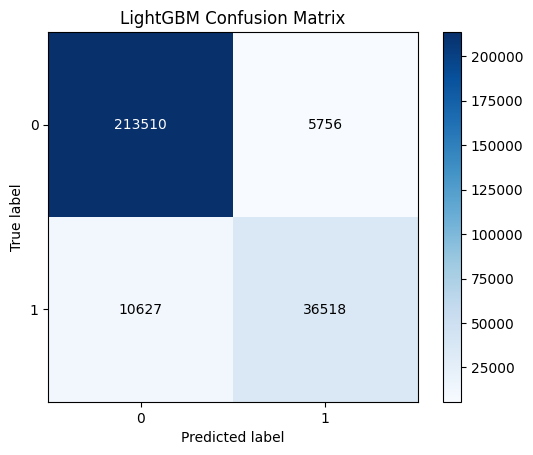



XGBoost Test Dataset Accuracy: 0.9301642950178484
XGBoost Test Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96    219266
           1       0.84      0.74      0.79     47145

    accuracy                           0.93    266411
   macro avg       0.89      0.86      0.87    266411
weighted avg       0.93      0.93      0.93    266411



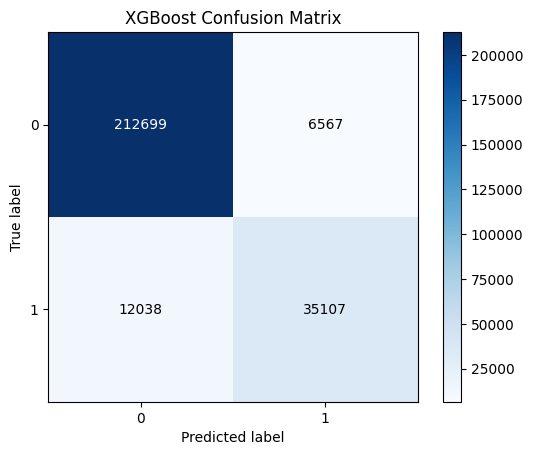



RandomForest Test Dataset Accuracy: 0.9257875988604074
RandomForest Test Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96    219266
           1       0.84      0.72      0.77     47145

    accuracy                           0.93    266411
   macro avg       0.89      0.85      0.87    266411
weighted avg       0.92      0.93      0.92    266411



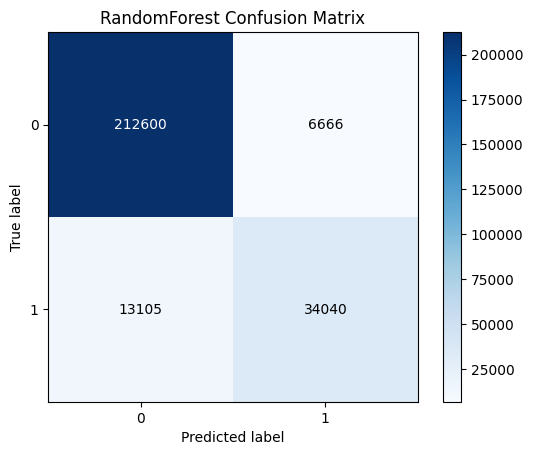



LogisticRegression Test Dataset Accuracy: 0.8406597325185522
LogisticRegression Test Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91    219266
           1       0.63      0.24      0.35     47145

    accuracy                           0.84    266411
   macro avg       0.74      0.61      0.63    266411
weighted avg       0.82      0.84      0.81    266411



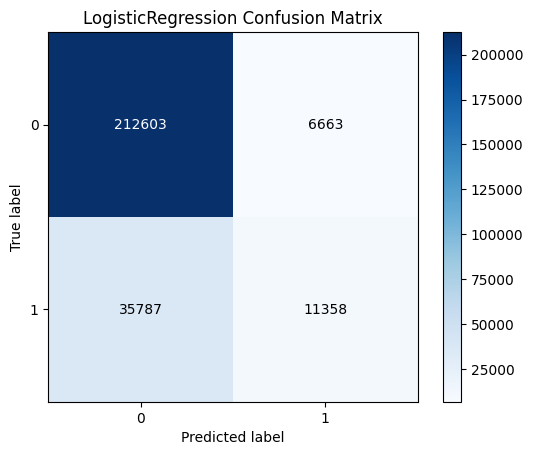



KNN Test Dataset Accuracy: 0.8898206155151251
KNN Test Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93    219266
           1       0.74      0.58      0.65     47145

    accuracy                           0.89    266411
   macro avg       0.83      0.77      0.79    266411
weighted avg       0.88      0.89      0.88    266411



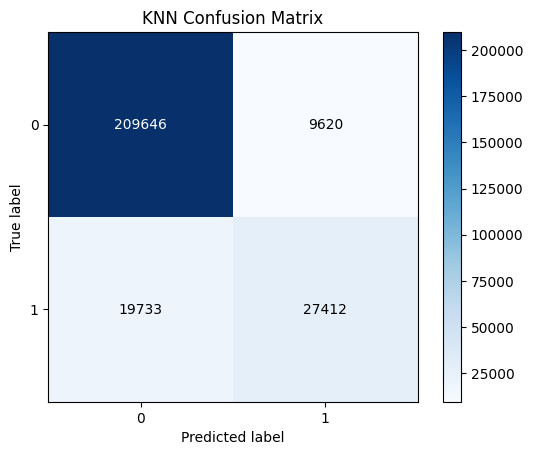

In [ ]:
for model, name in zip(model_list, model_name_list):
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print(f"{name} Test Dataset Accuracy: {test_accuracy}")
    print(f"{name} Test Classification Report:\n{classification_report(y_test, y_test_pred)}")

    skplt.metrics.plot_confusion_matrix(y_test, y_test_pred, title=f"{name} Confusion Matrix")
    plt.show()
    print("\n")

### Overfitting Insight

Hasil metric tidak menunjukkan tanda-tanda overfitting. Performa pada validation set dan test set sangat mirip, menunjukkan bahwa model memiliki performa yang baik pada data yang belum pernah dilihat sebelumnya (test data)

## Hyperparameter Tuning

Berdasarkan hasil pada Test Data, `LightGBM` merupakan model paling ideal untuk memprediksi.

In [ ]:
def objective(trial):
    # Param ini terlalu lama bos
    # param = {
    #     'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
    #     'learning_rate': trial.suggest_float('learning_rate', 1e-3, 1e-1, log=True),
    #     'num_leaves': trial.suggest_int('num_leaves', 31, 256),
    #     'max_depth': trial.suggest_int('max_depth', -1, 50),
    #     'min_child_samples': trial.suggest_int('min_child_samples', 20, 100),
    #     'subsample': trial.suggest_float('subsample', 0.5, 1.0),
    #     'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
    #     'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 10.0, log=True),
    #     'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 10.0, log=True),
    # }

    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 300),
        'learning_rate': trial.suggest_float('learning_rate', 1e-2, 1e-1, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 31, 128),
        'max_depth': trial.suggest_int('max_depth', -1, 20),
        'min_child_samples': trial.suggest_int('min_child_samples', 20, 50),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-5, 1e-1, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-5, 1e-1, log=True),
    }

    model = lgb.LGBMClassifier(**param, random_state=42)
    model.fit(X_train, y_train)

    # Prediksi pada set pengujian
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Menampilkan hasil terbaik
best_params = study.best_params
best_value = study.best_value
print(f"Best Parameters: {best_params}")
print(f"Best Accuracy: {best_value}")

[I 2024-06-06 09:06:29,802] A new study created in memory with name: no-name-117d3fa5-6f82-4810-ad38-dc10d821e58c


[LightGBM] [Info] Number of positive: 87860, number of negative: 409441
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.151022 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1071
[LightGBM] [Info] Number of data points in the train set: 497301, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.176674 -> initscore=-1.539048
[LightGBM] [Info] Start training from score -1.539048


[I 2024-06-06 09:07:24,206] Trial 0 finished with value: 0.9393868871780819 and parameters: {'n_estimators': 185, 'learning_rate': 0.05336738794594407, 'num_leaves': 54, 'max_depth': 16, 'min_child_samples': 48, 'subsample': 0.7385989313655894, 'colsample_bytree': 0.5799184795663012, 'reg_alpha': 0.00014215009203962452, 'reg_lambda': 0.0026829768298042792}. Best is trial 0 with value: 0.9393868871780819.


[LightGBM] [Info] Number of positive: 87860, number of negative: 409441
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.099269 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1071
[LightGBM] [Info] Number of data points in the train set: 497301, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.176674 -> initscore=-1.539048
[LightGBM] [Info] Start training from score -1.539048


[I 2024-06-06 09:07:33,207] Trial 1 finished with value: 0.9213808739128639 and parameters: {'n_estimators': 101, 'learning_rate': 0.05221185336040495, 'num_leaves': 35, 'max_depth': 3, 'min_child_samples': 47, 'subsample': 0.5137283103328771, 'colsample_bytree': 0.5801501829944424, 'reg_alpha': 0.008479684758873165, 'reg_lambda': 0.00021810723341503328}. Best is trial 0 with value: 0.9393868871780819.


[LightGBM] [Info] Number of positive: 87860, number of negative: 409441
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.035169 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1071
[LightGBM] [Info] Number of data points in the train set: 497301, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.176674 -> initscore=-1.539048
[LightGBM] [Info] Start training from score -1.539048


[I 2024-06-06 09:08:04,020] Trial 2 finished with value: 0.9400587813566257 and parameters: {'n_estimators': 292, 'learning_rate': 0.02248777487592331, 'num_leaves': 128, 'max_depth': 15, 'min_child_samples': 47, 'subsample': 0.8835019879750197, 'colsample_bytree': 0.6524131285243036, 'reg_alpha': 0.037987897985239605, 'reg_lambda': 0.000999865208931146}. Best is trial 2 with value: 0.9400587813566257.


[LightGBM] [Info] Number of positive: 87860, number of negative: 409441
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.035223 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1071
[LightGBM] [Info] Number of data points in the train set: 497301, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.176674 -> initscore=-1.539048
[LightGBM] [Info] Start training from score -1.539048
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2024-06-06 09:08:21,588] Trial 3 finished with value: 0.932731756571613 and parameters: {'n_estimators': 294, 'learning_rate': 0.03324793071200702, 'num_leaves': 73, 'max_depth': 4, 'min_child_samples': 32, 'subsample': 0.624399733050679, 'colsample_bytree': 0.6772005287946581, 'reg_alpha': 0.0029773193071965013, 'reg_lambda': 0.0005439328524928717}. Best is trial 2 with value: 0.9400587813566257.


[LightGBM] [Info] Number of positive: 87860, number of negative: 409441
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.037138 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1071
[LightGBM] [Info] Number of data points in the train set: 497301, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.176674 -> initscore=-1.539048
[LightGBM] [Info] Start training from score -1.539048
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-06-06 09:08:44,038] Trial 4 finished with value: 0.9395595527211714 and parameters: {'n_estimators': 268, 'learning_rate': 0.07184804772137778, 'num_leaves': 70, 'max_depth': 9, 'min_child_samples': 42, 'subsample': 0.5646159373139397, 'colsample_bytree': 0.772783045803873, 'reg_alpha': 0.0046988338573759865, 'reg_lambda': 0.023077313777708344}. Best is trial 2 with value: 0.9400587813566257.


[LightGBM] [Info] Number of positive: 87860, number of negative: 409441
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.057671 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1071
[LightGBM] [Info] Number of data points in the train set: 497301, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.176674 -> initscore=-1.539048
[LightGBM] [Info] Start training from score -1.539048


[I 2024-06-06 09:08:54,018] Trial 5 finished with value: 0.9271914447976998 and parameters: {'n_estimators': 230, 'learning_rate': 0.08619020497458588, 'num_leaves': 107, 'max_depth': 2, 'min_child_samples': 34, 'subsample': 0.6606423708899065, 'colsample_bytree': 0.9480470271493292, 'reg_alpha': 8.276181171901563e-05, 'reg_lambda': 0.0014918198759310917}. Best is trial 2 with value: 0.9400587813566257.


[LightGBM] [Info] Number of positive: 87860, number of negative: 409441
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.036333 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1071
[LightGBM] [Info] Number of data points in the train set: 497301, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.176674 -> initscore=-1.539048
[LightGBM] [Info] Start training from score -1.539048


[I 2024-06-06 09:08:58,009] Trial 6 finished with value: 0.8749901468032476 and parameters: {'n_estimators': 122, 'learning_rate': 0.09139757217824819, 'num_leaves': 73, 'max_depth': 1, 'min_child_samples': 20, 'subsample': 0.7732663227971079, 'colsample_bytree': 0.8321548393819058, 'reg_alpha': 0.04749715910884713, 'reg_lambda': 6.027015920908304e-05}. Best is trial 2 with value: 0.9400587813566257.


[LightGBM] [Info] Number of positive: 87860, number of negative: 409441
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.095284 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1071
[LightGBM] [Info] Number of data points in the train set: 497301, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.176674 -> initscore=-1.539048
[LightGBM] [Info] Start training from score -1.539048


[I 2024-06-06 09:09:15,739] Trial 7 finished with value: 0.9215235106658509 and parameters: {'n_estimators': 294, 'learning_rate': 0.020040881129050028, 'num_leaves': 42, 'max_depth': 3, 'min_child_samples': 23, 'subsample': 0.6389446549580937, 'colsample_bytree': 0.5342402904983041, 'reg_alpha': 0.005818562501610356, 'reg_lambda': 0.02053613664916603}. Best is trial 2 with value: 0.9400587813566257.


[LightGBM] [Info] Number of positive: 87860, number of negative: 409441
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.057097 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1071
[LightGBM] [Info] Number of data points in the train set: 497301, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.176674 -> initscore=-1.539048
[LightGBM] [Info] Start training from score -1.539048


[I 2024-06-06 09:09:51,313] Trial 8 finished with value: 0.9393493511904538 and parameters: {'n_estimators': 260, 'learning_rate': 0.054058749300701044, 'num_leaves': 42, 'max_depth': 14, 'min_child_samples': 33, 'subsample': 0.7544881619882163, 'colsample_bytree': 0.9914519683472842, 'reg_alpha': 5.257277575711119e-05, 'reg_lambda': 2.419063081125502e-05}. Best is trial 2 with value: 0.9400587813566257.


[LightGBM] [Info] Number of positive: 87860, number of negative: 409441
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.077241 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1071
[LightGBM] [Info] Number of data points in the train set: 497301, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.176674 -> initscore=-1.539048
[LightGBM] [Info] Start training from score -1.539048


[I 2024-06-06 09:10:11,028] Trial 9 finished with value: 0.9392892936102488 and parameters: {'n_estimators': 142, 'learning_rate': 0.048502068233160625, 'num_leaves': 62, 'max_depth': 14, 'min_child_samples': 29, 'subsample': 0.9982414898268027, 'colsample_bytree': 0.5999590696578185, 'reg_alpha': 2.9531583405963766e-05, 'reg_lambda': 2.9352732631561323e-05}. Best is trial 2 with value: 0.9400587813566257.


[LightGBM] [Info] Number of positive: 87860, number of negative: 409441
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.042520 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1071
[LightGBM] [Info] Number of data points in the train set: 497301, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.176674 -> initscore=-1.539048
[LightGBM] [Info] Start training from score -1.539048


[I 2024-06-06 09:10:33,830] Trial 10 finished with value: 0.9342482104717899 and parameters: {'n_estimators': 182, 'learning_rate': 0.01065405078305148, 'num_leaves': 122, 'max_depth': 20, 'min_child_samples': 41, 'subsample': 0.9217565845734189, 'colsample_bytree': 0.7013553985372996, 'reg_alpha': 0.08975855631467865, 'reg_lambda': 0.004539085197223982}. Best is trial 2 with value: 0.9400587813566257.


[LightGBM] [Info] Number of positive: 87860, number of negative: 409441
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.078903 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1071
[LightGBM] [Info] Number of data points in the train set: 497301, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.176674 -> initscore=-1.539048
[LightGBM] [Info] Start training from score -1.539048


[I 2024-06-06 09:11:04,037] Trial 11 finished with value: 0.9393943943756076 and parameters: {'n_estimators': 251, 'learning_rate': 0.020077417356349804, 'num_leaves': 95, 'max_depth': 9, 'min_child_samples': 41, 'subsample': 0.8731432043785333, 'colsample_bytree': 0.8060711328996711, 'reg_alpha': 0.0006160468613533903, 'reg_lambda': 0.06781217203037576}. Best is trial 2 with value: 0.9400587813566257.


[LightGBM] [Info] Number of positive: 87860, number of negative: 409441
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.209056 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1071
[LightGBM] [Info] Number of data points in the train set: 497301, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.176674 -> initscore=-1.539048
[LightGBM] [Info] Start training from score -1.539048


[I 2024-06-06 09:11:43,441] Trial 12 finished with value: 0.9398410726283825 and parameters: {'n_estimators': 260, 'learning_rate': 0.02427432309966722, 'num_leaves': 91, 'max_depth': 10, 'min_child_samples': 42, 'subsample': 0.5462120889305184, 'colsample_bytree': 0.7522819071664432, 'reg_alpha': 0.017521629466008482, 'reg_lambda': 0.012652193910406697}. Best is trial 2 with value: 0.9400587813566257.


[LightGBM] [Info] Number of positive: 87860, number of negative: 409441
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.062056 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1071
[LightGBM] [Info] Number of data points in the train set: 497301, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.176674 -> initscore=-1.539048
[LightGBM] [Info] Start training from score -1.539048


[I 2024-06-06 09:12:17,359] Trial 13 finished with value: 0.9395332775298317 and parameters: {'n_estimators': 223, 'learning_rate': 0.019971740187581466, 'num_leaves': 126, 'max_depth': 12, 'min_child_samples': 50, 'subsample': 0.8564804328273824, 'colsample_bytree': 0.6739865234715572, 'reg_alpha': 0.0248120866997572, 'reg_lambda': 0.007783824184377224}. Best is trial 2 with value: 0.9400587813566257.


[LightGBM] [Info] Number of positive: 87860, number of negative: 409441
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.035962 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1071
[LightGBM] [Info] Number of data points in the train set: 497301, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.176674 -> initscore=-1.539048
[LightGBM] [Info] Start training from score -1.539048


[I 2024-06-06 09:12:48,580] Trial 14 finished with value: 0.9395783207149855 and parameters: {'n_estimators': 297, 'learning_rate': 0.028850313652290332, 'num_leaves': 96, 'max_depth': 19, 'min_child_samples': 44, 'subsample': 0.8154936267986044, 'colsample_bytree': 0.8537965785228706, 'reg_alpha': 0.022984914546794893, 'reg_lambda': 0.00038926897336628646}. Best is trial 2 with value: 0.9400587813566257.


[LightGBM] [Info] Number of positive: 87860, number of negative: 409441
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.035833 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1071
[LightGBM] [Info] Number of data points in the train set: 497301, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.176674 -> initscore=-1.539048
[LightGBM] [Info] Start training from score -1.539048


[I 2024-06-06 09:13:11,985] Trial 15 finished with value: 0.9374425230189444 and parameters: {'n_estimators': 223, 'learning_rate': 0.013236323136280278, 'num_leaves': 90, 'max_depth': 11, 'min_child_samples': 38, 'subsample': 0.9665063068416038, 'colsample_bytree': 0.7280048554974738, 'reg_alpha': 0.000721844970309384, 'reg_lambda': 0.00016039450618094415}. Best is trial 2 with value: 0.9400587813566257.


[LightGBM] [Info] Number of positive: 87860, number of negative: 409441
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.034438 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1071
[LightGBM] [Info] Number of data points in the train set: 497301, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.176674 -> initscore=-1.539048
[LightGBM] [Info] Start training from score -1.539048
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2024-06-06 09:13:34,682] Trial 16 finished with value: 0.9373336686548228 and parameters: {'n_estimators': 270, 'learning_rate': 0.029684040794937472, 'num_leaves': 107, 'max_depth': 6, 'min_child_samples': 46, 'subsample': 0.6860474550396967, 'colsample_bytree': 0.6309415395699792, 'reg_alpha': 0.01542552937216882, 'reg_lambda': 0.0012167876661253428}. Best is trial 2 with value: 0.9400587813566257.


[LightGBM] [Info] Number of positive: 87860, number of negative: 409441
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.037239 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1071
[LightGBM] [Info] Number of data points in the train set: 497301, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.176674 -> initscore=-1.539048
[LightGBM] [Info] Start training from score -1.539048


[I 2024-06-06 09:13:59,618] Trial 17 finished with value: 0.9387562825859292 and parameters: {'n_estimators': 243, 'learning_rate': 0.01627933370368585, 'num_leaves': 114, 'max_depth': 17, 'min_child_samples': 37, 'subsample': 0.5822617784430483, 'colsample_bytree': 0.8907178735975665, 'reg_alpha': 0.0022284467091347603, 'reg_lambda': 0.09219331418204016}. Best is trial 2 with value: 0.9400587813566257.


[LightGBM] [Info] Number of positive: 87860, number of negative: 409441
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.060978 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1071
[LightGBM] [Info] Number of data points in the train set: 497301, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.176674 -> initscore=-1.539048
[LightGBM] [Info] Start training from score -1.539048


[I 2024-06-06 09:14:29,563] Trial 18 finished with value: 0.9397472326593121 and parameters: {'n_estimators': 278, 'learning_rate': 0.03922640402974801, 'num_leaves': 85, 'max_depth': -1, 'min_child_samples': 50, 'subsample': 0.5129793348222882, 'colsample_bytree': 0.7577966009357667, 'reg_alpha': 1.0977113926203329e-05, 'reg_lambda': 0.012380033308603015}. Best is trial 2 with value: 0.9400587813566257.


[LightGBM] [Info] Number of positive: 87860, number of negative: 409441
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.056115 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1071
[LightGBM] [Info] Number of data points in the train set: 497301, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.176674 -> initscore=-1.539048
[LightGBM] [Info] Start training from score -1.539048
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[I 2024-06-06 09:14:49,307] Trial 19 finished with value: 0.9359410835138189 and parameters: {'n_estimators': 202, 'learning_rate': 0.023444986355988913, 'num_leaves': 105, 'max_depth': 6, 'min_child_samples': 44, 'subsample': 0.9096275547531982, 'colsample_bytree': 0.5243185135005843, 'reg_alpha': 0.08277963053568665, 'reg_lambda': 0.003345292830338571}. Best is trial 2 with value: 0.9400587813566257.


[LightGBM] [Info] Number of positive: 87860, number of negative: 409441
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.035727 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1071
[LightGBM] [Info] Number of data points in the train set: 497301, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.176674 -> initscore=-1.539048
[LightGBM] [Info] Start training from score -1.539048
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2024-06-06 09:15:05,876] Trial 20 finished with value: 0.9342782392618924 and parameters: {'n_estimators': 163, 'learning_rate': 0.016001512701306526, 'num_leaves': 119, 'max_depth': 7, 'min_child_samples': 38, 'subsample': 0.708708443818788, 'colsample_bytree': 0.6471047290928166, 'reg_alpha': 0.0014776774287370681, 'reg_lambda': 0.03660531193549384}. Best is trial 2 with value: 0.9400587813566257.


[LightGBM] [Info] Number of positive: 87860, number of negative: 409441
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.040881 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1071
[LightGBM] [Info] Number of data points in the train set: 497301, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.176674 -> initscore=-1.539048
[LightGBM] [Info] Start training from score -1.539048


[I 2024-06-06 09:15:34,170] Trial 21 finished with value: 0.9398786086160106 and parameters: {'n_estimators': 276, 'learning_rate': 0.037775514186304274, 'num_leaves': 85, 'max_depth': -1, 'min_child_samples': 50, 'subsample': 0.5001990488019251, 'colsample_bytree': 0.7599423672177457, 'reg_alpha': 1.0960047459114816e-05, 'reg_lambda': 0.009931278472308647}. Best is trial 2 with value: 0.9400587813566257.


[LightGBM] [Info] Number of positive: 87860, number of negative: 409441
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.038961 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1071
[LightGBM] [Info] Number of data points in the train set: 497301, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.176674 -> initscore=-1.539048
[LightGBM] [Info] Start training from score -1.539048


[I 2024-06-06 09:16:01,671] Trial 22 finished with value: 0.9397059430729212 and parameters: {'n_estimators': 279, 'learning_rate': 0.03735171949852095, 'num_leaves': 83, 'max_depth': 12, 'min_child_samples': 46, 'subsample': 0.56895425314794, 'colsample_bytree': 0.7253867584159801, 'reg_alpha': 0.00029246787771301303, 'reg_lambda': 0.006577766808154366}. Best is trial 2 with value: 0.9400587813566257.


[LightGBM] [Info] Number of positive: 87860, number of negative: 409441
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.037910 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1071
[LightGBM] [Info] Number of data points in the train set: 497301, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.176674 -> initscore=-1.539048
[LightGBM] [Info] Start training from score -1.539048


[I 2024-06-06 09:16:30,141] Trial 23 finished with value: 0.9395407847273574 and parameters: {'n_estimators': 243, 'learning_rate': 0.02636766444370702, 'num_leaves': 99, 'max_depth': 14, 'min_child_samples': 50, 'subsample': 0.5001287974271733, 'colsample_bytree': 0.801128075779179, 'reg_alpha': 0.010747964564349975, 'reg_lambda': 0.0015904691143009938}. Best is trial 2 with value: 0.9400587813566257.


[LightGBM] [Info] Number of positive: 87860, number of negative: 409441
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.224110 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1071
[LightGBM] [Info] Number of data points in the train set: 497301, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.176674 -> initscore=-1.539048
[LightGBM] [Info] Start training from score -1.539048


[I 2024-06-06 09:17:12,083] Trial 24 finished with value: 0.9393718727830307 and parameters: {'n_estimators': 276, 'learning_rate': 0.04127229208220317, 'num_leaves': 62, 'max_depth': -1, 'min_child_samples': 44, 'subsample': 0.5997329887736449, 'colsample_bytree': 0.885894180631258, 'reg_alpha': 1.0188769196559466e-05, 'reg_lambda': 0.013616459546916568}. Best is trial 2 with value: 0.9400587813566257.


[LightGBM] [Info] Number of positive: 87860, number of negative: 409441
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.140633 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1071
[LightGBM] [Info] Number of data points in the train set: 497301, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.176674 -> initscore=-1.539048
[LightGBM] [Info] Start training from score -1.539048


[I 2024-06-06 09:17:56,177] Trial 25 finished with value: 0.9400475205603372 and parameters: {'n_estimators': 299, 'learning_rate': 0.02410849269270648, 'num_leaves': 115, 'max_depth': 17, 'min_child_samples': 48, 'subsample': 0.543606017884265, 'colsample_bytree': 0.7721083689388146, 'reg_alpha': 0.00027023249270711905, 'reg_lambda': 0.0006400813059920591}. Best is trial 2 with value: 0.9400587813566257.


[LightGBM] [Info] Number of positive: 87860, number of negative: 409441
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.053703 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1071
[LightGBM] [Info] Number of data points in the train set: 497301, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.176674 -> initscore=-1.539048
[LightGBM] [Info] Start training from score -1.539048


[I 2024-06-06 09:18:28,770] Trial 26 finished with value: 0.9400400133628116 and parameters: {'n_estimators': 298, 'learning_rate': 0.033729816067903304, 'num_leaves': 128, 'max_depth': 17, 'min_child_samples': 48, 'subsample': 0.7950428280018982, 'colsample_bytree': 0.7038121480641873, 'reg_alpha': 0.000261541939164929, 'reg_lambda': 0.0006385947915951345}. Best is trial 2 with value: 0.9400587813566257.


[LightGBM] [Info] Number of positive: 87860, number of negative: 409441
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.098494 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1071
[LightGBM] [Info] Number of data points in the train set: 497301, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.176674 -> initscore=-1.539048
[LightGBM] [Info] Start training from score -1.539048


[I 2024-06-06 09:19:02,826] Trial 27 finished with value: 0.9398973766098246 and parameters: {'n_estimators': 296, 'learning_rate': 0.016626547934161164, 'num_leaves': 128, 'max_depth': 17, 'min_child_samples': 28, 'subsample': 0.7984241485020596, 'colsample_bytree': 0.6228425685224885, 'reg_alpha': 0.0003229178371424386, 'reg_lambda': 0.00047128642783667815}. Best is trial 2 with value: 0.9400587813566257.


[LightGBM] [Info] Number of positive: 87860, number of negative: 409441
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.062118 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1071
[LightGBM] [Info] Number of data points in the train set: 497301, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.176674 -> initscore=-1.539048
[LightGBM] [Info] Start training from score -1.539048


[I 2024-06-06 09:19:37,578] Trial 28 finished with value: 0.9400963173442538 and parameters: {'n_estimators': 300, 'learning_rate': 0.022807510073953593, 'num_leaves': 116, 'max_depth': 18, 'min_child_samples': 48, 'subsample': 0.8358897587694893, 'colsample_bytree': 0.6806309088638565, 'reg_alpha': 0.00026632233108032455, 'reg_lambda': 9.538357122333154e-05}. Best is trial 28 with value: 0.9400963173442538.


[LightGBM] [Info] Number of positive: 87860, number of negative: 409441
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.034736 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1071
[LightGBM] [Info] Number of data points in the train set: 497301, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.176674 -> initscore=-1.539048
[LightGBM] [Info] Start training from score -1.539048


[I 2024-06-06 09:19:56,967] Trial 29 finished with value: 0.9392630184189091 and parameters: {'n_estimators': 191, 'learning_rate': 0.021790018859186484, 'num_leaves': 115, 'max_depth': 15, 'min_child_samples': 47, 'subsample': 0.8486285321334136, 'colsample_bytree': 0.6604207528254995, 'reg_alpha': 0.000126569907636009, 'reg_lambda': 9.849943736651824e-05}. Best is trial 28 with value: 0.9400963173442538.


[LightGBM] [Info] Number of positive: 87860, number of negative: 409441
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.090674 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1071
[LightGBM] [Info] Number of data points in the train set: 497301, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.176674 -> initscore=-1.539048
[LightGBM] [Info] Start training from score -1.539048


[I 2024-06-06 09:20:28,799] Trial 30 finished with value: 0.93745003021647 and parameters: {'n_estimators': 289, 'learning_rate': 0.011905643316094288, 'num_leaves': 114, 'max_depth': 19, 'min_child_samples': 45, 'subsample': 0.9129890143552702, 'colsample_bytree': 0.551523674718761, 'reg_alpha': 0.0011340089605527796, 'reg_lambda': 1.3297761447535494e-05}. Best is trial 28 with value: 0.9400963173442538.


[LightGBM] [Info] Number of positive: 87860, number of negative: 409441
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.096070 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1071
[LightGBM] [Info] Number of data points in the train set: 497301, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.176674 -> initscore=-1.539048
[LightGBM] [Info] Start training from score -1.539048


[I 2024-06-06 09:21:04,118] Trial 31 finished with value: 0.9398448262271453 and parameters: {'n_estimators': 300, 'learning_rate': 0.027501095853151445, 'num_leaves': 120, 'max_depth': 17, 'min_child_samples': 49, 'subsample': 0.8085371044629963, 'colsample_bytree': 0.7242812582725561, 'reg_alpha': 0.00024010977234821028, 'reg_lambda': 0.0009142562375291111}. Best is trial 28 with value: 0.9400963173442538.


[LightGBM] [Info] Number of positive: 87860, number of negative: 409441
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.036287 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1071
[LightGBM] [Info] Number of data points in the train set: 497301, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.176674 -> initscore=-1.539048
[LightGBM] [Info] Start training from score -1.539048


[I 2024-06-06 09:21:34,221] Trial 32 finished with value: 0.9399386661962156 and parameters: {'n_estimators': 284, 'learning_rate': 0.03273716418632107, 'num_leaves': 126, 'max_depth': 16, 'min_child_samples': 48, 'subsample': 0.7130949384625029, 'colsample_bytree': 0.6933869104899609, 'reg_alpha': 0.0004594774139838809, 'reg_lambda': 0.0002657155564834009}. Best is trial 28 with value: 0.9400963173442538.


[LightGBM] [Info] Number of positive: 87860, number of negative: 409441
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.060670 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1071
[LightGBM] [Info] Number of data points in the train set: 497301, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.176674 -> initscore=-1.539048
[LightGBM] [Info] Start training from score -1.539048


[I 2024-06-06 09:22:02,901] Trial 33 finished with value: 0.9394919879434408 and parameters: {'n_estimators': 260, 'learning_rate': 0.0173135322488824, 'num_leaves': 110, 'max_depth': 18, 'min_child_samples': 48, 'subsample': 0.8336571763033259, 'colsample_bytree': 0.5937390041810059, 'reg_alpha': 0.00012100962876755328, 'reg_lambda': 0.000725187872054861}. Best is trial 28 with value: 0.9400963173442538.


[LightGBM] [Info] Number of positive: 87860, number of negative: 409441
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.035850 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1071
[LightGBM] [Info] Number of data points in the train set: 497301, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.176674 -> initscore=-1.539048
[LightGBM] [Info] Start training from score -1.539048


[I 2024-06-06 09:22:34,618] Trial 34 finished with value: 0.9399987237764207 and parameters: {'n_estimators': 300, 'learning_rate': 0.025275868532618574, 'num_leaves': 121, 'max_depth': 20, 'min_child_samples': 47, 'subsample': 0.885379400265496, 'colsample_bytree': 0.7070465274765476, 'reg_alpha': 0.00023121197596829695, 'reg_lambda': 0.002321749581213666}. Best is trial 28 with value: 0.9400963173442538.


[LightGBM] [Info] Number of positive: 87860, number of negative: 409441
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.039323 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1071
[LightGBM] [Info] Number of data points in the train set: 497301, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.176674 -> initscore=-1.539048
[LightGBM] [Info] Start training from score -1.539048


[I 2024-06-06 09:23:02,080] Trial 35 finished with value: 0.9389364553265444 and parameters: {'n_estimators': 282, 'learning_rate': 0.013618427488737875, 'num_leaves': 101, 'max_depth': 15, 'min_child_samples': 43, 'subsample': 0.7578044681208606, 'colsample_bytree': 0.791098732511546, 'reg_alpha': 5.160735199019395e-05, 'reg_lambda': 0.00013761174201140454}. Best is trial 28 with value: 0.9400963173442538.


[LightGBM] [Info] Number of positive: 87860, number of negative: 409441
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.034072 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1071
[LightGBM] [Info] Number of data points in the train set: 497301, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.176674 -> initscore=-1.539048
[LightGBM] [Info] Start training from score -1.539048


[I 2024-06-06 09:23:31,695] Trial 36 finished with value: 0.9397434790605493 and parameters: {'n_estimators': 266, 'learning_rate': 0.046510893369080264, 'num_leaves': 113, 'max_depth': 16, 'min_child_samples': 41, 'subsample': 0.791588358611897, 'colsample_bytree': 0.6200782913143763, 'reg_alpha': 0.0025167816276946593, 'reg_lambda': 0.00030285724637010766}. Best is trial 28 with value: 0.9400963173442538.


[LightGBM] [Info] Number of positive: 87860, number of negative: 409441
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.092698 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1071
[LightGBM] [Info] Number of data points in the train set: 497301, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.176674 -> initscore=-1.539048
[LightGBM] [Info] Start training from score -1.539048
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-06-06 09:24:02,816] Trial 37 finished with value: 0.9397434790605493 and parameters: {'n_estimators': 287, 'learning_rate': 0.06474979937562363, 'num_leaves': 128, 'max_depth': 18, 'min_child_samples': 46, 'subsample': 0.720340668334898, 'colsample_bytree': 0.6559829698665898, 'reg_alpha': 0.00017645092652214585, 'reg_lambda': 4.513676751666149e-05}. Best is trial 28 with value: 0.9400963173442538.


[LightGBM] [Info] Number of positive: 87860, number of negative: 409441
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.053095 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1071
[LightGBM] [Info] Number of data points in the train set: 497301, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.176674 -> initscore=-1.539048
[LightGBM] [Info] Start training from score -1.539048


[I 2024-06-06 09:24:29,435] Trial 38 finished with value: 0.9400249989677604 and parameters: {'n_estimators': 247, 'learning_rate': 0.032240134261083415, 'num_leaves': 117, 'max_depth': 18, 'min_child_samples': 48, 'subsample': 0.9334498909279019, 'colsample_bytree': 0.5673817075441978, 'reg_alpha': 7.279773117773503e-05, 'reg_lambda': 0.0005541955336839129}. Best is trial 28 with value: 0.9400963173442538.


[LightGBM] [Info] Number of positive: 87860, number of negative: 409441
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.100397 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1071
[LightGBM] [Info] Number of data points in the train set: 497301, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.176674 -> initscore=-1.539048
[LightGBM] [Info] Start training from score -1.539048


[I 2024-06-06 09:25:04,280] Trial 39 finished with value: 0.9400137381714719 and parameters: {'n_estimators': 290, 'learning_rate': 0.01908215622558536, 'num_leaves': 123, 'max_depth': 13, 'min_child_samples': 39, 'subsample': 0.7774718323185227, 'colsample_bytree': 0.6855855930376704, 'reg_alpha': 0.005601171632377259, 'reg_lambda': 8.75561385390278e-05}. Best is trial 28 with value: 0.9400963173442538.


[LightGBM] [Info] Number of positive: 87860, number of negative: 409441
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.037365 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1071
[LightGBM] [Info] Number of data points in the train set: 497301, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.176674 -> initscore=-1.539048
[LightGBM] [Info] Start training from score -1.539048


[I 2024-06-06 09:25:30,538] Trial 40 finished with value: 0.9397059430729212 and parameters: {'n_estimators': 256, 'learning_rate': 0.022744849384831678, 'num_leaves': 103, 'max_depth': 15, 'min_child_samples': 45, 'subsample': 0.828333662579338, 'colsample_bytree': 0.8281470794320017, 'reg_alpha': 0.0004927386149832884, 'reg_lambda': 0.0022528510844186094}. Best is trial 28 with value: 0.9400963173442538.


[LightGBM] [Info] Number of positive: 87860, number of negative: 409441
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.088476 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1071
[LightGBM] [Info] Number of data points in the train set: 497301, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.176674 -> initscore=-1.539048
[LightGBM] [Info] Start training from score -1.539048


[I 2024-06-06 09:25:56,589] Trial 41 finished with value: 0.9399424197949784 and parameters: {'n_estimators': 236, 'learning_rate': 0.03336860186616099, 'num_leaves': 118, 'max_depth': 18, 'min_child_samples': 48, 'subsample': 0.9514304854406939, 'colsample_bytree': 0.5868864553704332, 'reg_alpha': 6.576038170454733e-05, 'reg_lambda': 0.0007133046031539707}. Best is trial 28 with value: 0.9400963173442538.


[LightGBM] [Info] Number of positive: 87860, number of negative: 409441
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.057332 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1071
[LightGBM] [Info] Number of data points in the train set: 497301, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.176674 -> initscore=-1.539048
[LightGBM] [Info] Start training from score -1.539048


[I 2024-06-06 09:26:26,236] Trial 42 finished with value: 0.9397772614494146 and parameters: {'n_estimators': 273, 'learning_rate': 0.03287460695833988, 'num_leaves': 111, 'max_depth': 19, 'min_child_samples': 48, 'subsample': 0.8932976008947873, 'colsample_bytree': 0.5550785586999427, 'reg_alpha': 2.745881303457627e-05, 'reg_lambda': 0.00021132350345432117}. Best is trial 28 with value: 0.9400963173442538.


[LightGBM] [Info] Number of positive: 87860, number of negative: 409441
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.036392 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1071
[LightGBM] [Info] Number of data points in the train set: 497301, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.176674 -> initscore=-1.539048
[LightGBM] [Info] Start training from score -1.539048


[I 2024-06-06 09:26:57,313] Trial 43 finished with value: 0.9396045959063252 and parameters: {'n_estimators': 287, 'learning_rate': 0.030341985887887855, 'num_leaves': 118, 'max_depth': 20, 'min_child_samples': 30, 'subsample': 0.9383185440406002, 'colsample_bytree': 0.7820387084128821, 'reg_alpha': 9.952899886649928e-05, 'reg_lambda': 0.0005240616655691028}. Best is trial 28 with value: 0.9400963173442538.


[LightGBM] [Info] Number of positive: 87860, number of negative: 409441
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.088813 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1071
[LightGBM] [Info] Number of data points in the train set: 497301, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.176674 -> initscore=-1.539048
[LightGBM] [Info] Start training from score -1.539048


[I 2024-06-06 09:27:26,578] Trial 44 finished with value: 0.939889869412299 and parameters: {'n_estimators': 268, 'learning_rate': 0.045171574760111424, 'num_leaves': 108, 'max_depth': 17, 'min_child_samples': 47, 'subsample': 0.9886656347645297, 'colsample_bytree': 0.570107570496624, 'reg_alpha': 3.3218090212195976e-05, 'reg_lambda': 0.0014879279569175094}. Best is trial 28 with value: 0.9400963173442538.


[LightGBM] [Info] Number of positive: 87860, number of negative: 409441
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.040378 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1071
[LightGBM] [Info] Number of data points in the train set: 497301, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.176674 -> initscore=-1.539048
[LightGBM] [Info] Start training from score -1.539048


[I 2024-06-06 09:27:39,508] Trial 45 finished with value: 0.9399762021838438 and parameters: {'n_estimators': 109, 'learning_rate': 0.054815439208769315, 'num_leaves': 124, 'max_depth': 16, 'min_child_samples': 49, 'subsample': 0.8686106717567135, 'colsample_bytree': 0.7366285433979612, 'reg_alpha': 0.0008702368823316534, 'reg_lambda': 0.0009570557526029916}. Best is trial 28 with value: 0.9400963173442538.


[LightGBM] [Info] Number of positive: 87860, number of negative: 409441
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.035675 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1071
[LightGBM] [Info] Number of data points in the train set: 497301, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.176674 -> initscore=-1.539048
[LightGBM] [Info] Start training from score -1.539048


[I 2024-06-06 09:27:56,959] Trial 46 finished with value: 0.9373374222535856 and parameters: {'n_estimators': 207, 'learning_rate': 0.025963696672262105, 'num_leaves': 34, 'max_depth': 13, 'min_child_samples': 23, 'subsample': 0.6461445268749343, 'colsample_bytree': 0.6431203625082463, 'reg_alpha': 0.00016931192062776665, 'reg_lambda': 0.0003516600182011636}. Best is trial 28 with value: 0.9400963173442538.


[LightGBM] [Info] Number of positive: 87860, number of negative: 409441
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.058526 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1071
[LightGBM] [Info] Number of data points in the train set: 497301, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.176674 -> initscore=-1.539048
[LightGBM] [Info] Start training from score -1.539048


[I 2024-06-06 09:28:21,954] Trial 47 finished with value: 0.9400137381714719 and parameters: {'n_estimators': 213, 'learning_rate': 0.03521457028302665, 'num_leaves': 117, 'max_depth': 18, 'min_child_samples': 43, 'subsample': 0.8455029172709213, 'colsample_bytree': 0.606423057354482, 'reg_alpha': 0.0004140411470225696, 'reg_lambda': 0.00018219647257432974}. Best is trial 28 with value: 0.9400963173442538.


[LightGBM] [Info] Number of positive: 87860, number of negative: 409441
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.058057 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1071
[LightGBM] [Info] Number of data points in the train set: 497301, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.176674 -> initscore=-1.539048
[LightGBM] [Info] Start training from score -1.539048


[I 2024-06-06 09:28:56,896] Trial 48 finished with value: 0.9399161446036387 and parameters: {'n_estimators': 292, 'learning_rate': 0.02111095420699272, 'num_leaves': 122, 'max_depth': 19, 'min_child_samples': 45, 'subsample': 0.737648568138509, 'colsample_bytree': 0.6765045607090695, 'reg_alpha': 0.001525972409427848, 'reg_lambda': 5.426231703272532e-05}. Best is trial 28 with value: 0.9400963173442538.


[LightGBM] [Info] Number of positive: 87860, number of negative: 409441
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.038175 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1071
[LightGBM] [Info] Number of data points in the train set: 497301, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.176674 -> initscore=-1.539048
[LightGBM] [Info] Start training from score -1.539048


[I 2024-06-06 09:29:23,785] Trial 49 finished with value: 0.939608349505088 and parameters: {'n_estimators': 248, 'learning_rate': 0.017898293855555306, 'num_leaves': 128, 'max_depth': 16, 'min_child_samples': 49, 'subsample': 0.8931245451176244, 'colsample_bytree': 0.7082750767122191, 'reg_alpha': 1.8159515641770988e-05, 'reg_lambda': 0.003928742806798647}. Best is trial 28 with value: 0.9400963173442538.


Best Parameters: {'n_estimators': 300, 'learning_rate': 0.022807510073953593, 'num_leaves': 116, 'max_depth': 18, 'min_child_samples': 48, 'subsample': 0.8358897587694893, 'colsample_bytree': 0.6806309088638565, 'reg_alpha': 0.00026632233108032455, 'reg_lambda': 9.538357122333154e-05}
Best Accuracy: 0.9400963173442538


In [ ]:
# Train model akhir dengan parameter terbaik
final_model = lgb.LGBMClassifier(**best_params, random_state=42)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

[LightGBM] [Info] Number of positive: 87860, number of negative: 409441
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.065562 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1071
[LightGBM] [Info] Number of data points in the train set: 497301, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.176674 -> initscore=-1.539048
[LightGBM] [Info] Start training from score -1.539048


### Best Model Testing on Validation Data

In [ ]:
y_val_pred = final_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy}")
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))
print("Validation Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))

Validation Accuracy: 0.9405514534369319
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96    102130
           1       0.86      0.80      0.83     22196

    accuracy                           0.94    124326
   macro avg       0.91      0.88      0.90    124326
weighted avg       0.94      0.94      0.94    124326

Validation Confusion Matrix:
 [[99262  2868]
 [ 4523 17673]]


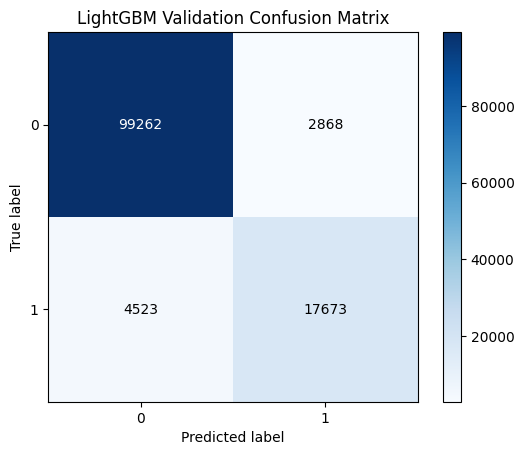

In [ ]:
skplt.metrics.plot_confusion_matrix(y_val, y_val_pred, title="LightGBM Validation Confusion Matrix")
plt.show()

### Best Model Testing on Test Data

In [ ]:
y_test_pred = final_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Final Model Test Accuracy: {test_accuracy}")
print("Final Test Classification Report:\n", classification_report(y_test, y_test_pred))
print("Final Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

Final Model Test Accuracy: 0.9400963173442538
Final Test Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96    219266
           1       0.86      0.79      0.82     47145

    accuracy                           0.94    266411
   macro avg       0.91      0.88      0.89    266411
weighted avg       0.94      0.94      0.94    266411

Final Test Confusion Matrix:
 [[213230   6036]
 [  9923  37222]]


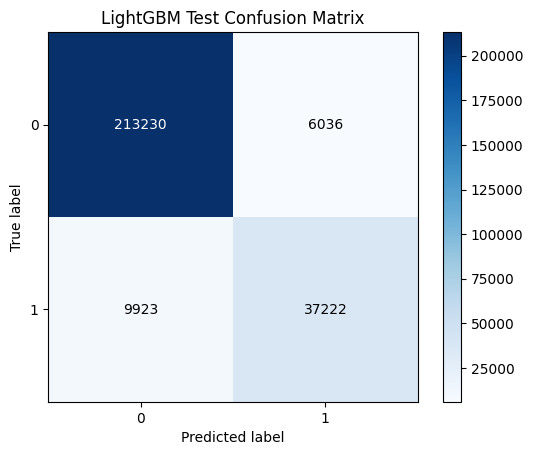

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, y_test_pred, title="LightGBM Test Confusion Matrix")
plt.show()

## Observation Default Model vs Tuned

Tuned Model memiliki accuracy yang sama dengan Default Model, namun berhasil menaikkan F1 Score sebesar 0.02 (Dari 0.82 ke 0.84). Maka kita akan gunakan Tuned Model.

## Best Model

Best model adalah `LightGBM` versi Tuned.

### Classification Report

In [ ]:
y_test_pred = final_model.predict(X_test)
y_test_pred_proba = final_model.predict_proba(X_test)
print("Random Forest Test Accuracy: ", accuracy_score(y_test, y_test_pred))
print("Random Forest Test Classification Report: \n", classification_report(y_test, y_test_pred))

Random Forest Test Accuracy:  0.9400963173442538
Random Forest Test Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.97      0.96    219266
           1       0.86      0.79      0.82     47145

    accuracy                           0.94    266411
   macro avg       0.91      0.88      0.89    266411
weighted avg       0.94      0.94      0.94    266411



### Confusion Matrix

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

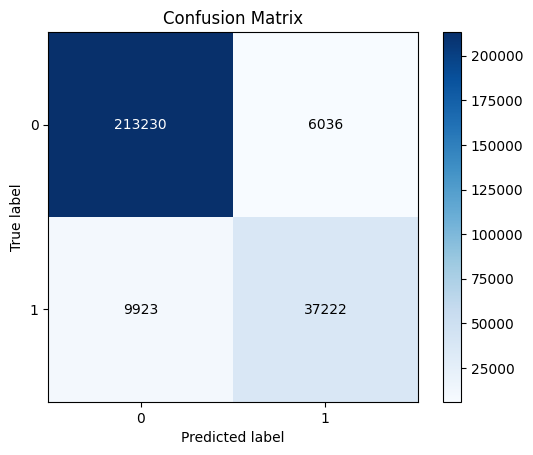

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, y_test_pred)

# Feature Importance

In [ ]:
lgb_model_explainer = dx.Explainer(final_model, X_train, y_train, label = "LightGBM Interpretation")

Preparation of a new explainer is initiated

  -> data              : 497301 rows 11 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 497301 values
  -> model_class       : lightgbm.sklearn.LGBMClassifier (default)
  -> label             : LightGBM Interpretation
  -> predict function  : <function yhat_proba_default at 0x7fa27aaf81f0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.000751, mean = 0.177, max = 0.989
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.985, mean = -1.31e-05, max = 0.998
  -> model_info        : package lightgbm

A new explainer has been created!


In [ ]:
np.random.seed(42)
lgb_model_explainer.model_parts().plot()

In [ ]:
lgb_model_explainer.model_profile().plot()

Calculating ceteris paribus: 100%|██████████| 11/11 [00:04<00:00,  2.37it/s]
